In [35]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import numpy as np
# import usb.backend.libusb1

AudioFilePath="UrbanSound8K/audio/fold7/165192-9-0-76.wav"
LibAudioData,LibAudioSampleRate=librosa.load(AudioFilePath)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
print(LibAudioData)

[0.02787825 0.039315   0.03336281 ... 0.00464256 0.00823633 0.01014575]


<Figure size 864x504 with 0 Axes>

In [36]:
# pip uninstall librosa


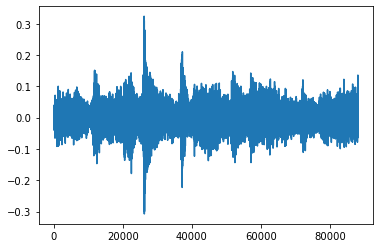

In [37]:
plt.plot(LibAudioData)

In [38]:
from scipy.io import wavfile as wav
SciWaveSampleRate,SciWaveData=wav.read(AudioFilePath)
SciWaveSampleRate


44100

In [39]:
SciWaveData

array([[2234,  247],
       [2255,  194],
       [2239,  116],
       ...,
       [ 373,  304],
       [ 432,  245],
       [ 423,   60]], dtype=int16)

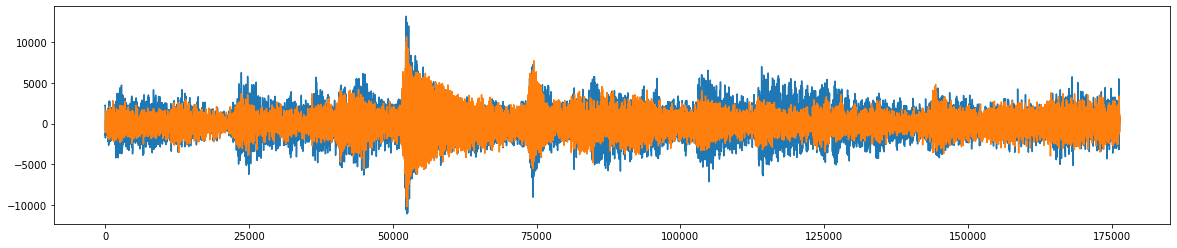

In [40]:
plt.figure(figsize=(20,4))
plt.plot(SciWaveData)
#blue and orange means stereo 2 channel audio...Scipy has stereo channels.

## AUDIO PREPROCESSING..

In [41]:
#Extracting features using MFCC....
#uses time and frequency to extract features from audio...
mfccs=librosa.feature.mfcc(y=LibAudioData,sr=LibAudioSampleRate,n_mfcc=40)
print(mfccs.shape)#audio converted into array...

(40, 173)


In [42]:
mfccs

array([[-2.49891663e+02, -2.35510300e+02, -2.25205734e+02, ...,
        -2.43008301e+02, -2.39947479e+02, -2.47497986e+02],
       [ 1.27126442e+02,  1.25925217e+02,  1.29943298e+02, ...,
         1.60953522e+02,  1.63482391e+02,  1.65614166e+02],
       [-1.67918897e+00, -1.14528646e+01, -2.54418373e+01, ...,
        -1.84709587e+01, -1.69364185e+01, -1.39940348e+01],
       ...,
       [ 2.47464037e+00,  1.14480877e+00, -1.62480879e+00, ...,
        -8.66984081e+00, -1.02295685e+01, -6.21489620e+00],
       [ 4.18019295e+00,  7.37635136e+00,  5.81146145e+00, ...,
        -9.19641554e-02, -5.02004433e+00, -6.29757929e+00],
       [ 4.65969133e+00,  5.71230412e+00,  1.21412373e+01, ...,
         2.42145348e+00,  1.46586812e+00,  2.94947147e+00]], dtype=float32)

In [43]:
#Extract mfcc for every audio file...
import pandas as pd
import os
import librosa
AudioDatasetPath='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [44]:
#Defined function for one audio file.The MFCCs extract important information depending upon frequency and time characteristics.

def FeatureExtractor(FileName):
    Audio,SampleRate=librosa.load(FileName,res_type='kaiser_fast')
    mfccsFeatures=librosa.feature.mfcc(y=Audio,sr=SampleRate,n_mfcc=40)
    mfccsScaledFeatures=np.mean(mfccsFeatures.T,axis=0)
    return mfccsScaledFeatures

In [45]:
import numpy as np
from tqdm import tqdm
#Iteration for all audio files...Iterrows helps to iterate through all the rows.
ExtractedFeatures=[]
#List of extracted independent features.There are approx 8 thousand iterations.
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(AudioDatasetPath),'fold'+str(row["fold"])+'\\',str(row["slice_file_name"]))
#     print(file_name)Here this is the mapping wrto filename and folder of metadata.
    final_class_labels=row["class"]
    print(file_name)
    data=FeatureExtractor(file_name)
#Data variable is collecting all the features got by our fxn..
    ExtractedFeatures.append([data,final_class_labels])
#this list will be converted into a dataframe later.We got the independent and dependent features.
    #print(file_name)


0it [00:00, ?it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100032-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100263-2-0-117.wav


2it [00:00, 18.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100263-2-0-121.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100263-2-0-126.wav


4it [00:00, 13.30it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100263-2-0-137.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100263-2-0-143.wav


6it [00:00, 11.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100263-2-0-161.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100263-2-0-3.wav


11it [00:00, 15.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100263-2-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\100648-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\100648-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\100648-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\100648-1-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\100648-1-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\100652-3-0-0.wav


15it [00:00, 18.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\100652-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\100652-3-0-2.wav


18it [00:01, 17.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\100652-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\100795-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\100795-3-1-0.wav


20it [00:01, 16.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\100795-3-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\100795-3-1-2.wav


22it [00:01, 15.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-1.wav


24it [00:01, 15.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-11.wav

26it [00:01, 14.73it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-13.wav


28it [00:01, 14.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-15.wav


30it [00:02, 14.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-16.wav


32it [00:02, 14.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-19.wav


34it [00:02, 14.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-20.wav


36it [00:02, 14.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-21.wav


38it [00:02, 14.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-24.wav


40it [00:02, 15.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-25.wav


42it [00:02, 14.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-28.wav


46it [00:03, 15.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-4.wav


50it [00:03, 16.77it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-8.wav


54it [00:03, 16.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\100852-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\101281-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\101281-3-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\101281-3-0-5.wav


58it [00:03, 16.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\101382-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\101382-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\101382-2-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\101382-2-0-21.wav


60it [00:03, 15.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\101382-2-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\101382-2-0-33.wav


64it [00:04, 16.62it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\101382-2-0-42.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\101382-2-0-45.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\101415-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\101415-3-0-3.wav


68it [00:04, 17.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\101415-3-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-12.wav


72it [00:04, 17.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-17.wav


76it [00:04, 17.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-22.wav


80it [00:05, 17.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-26.wav


82it [00:05, 14.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-3.wav


86it [00:05, 14.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-37.wav


90it [00:05, 15.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-40.wav


94it [00:06, 15.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\101729-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\101848-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\101848-9-0-1.wav


98it [00:06, 16.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\101848-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\101848-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\101848-9-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\101848-9-0-9.wav


105it [00:06, 22.59it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\102102-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102103-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102103-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102104-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\102105-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\102106-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\102305-6-0-0.wav


108it [00:06, 22.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\102547-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\102547-3-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\102547-3-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\102842-3-0-1.wav


114it [00:06, 20.18it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\102842-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\102842-3-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\102842-3-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\102853-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\102853-8-0-1.wav


119it [00:07, 19.20it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\102853-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\102853-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\102853-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\102853-8-0-5.wav


123it [00:07, 17.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\102853-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\102853-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-0.wav


127it [00:07, 16.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-12.wav


131it [00:08, 16.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-17.wav


133it [00:08, 16.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-2.wav


137it [00:08, 14.21it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-22.wav


141it [00:08, 15.59it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-26.wav


145it [00:08, 16.39it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-3.wav


149it [00:09, 16.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-5.wav


153it [00:09, 16.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\102857-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102858-5-0-0.wav


157it [00:09, 15.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102858-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102871-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102871-8-0-1.wav


161it [00:09, 17.21it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102871-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102871-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102871-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102871-8-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102871-8-0-14.wav


165it [00:10, 16.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102871-8-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102871-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102871-8-0-3.wav


169it [00:10, 17.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102871-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102871-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102871-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102871-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102871-8-0-8.wav


173it [00:10, 17.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\102871-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-0-2.wav


177it [00:10, 16.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-1-2.wav


181it [00:11, 16.24it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-1-6.wav


184it [00:11, 17.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-3-2.wav


188it [00:11, 16.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-3-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-4-1.wav


190it [00:11, 16.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-4-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-4-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-4-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-4-5.wav


195it [00:11, 18.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103074-7-4-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\103076-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\103076-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\103076-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-0-3.wav


201it [00:12, 19.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-2-0.wav


204it [00:12, 20.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-2-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-2-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-2-2.wav


210it [00:12, 19.24it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-2-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-2-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-2-6.wav


214it [00:12, 17.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-2-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-2-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-2-9.wav


217it [00:12, 20.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103199-4-7-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-10.wav


222it [00:13, 19.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-14.wav


226it [00:13, 17.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-18.wav


230it [00:13, 16.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-4.wav


234it [00:13, 16.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-8.wav


238it [00:14, 16.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\103249-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-10.wav


242it [00:14, 16.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-14.wav


246it [00:14, 16.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-18.wav


250it [00:14, 16.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-4.wav


254it [00:15, 16.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-8.wav


258it [00:15, 17.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\103258-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103357-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\103357-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\103438-5-0-0.wav


262it [00:15, 18.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\103438-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\103438-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\104327-2-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\104327-2-0-19.wav


267it [00:15, 19.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\104327-2-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\104327-2-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\104327-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\104327-2-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\104327-2-0-34.wav


271it [00:16, 18.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\104327-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104421-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104421-2-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104421-2-0-20.wav


275it [00:16, 18.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104421-2-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104421-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104421-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104421-2-0-7.wav


279it [00:16, 16.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104421-2-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-0-21.wav


281it [00:16, 13.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-0-3.wav


283it [00:17, 12.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-0-40.wav


285it [00:17, 11.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-0-41.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-0-45.wav


287it [00:17, 10.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-0-51.wav


291it [00:17, 10.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-0-52.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-0-53.wav


293it [00:18, 10.27it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-0-55.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-0-57.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-0-66.wav


295it [00:18, 10.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-1-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\104625-4-1-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\104817-4-0-0.wav


299it [00:18, 12.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\104817-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\104817-4-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\104817-4-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\104817-4-0-2.wav


303it [00:18, 13.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\104817-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\104817-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\104817-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\104817-4-0-6.wav


307it [00:18, 14.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\104817-4-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\104817-4-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\104817-4-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-0-5.wav


312it [00:19, 16.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-10-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-10-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-10-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-10-15.wav


316it [00:19, 17.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-10-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-10-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-11-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-11-2.wav


320it [00:19, 17.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-12-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-14-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-14-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-14-6.wav


324it [00:19, 18.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-15-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-15-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-15-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-15-9.wav


328it [00:20, 17.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-16-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-16-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-16-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-16-5.wav


332it [00:20, 17.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-16-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-16-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-17-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-17-1.wav


336it [00:20, 18.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-17-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-17-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-17-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-17-7.wav


338it [00:20, 17.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-17-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-18-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-18-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-18-3.wav


343it [00:20, 18.41it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-18-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-19-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-19-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-19-6.wav


347it [00:21, 17.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-19-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-19-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-19-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-2-4.wav


351it [00:21, 18.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-2-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-2-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-7-0.wav


356it [00:21, 18.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-7-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-7-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-7-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-7-9.wav


360it [00:21, 17.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-8-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-8-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-8-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-8-17.wav


364it [00:22, 17.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-8-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-8-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-8-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-9-0.wav


368it [00:22, 17.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-9-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\104998-7-9-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-0-1.wav


372it [00:22, 17.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-0-5.wav


374it [00:22, 18.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-1-10.wav


379it [00:22, 18.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-1-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-1-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-1-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-1-2.wav


383it [00:23, 18.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-1-6.wav


388it [00:23, 17.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-1-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-1-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-1-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-0.wav


391it [00:23, 18.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-12.wav


395it [00:23, 18.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-16.wav


400it [00:24, 18.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-5.wav


404it [00:24, 17.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-2-9.wav


408it [00:24, 18.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-3-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-3-3.wav


412it [00:24, 18.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-3-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-3-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-3-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-3-7.wav


416it [00:25, 18.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-4-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-4-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105029-7-4-3.wav


420it [00:25, 17.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105088-3-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105088-3-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105088-3-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\105088-3-0-8.wav


424it [00:25, 17.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-0-3.wav


426it [00:25, 17.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-1-1.wav


431it [00:25, 17.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-2-0.wav


435it [00:26, 18.20it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-2-4.wav


439it [00:26, 18.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-2-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-2-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\105289-8-2-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\105319-3-0-22.wav


443it [00:26, 17.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\105319-3-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\105319-3-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\105415-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\105415-2-0-15.wav


447it [00:26, 16.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\105415-2-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\105415-2-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\105415-2-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\105415-2-0-4.wav


451it [00:27, 17.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\105415-2-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\105415-2-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\105425-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\105425-9-0-10.wav


455it [00:27, 17.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\105425-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\105425-9-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\105425-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\105425-9-0-23.wav


459it [00:27, 17.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\106014-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\106014-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\106014-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\106014-5-0-3.wav


463it [00:27, 17.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\106014-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-10.wav


468it [00:27, 18.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-14.wav


472it [00:28, 18.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-18.wav


476it [00:28, 17.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-3.wav


480it [00:28, 17.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-6.wav


484it [00:28, 17.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\106015-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\106486-5-0-0.wav


488it [00:29, 17.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\106486-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\106486-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\106487-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\106487-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\106487-5-0-2.wav


492it [00:29, 17.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\106905-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\106905-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\106905-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\106905-8-0-0.wav


496it [00:29, 16.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\106905-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\106905-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\106905-8-0-3.wav


501it [00:29, 23.81it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\106955-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\107090-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\107090-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\107190-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\107228-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\107228-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\107228-5-0-2.wav


504it [00:29, 21.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\107228-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\107228-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\107228-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\107228-5-0-6.wav


510it [00:30, 19.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\107228-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-0-2.wav


512it [00:30, 18.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-0-6.wav


517it [00:30, 18.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-1.wav


521it [00:30, 18.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-13.wav


525it [00:31, 18.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-17.wav


529it [00:31, 17.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-4.wav


533it [00:31, 17.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-8.wav


538it [00:31, 17.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\107357-8-1-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\107653-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\107653-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\107653-9-0-18.wav


542it [00:32, 17.79it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\107653-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\107653-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\107653-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\107842-4-0-0.wav


544it [00:32, 17.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\107842-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\107842-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\107842-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\107842-4-2-0.wav


549it [00:32, 18.62it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\107842-4-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\107842-4-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\107842-4-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\107842-4-2-4.wav


554it [00:32, 19.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\107842-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\108041-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\108041-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\108041-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\108041-9-0-5.wav


558it [00:32, 18.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\108041-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\108041-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\108041-9-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\108187-3-2-0.wav


564it [00:33, 22.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\108187-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\108187-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\108187-3-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\108357-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\108357-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\108357-9-0-27.wav


567it [00:33, 21.41it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\108357-9-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\108357-9-0-44.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\108357-9-0-49.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\108362-2-0-11.wav


573it [00:33, 18.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\108362-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\108362-2-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\108362-2-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\108362-2-0-29.wav


577it [00:33, 17.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\108362-2-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\108362-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\108362-2-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\108638-9-0-0.wav


581it [00:34, 17.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\108638-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\108638-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\108638-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\108638-9-0-5.wav


585it [00:34, 17.79it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\108638-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\109233-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\109233-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\109233-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\109233-3-0-6.wav


590it [00:34, 17.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\109263-9-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\109263-9-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\109263-9-0-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\109263-9-0-61.wav


594it [00:34, 18.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\109263-9-0-78.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\109703-2-0-134.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\109703-2-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\109703-2-0-153.wav


598it [00:35, 16.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\109703-2-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\109703-2-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\109703-2-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\109703-2-0-50.wav


602it [00:35, 17.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\109711-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\109711-3-2-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\109711-3-2-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\110134-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\110371-3-0-1.wav


608it [00:35, 20.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\110371-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\110371-3-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\110389-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\110621-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\110621-7-0-1.wav


611it [00:35, 18.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\110621-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\110621-7-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\110622-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\110688-3-0-11.wav


614it [00:35, 20.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\110688-3-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\110688-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\110688-3-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\110868-9-0-11.wav


619it [00:36, 18.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\110868-9-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\110868-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\110868-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\110868-9-0-6.wav


623it [00:36, 18.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\110868-9-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\110918-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\110918-3-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\110918-3-0-40.wav


628it [00:36, 20.30it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\110918-3-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111048-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-0-2.wav


633it [00:36, 18.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-0-6.wav


635it [00:37, 18.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-1-10.wav


640it [00:37, 18.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-1-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-1-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-1-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-1-14.wav


645it [00:37, 17.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-1-5.wav


649it [00:37, 17.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-1-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-1-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\111386-5-1-9.wav


653it [00:37, 18.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-11.wav


657it [00:38, 17.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-15.wav


661it [00:38, 17.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-19.wav


665it [00:38, 17.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-22.wav


669it [00:38, 18.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-6.wav


673it [00:39, 17.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\111671-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\112075-5-0-0.wav


677it [00:39, 18.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\112075-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\112075-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\112195-3-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\112195-3-0-48.wav


679it [00:39, 18.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\112195-3-0-57.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\112195-3-0-80.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\113160-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\113201-5-0-0.wav


684it [00:39, 14.77it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\113201-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\113201-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\113201-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\113201-5-0-4.wav


686it [00:40, 12.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\113201-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\113201-5-0-6.wav


690it [00:40, 11.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\113201-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-0.wav


692it [00:40, 10.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-11.wav


694it [00:40, 10.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-14.wav


696it [00:41, 10.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-16.wav


700it [00:41, 10.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-18.wav


702it [00:41,  9.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-20.wav


705it [00:42,  9.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-22.wav


707it [00:42,  9.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-25.wav


708it [00:42,  9.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-27.wav


711it [00:42,  9.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-3.wav


713it [00:42,  9.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-5.wav


714it [00:42,  9.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-7.wav


717it [00:43,  9.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113202-5-0-9.wav


718it [00:43,  9.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-0-1.wav


721it [00:43,  9.81it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-0-3.wav


723it [00:43,  9.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-0-6.wav


727it [00:44, 10.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-0-8.wav


729it [00:44,  9.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-1-2.wav


731it [00:44, 10.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-3-1.wav


735it [00:44, 10.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-6-0.wav


739it [00:45, 12.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113203-5-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\113205-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\113205-5-1-0.wav


741it [00:45, 11.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\113205-5-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\113205-5-1-2.wav


743it [00:45, 10.79it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\113205-5-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\113205-5-1-4.wav


745it [00:45, 10.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\113205-5-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\113205-5-1-6.wav


747it [00:46, 10.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\113205-5-1-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\113205-5-1-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\113205-5-1-9.wav


749it [00:46,  9.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113216-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113216-5-0-1.wav


751it [00:46,  9.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113216-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113216-5-0-3.wav


754it [00:46,  9.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\113216-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\113601-9-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\113601-9-0-3.wav


758it [00:47, 13.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\113601-9-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\113601-9-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\113601-9-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\113601-9-0-42.wav


764it [00:47, 20.24it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\113785-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\113785-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\114280-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\114280-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\114587-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\114587-3-0-4.wav


767it [00:47, 19.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\114587-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\114587-3-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\115239-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\115239-9-0-1.wav


772it [00:47, 18.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\115239-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\115239-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\115239-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\115239-9-0-5.wav


777it [00:47, 19.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\115240-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\115240-9-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\115240-9-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\115240-9-0-34.wav


781it [00:48, 18.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\115240-9-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\115240-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\115241-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\115241-9-0-14.wav


785it [00:48, 18.21it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\115241-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\115241-9-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\115241-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\115241-9-0-8.wav


787it [00:48, 17.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\115241-9-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\115242-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\115242-9-0-44.wav


791it [00:48, 15.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\115242-9-0-55.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\115242-9-0-68.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\115242-9-0-70.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\115242-9-0-83.wav


796it [00:49, 17.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\115243-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\115243-9-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\115243-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\115243-9-0-46.wav


801it [00:49, 19.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\115243-9-0-81.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\115243-9-0-94.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\115411-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\115411-3-2-0.wav


805it [00:49, 19.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\115411-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\115415-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\115415-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\115415-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\115415-9-0-5.wav


809it [00:49, 18.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\115415-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\115415-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\115418-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\115418-9-0-12.wav


813it [00:50, 17.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\115418-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\115418-9-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\115418-9-0-29.wav


816it [00:50, 20.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\115418-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\115535-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\115536-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\115537-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\116163-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\116163-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\116163-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\116400-3-0-2.wav


824it [00:50, 23.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\116400-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\116400-3-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\116400-3-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\116423-2-0-0.wav


827it [00:50, 21.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\116423-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\116423-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\116423-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\116423-2-0-4.wav


830it [00:50, 20.98it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\116483-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\116483-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\116483-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\116483-3-1-2.wav


836it [00:51, 19.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\116484-3-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\116484-3-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\116484-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\116484-3-0-8.wav


840it [00:51, 18.91it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\116485-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\116485-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\116485-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\116485-3-2-4.wav


844it [00:51, 18.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\117048-3-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\117048-3-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\117048-3-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\117048-3-0-35.wav


848it [00:51, 18.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\117072-3-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\117072-3-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\117072-3-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\117072-3-0-8.wav


852it [00:51, 18.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\117181-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\117181-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\117181-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\117181-8-0-11.wav


856it [00:52, 18.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\117181-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\117181-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\117181-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\117181-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\117181-8-0-5.wav


860it [00:52, 17.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\117181-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\117181-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\117181-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\117181-8-0-9.wav


866it [00:52, 21.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\11722-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\11722-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\117271-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\117271-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\117271-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\117271-3-0-3.wav


872it [00:52, 21.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\117536-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\117889-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\117889-9-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\117889-9-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\117889-9-0-36.wav


875it [00:53, 20.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\117889-9-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\117889-9-0-40.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\118070-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\118072-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118101-3-0-0.wav


879it [00:53, 21.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118101-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118101-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118101-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118278-4-0-0.wav


885it [00:53, 19.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118278-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118278-4-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118278-4-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118278-4-0-12.wav


888it [00:53, 18.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118278-4-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118278-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118278-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118278-4-0-4.wav


892it [00:53, 17.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118278-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118278-4-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118278-4-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118278-4-0-8.wav


896it [00:54, 17.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118278-4-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118279-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118279-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118279-8-0-10.wav


900it [00:54, 17.41it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118279-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118279-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118279-8-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118279-8-0-14.wav


904it [00:54, 17.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118279-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118279-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118279-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118279-8-0-5.wav


908it [00:54, 16.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118279-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118279-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118279-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118279-8-0-9.wav


916it [00:55, 26.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\118440-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\118440-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\118440-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\118440-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\118440-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\118440-4-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\118440-4-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\118440-4-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\118440-4-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\118496-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\

922it [00:55, 32.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118558-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118558-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118558-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118558-5-1-1.wav

926it [00:55, 23.89it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118558-5-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118558-5-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118558-5-2-1.wav


929it [00:55, 21.79it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118558-5-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\118558-5-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\118587-3-0-2.wav


935it [00:56, 18.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\118587-3-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\118587-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\118723-4-0-0.wav


940it [00:56, 22.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\118961-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\118962-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\118963-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\118964-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\119067-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\119067-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\119067-0-0-2.wav


943it [00:56, 21.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\119420-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\119420-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\119449-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\119449-5-0-1.wav


949it [00:56, 18.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\119449-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\119449-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\119449-5-0-4.wav


953it [00:57, 18.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\119449-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\119449-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\119455-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\119455-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\119455-5-0-2.wav


957it [00:57, 17.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\119455-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\119455-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\119455-5-0-5.wav


961it [00:57, 16.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\119455-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\119455-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\119809-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\119809-7-0-1.wav


963it [00:57, 17.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\119809-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\119809-7-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\119809-7-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\119809-7-0-5.wav


967it [00:57, 15.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\119809-7-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\121285-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\121285-0-0-1.wav


971it [00:58, 15.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\121285-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\121285-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\121285-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\121285-0-0-5.wav


975it [00:58, 16.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\121285-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\121285-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\121285-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\121285-0-0-9.wav


979it [00:58, 16.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121286-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121286-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121286-0-0-10.wav


983it [00:58, 16.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121286-0-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121286-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121286-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121286-0-0-14.wav


985it [00:59, 15.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121286-0-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121286-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121286-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121286-0-0-4.wav


989it [00:59, 16.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121286-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121286-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121286-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121286-0-0-8.wav


994it [00:59, 18.21it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121286-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\121299-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\121528-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\121528-8-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\121888-3-0-0.wav

999it [00:59, 18.33it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\122199-3-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\122199-3-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\122199-3-1-3.wav


1002it [00:59, 19.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\122199-3-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\122690-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\122738-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\122738-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\122738-9-0-2.wav


1007it [01:00, 19.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\122738-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\122738-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\122738-9-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\123399-2-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\123399-2-0-19.wav


1011it [01:00, 18.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\123399-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\123399-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\123399-2-0-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\123399-2-0-74.wav


1015it [01:00, 18.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\123399-2-0-83.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\123399-2-0-91.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\123685-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\123685-5-0-1.wav


1019it [01:00, 17.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\123685-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\123685-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\123685-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\123685-5-0-5.wav

1023it [01:01, 17.04it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\123685-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\123685-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\123685-5-0-8.wav


1027it [01:01, 17.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-11.wav


1031it [01:01, 17.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-15.wav


1035it [01:01, 18.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-2.wav


1039it [01:02, 18.41it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-6.wav


1043it [01:02, 17.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-1-0.wav


1047it [01:02, 17.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-1-3.wav


1051it [01:02, 17.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-2-2.wav


1055it [01:02, 18.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\123688-8-2-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-1.wav


1059it [01:03, 17.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-12.wav


1063it [01:03, 17.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-17.wav


1066it [01:03, 18.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-4.wav


1070it [01:03, 17.21it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-8.wav


1075it [01:04, 18.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\124389-8-1-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\124489-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\124489-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\124489-9-0-16.wav


1079it [01:04, 18.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\124489-9-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\124489-9-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\124489-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125520-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125520-1-1-0.wav


1085it [01:04, 26.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125520-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125520-1-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125520-1-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\125523-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\125523-3-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\125523-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\125554-3-0-0.wav


1091it [01:04, 23.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\125574-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-0-3.wav


1094it [01:04, 22.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-0-7.wav


1100it [01:05, 19.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-1-1.wav


1103it [01:05, 19.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-1-5.wav


1108it [01:05, 19.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-1-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-1-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-2-0.wav


1112it [01:05, 18.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-2-4.wav


1115it [01:05, 18.98it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-2-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-2-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-2-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-2-8.wav


1119it [01:06, 18.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-3-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-3-3.wav


1123it [01:06, 17.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-3-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-3-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-3-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-3-7.wav


1127it [01:06, 15.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-4-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-4-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-4-3.wav


1131it [01:06, 16.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-4-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-4-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-4-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-4-7.wav


1136it [01:07, 17.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\125678-7-4-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\125791-3-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\125791-3-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\125791-3-0-15.wav


1140it [01:07, 18.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\125791-3-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\126153-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\126153-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\126153-9-0-11.wav


1144it [01:07, 18.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\126153-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\126153-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\126153-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\126153-9-0-8.wav


1150it [01:07, 21.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\12647-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\12647-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\12647-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\12647-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\126521-3-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\126521-3-0-17.wav


1153it [01:08, 20.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\126521-3-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\126521-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\127443-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\127443-4-0-1.wav


1156it [01:08, 20.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\127443-4-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\127443-4-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\127443-4-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\127443-4-0-2.wav


1161it [01:08, 18.62it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\127443-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\127443-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\127443-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\127443-4-0-6.wav


1165it [01:08, 18.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\127443-4-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\127443-4-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\127443-4-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\127538-4-0-0.wav


1169it [01:08, 18.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\127538-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\127538-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\127872-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\127873-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\128030-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\128030-3-1-0.wav


1177it [01:09, 23.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\128030-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\12812-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\12812-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\12812-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\128152-9-0-10.wav


1180it [01:09, 21.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\128152-9-0-126.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\128152-9-0-167.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\128152-9-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\128152-9-0-49.wav


1183it [01:09, 20.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\128152-9-0-67.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128160-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128160-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128160-5-0-10.wav


1189it [01:09, 18.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128160-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128160-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128160-5-0-13.wav


1193it [01:10, 17.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128160-5-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128160-5-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128160-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128160-5-0-3.wav


1197it [01:10, 16.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128160-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128160-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128160-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128160-5-0-7.wav


1199it [01:10, 16.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128160-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128160-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\128240-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\128240-3-0-20.wav


1201it [01:10, 13.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\128240-3-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\128240-3-0-42.wav


1207it [01:11, 14.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\128465-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\128465-1-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\128465-1-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\128465-1-0-3.wav


1209it [01:11, 15.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\128465-1-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\128465-1-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\128465-1-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\128465-1-0-7.wav


1214it [01:11, 16.77it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\128465-1-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\128470-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\128470-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\128470-3-0-5.wav


1216it [01:11, 15.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\128470-3-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128607-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128607-4-0-1.wav


1220it [01:12, 12.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128607-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128607-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128607-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128607-4-1-0.wav


1224it [01:12, 10.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128607-4-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128607-4-1-2.wav


1228it [01:12, 12.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\128607-4-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\128891-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\128891-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\128891-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\129356-2-0-101.wav


1232it [01:13, 14.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\129356-2-0-115.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\129356-2-0-118.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\129356-2-0-129.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\129356-2-0-199.wav


1236it [01:13, 16.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\129356-2-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\129356-2-0-98.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\129750-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\129750-2-0-34.wav


1240it [01:13, 16.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\129750-2-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\129750-2-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\129750-2-0-4.wav


1243it [01:13, 17.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\129750-2-0-45.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\129750-2-0-46.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\129750-2-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\130030-3-0-0.wav


1245it [01:13, 13.79it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-1-2.wav


1249it [01:14, 13.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-2-1.wav


1251it [01:14, 14.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-3-1.wav


1255it [01:14, 13.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-3-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-5-0.wav


1257it [01:14, 13.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-5-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-5-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-5-3.wav


1259it [01:14, 14.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-5-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\130961-4-5-5.wav


1263it [01:15, 14.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\131199-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\131428-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\131428-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\131428-9-1-0.wav

1267it [01:15, 14.69it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\131428-9-1-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\131428-9-1-8.wav


1271it [01:15, 16.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\131428-9-1-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\131571-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\131918-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\131918-7-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\131918-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\131918-7-0-3.wav

1275it [01:15, 16.31it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\131918-7-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\131918-7-0-5.wav


1277it [01:16, 15.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\131918-7-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\131918-7-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\131918-7-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\132016-7-0-0.wav


1281it [01:16, 14.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\132016-7-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\132016-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\132016-7-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\132016-7-0-4.wav


1285it [01:16, 14.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\132016-7-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\132016-7-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\132016-7-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\132016-7-0-8.wav


1289it [01:16, 15.59it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\132016-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\132016-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\132016-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\132016-9-0-16.wav


1293it [01:17, 16.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\132016-9-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\132016-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132021-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132021-7-0-1.wav


1297it [01:17, 16.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132021-7-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132021-7-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132021-7-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132021-7-0-2.wav


1301it [01:17, 16.18it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132021-7-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132021-7-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132021-7-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132021-7-0-6.wav

1303it [01:17, 16.02it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132021-7-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132021-7-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132021-7-0-9.wav


1308it [01:18, 16.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132021-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\132073-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\132073-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\132073-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\132073-1-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\132073-1-4-0.wav


1316it [01:18, 24.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\132073-1-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\132073-1-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\132108-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\132108-9-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\132108-9-1-1.wav


1319it [01:18, 21.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\132108-9-1-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\132108-9-1-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\132108-9-1-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132162-9-1-3.wav


1322it [01:18, 19.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132162-9-1-58.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132162-9-1-63.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132162-9-1-67.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132162-9-1-68.wav


1327it [01:18, 18.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\132162-9-1-73.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-11.wav


1331it [01:19, 15.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-14.wav


1333it [01:19, 15.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-18.wav


1337it [01:19, 14.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-22.wav


1339it [01:19, 14.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-25.wav


1341it [01:19, 14.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-27.wav


1345it [01:20, 12.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-5.wav


1349it [01:20, 14.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\13230-0-0-9.wav


1351it [01:20, 15.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\132855-2-0-113.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\132855-2-0-41.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\132855-2-0-58.wav


1355it [01:20, 15.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\132855-2-0-70.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\132855-2-0-77.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\132855-2-0-88.wav


1357it [01:21, 14.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\132855-2-0-90.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\132855-2-0-99.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\133090-2-0-14.wav


1361it [01:21, 15.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\133090-2-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\133090-2-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\133090-2-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\133090-2-0-38.wav


1365it [01:21, 16.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\133090-2-0-64.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\133090-2-0-70.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\133090-2-0-76.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\133473-8-0-0.wav


1369it [01:21, 16.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\133473-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\133473-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\133473-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\133473-8-0-4.wav


1373it [01:22, 14.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\133473-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\133494-2-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\133494-2-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\133494-2-0-22.wav


1375it [01:22, 12.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\133494-2-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\133494-2-0-26.wav


1377it [01:22, 10.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\133494-2-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\133494-2-0-37.wav


1381it [01:22, 11.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\133494-2-0-45.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\133797-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\133797-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\133797-6-2-0.wav


1386it [01:23, 15.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-13.wav


1388it [01:23, 16.24it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-16.wav


1392it [01:23, 15.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-20.wav


1396it [01:23, 16.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-24.wav


1400it [01:23, 16.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-27.wav


1402it [01:24, 13.62it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-5.wav


1406it [01:24, 13.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-8.wav


1408it [01:24, 13.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\134717-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135160-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135160-8-0-1.wav


1413it [01:24, 16.59it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135160-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135160-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135160-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135160-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135160-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135160-8-0-5.wav

1416it [01:24, 19.05it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135160-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135160-8-0-7.wav


1420it [01:25, 17.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135160-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135160-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\135526-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\135526-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\135526-6-10-0.wav

1426it [01:25, 20.62it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\135526-6-11-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\135526-6-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\135526-6-13-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\135526-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\135526-6-3-0.wav


1432it [01:25, 23.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\135526-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\135526-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\135526-6-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\135526-6-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\135526-6-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\135526-6-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-0-0.wav

1436it [01:25, 25.60it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-11-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-13-0.wav


1443it [01:26, 22.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-14-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-14-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-14-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-14-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-14-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-14-4.wav


1449it [01:26, 17.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-14-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-14-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-14-7.wav


1454it [01:26, 18.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-14-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-14-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-6-0.wav


1462it [01:27, 25.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135527-6-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\135528-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\135528-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\135528-6-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\135528-6-11-0.wav


1465it [01:27, 24.39it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\135528-6-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\135528-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\135528-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\135528-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\135528-6-4-1.wav


1471it [01:27, 23.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\135528-6-4-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\135528-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\135528-6-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\135528-6-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\135528-6-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\135528-6-9-0.wav


1480it [01:27, 31.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-11-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-13-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-14-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-15-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-16-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-17-0.wav


1489it [01:27, 36.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-18-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-19-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-7-0.wav


1497it [01:28, 29.95it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\135544-6-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\13577-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\13577-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\13577-3-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\135776-2-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\135776-2-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\135776-2-0-40.wav


1501it [01:28, 22.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\135776-2-0-49.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\135776-2-0-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\135776-2-0-65.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\135776-2-0-85.wav


1504it [01:28, 20.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\135776-2-0-90.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\13579-2-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\13579-2-0-16.wav


1510it [01:29, 18.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\13579-2-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\13579-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\13579-2-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\13579-2-0-48.wav


1513it [01:29, 18.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\13579-2-0-53.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\13579-2-0-62.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\135849-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\136399-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\136399-6-1-0.wav


1519it [01:29, 20.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\136399-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\136399-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\136399-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\136399-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\136399-6-6-0.wav


1525it [01:29, 23.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\136399-6-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\136399-6-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\136399-6-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\136558-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\136558-9-0-2.wav


1528it [01:29, 20.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\136558-9-1-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\136558-9-1-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\136558-9-1-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\136558-9-1-39.wav


1531it [01:30, 19.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\137156-9-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\137156-9-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\137156-9-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\137156-9-0-5.wav


1536it [01:30, 17.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\137156-9-0-73.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\137156-9-0-79.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\137803-3-0-0.wav


1538it [01:30, 14.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\137803-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\137803-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\137815-4-0-0.wav


1542it [01:30, 14.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\137815-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\137815-4-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\137815-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\137815-4-0-3.wav


1546it [01:31, 15.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\137815-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\137815-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\137815-4-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\137815-4-0-7.wav


1550it [01:31, 16.27it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\137815-4-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\137815-4-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\137969-2-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\137969-2-0-20.wav


1554it [01:31, 17.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\137969-2-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\137969-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\137969-2-0-41.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\137969-2-0-55.wav


1558it [01:31, 17.24it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\137969-2-0-56.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\137971-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\137971-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\137971-2-0-3.wav


1562it [01:32, 17.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\137971-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\137971-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\137971-2-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\137971-2-0-8.wav


1566it [01:32, 17.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\138015-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\138015-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\138015-3-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\138017-9-0-2.wav


1570it [01:32, 17.27it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\138017-9-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\138017-9-1-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\138017-9-1-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\138017-9-1-4.wav

1574it [01:32, 16.21it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\138017-9-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\138031-2-0-13.wav


1578it [01:32, 16.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\138031-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\138031-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\138031-2-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\138031-2-0-28.wav


1582it [01:33, 16.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\138031-2-0-45.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\138031-2-0-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\138031-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\138465-1-0-0.wav


1584it [01:33, 16.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\138468-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\138473-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\138473-9-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\138473-9-0-35.wav


1588it [01:33, 16.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\138473-9-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\138473-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\138473-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\139000-4-0-0.wav


1592it [01:33, 17.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\139000-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\139000-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\139665-9-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\139665-9-0-23.wav


1596it [01:34, 15.95it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\139665-9-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\139665-9-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\139665-9-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\139665-9-0-9.wav


1603it [01:34, 19.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\139948-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\139948-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\139948-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\139948-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\139951-9-0-13.wav


1607it [01:34, 17.27it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\139951-9-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\139951-9-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\139951-9-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\139951-9-0-45.wav


1610it [01:34, 17.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\139951-9-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\140824-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\14110-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\14110-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\14110-4-0-2.wav


1614it [01:35, 14.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14111-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14111-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14111-4-0-2.wav


1618it [01:35, 16.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14111-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14111-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14111-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14111-4-0-6.wav


1620it [01:35, 16.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14111-4-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\14113-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\14113-4-0-1.wav


1624it [01:35, 16.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\14114-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\14114-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\14114-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\14114-4-0-3.wav


1629it [01:36, 18.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\14115-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\141240-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\141240-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\142003-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\142003-2-0-1.wav

1633it [01:36, 17.66it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\142003-2-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\142003-2-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\142003-2-0-21.wav


1635it [01:36, 16.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\142003-2-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\142003-2-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\142003-2-0-8.wav


1644it [01:36, 26.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\142641-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\143115-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\143115-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\143115-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\143115-1-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\143115-1-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\14358-3-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\14358-3-0-7.wav


1647it [01:36, 23.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\14358-3-0-85.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\14358-3-0-90.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\143604-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\143651-2-0-0.wav


1650it [01:36, 22.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\143651-2-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\143651-2-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\143651-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\143651-2-0-39.wav


1656it [01:37, 19.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\143651-2-0-55.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\143651-2-0-59.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\143651-2-0-63.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14385-9-0-10.wav


1659it [01:37, 18.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14385-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14385-9-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14385-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14385-9-0-17.wav

1663it [01:37, 18.56it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14385-9-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\14386-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\14386-9-0-16.wav


1667it [01:37, 18.27it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\14386-9-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\14386-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\14386-9-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\14386-9-0-6.wav


1671it [01:38, 17.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\14387-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\14387-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\14387-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\14387-9-0-16.wav


1673it [01:38, 15.18it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\14387-9-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\14387-9-0-7.wav


1675it [01:38, 14.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\143970-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\143970-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\143970-5-0-2.wav


1679it [01:38, 13.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\143970-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-1.wav


1681it [01:39, 12.59it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-11.wav


1683it [01:39, 12.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-14.wav


1685it [01:39, 10.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-16.wav


1689it [01:39, 11.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-2.wav


1693it [01:40, 13.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-4.wav


1697it [01:40, 14.39it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-7.wav


1699it [01:40, 13.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-1-0.wav


1703it [01:40, 13.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-1-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-1-11.wav


1707it [01:41, 14.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-1-5.wav


1709it [01:41, 13.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-1-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-1-8.wav

1711it [01:41, 13.20it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144007-5-1-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\144028-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\144028-3-1-0.wav


1716it [01:41, 13.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\144028-3-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-0.wav


1718it [01:41, 14.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-12.wav


1722it [01:42, 14.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-15.wav


1726it [01:42, 15.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-18.wav


1730it [01:42, 15.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-6.wav


1732it [01:42, 15.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-0-9.wav


1736it [01:42, 16.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-4-0.wav


1740it [01:43, 16.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-4-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-4-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-4-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-4-4.wav


1744it [01:43, 16.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-4-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-4-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-4-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-4-8.wav


1748it [01:43, 16.77it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-5-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144068-5-5-2.wav


1750it [01:43, 14.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-0-2.wav


1754it [01:44, 12.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-2-2.wav


1756it [01:44, 11.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-2-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-2-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-2-6.wav


1760it [01:44, 11.20it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-3-10.wav


1762it [01:44, 10.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-3-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-3-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-3-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-3-15.wav


1766it [01:45, 10.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-3-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-3-3.wav


1768it [01:45, 10.84it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-3-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-3-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\144351-4-3-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\14468-3-0-2.wav


1772it [01:45, 11.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\14468-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\14468-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\14468-3-5-0.wav


1776it [01:46, 13.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\14470-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\14470-2-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\14470-2-0-21.wav


1780it [01:46, 14.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\14470-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\14470-2-0-56.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\14470-2-0-65.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\14470-2-0-70.wav


1789it [01:46, 27.30it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\14470-2-0-72.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\144885-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\145206-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\145206-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\145206-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\145206-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\145206-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\145206-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\14524-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14527-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\f

1792it [01:46, 23.83it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14527-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14527-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14527-9-0-5.wav


1795it [01:46, 21.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14527-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\14527-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\145390-9-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\145390-9-0-15.wav


1801it [01:47, 20.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\145390-9-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\145390-9-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\145390-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\145390-9-0-34.wav


1808it [01:47, 24.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\145390-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\145577-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\145608-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\145608-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\145608-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\145608-6-3-0.wav


1815it [01:47, 27.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\145609-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\145609-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\145611-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\145611-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\145611-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\145611-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\145611-6-4-0.wav


1819it [01:47, 29.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\145612-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\145612-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\145612-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\145612-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\145683-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\145683-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\145683-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\145683-6-3-0.wav


1827it [01:48, 27.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\145683-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\145683-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\146186-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\146186-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\146186-5-0-10.wav


1830it [01:48, 23.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\146186-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\146186-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\146186-5-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\146186-5-0-2.wav


1833it [01:48, 21.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\146186-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\146186-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\146186-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\146186-5-0-6.wav


1836it [01:48, 19.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\146186-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\146186-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\146186-5-0-9.wav


1842it [01:48, 19.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\146244-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\146249-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\146343-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-100.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-112.wav


1847it [01:49, 17.21it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-115.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-116.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-117.wav


1851it [01:49, 17.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-125.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-137.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-140.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-151.wav


1855it [01:49, 17.62it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-154.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-155.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-165.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-18.wav


1859it [01:49, 17.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-43.wav


1863it [01:50, 16.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-64.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-8.wav


1865it [01:50, 17.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-80.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-86.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-87.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\146690-0-0-93.wav

1869it [01:50, 16.89it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-12.wav


1873it [01:50, 17.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-20.wav


1877it [01:51, 17.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-3.wav


1881it [01:51, 15.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-34.wav


1883it [01:51, 14.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-44.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-53.wav


1887it [01:51, 14.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-59.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-63.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-65.wav


1889it [01:51, 13.91it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-66.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-68.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\146709-0-0-7.wav


1894it [01:52, 15.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-17.wav


1898it [01:52, 16.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-22.wav


1902it [01:52, 16.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-36.wav


1906it [01:52, 16.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-41.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-43.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-45.wav


1910it [01:53, 17.18it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-49.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-53.wav


1914it [01:53, 17.84it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-55.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-56.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-58.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\146714-0-0-6.wav


1918it [01:53, 18.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-11.wav


1920it [01:53, 17.77it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-14.wav


1926it [01:53, 17.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-18.wav


1929it [01:54, 18.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-22.wav


1933it [01:54, 18.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-27.wav


1937it [01:54, 18.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-32.wav


1941it [01:54, 17.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-5.wav


1946it [01:55, 18.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\146845-0-0-9.wav


1951it [01:55, 18.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\147019-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\147317-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\147491-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\147491-9-0-5.wav


1955it [01:55, 17.18it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\147491-9-2-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\147491-9-2-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\147491-9-2-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\147491-9-2-6.wav


1962it [01:55, 29.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147672-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147672-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147672-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\14772-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\14772-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\14772-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\14772-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\14772-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\14772-7-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\14772-7-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\1

1970it [01:55, 29.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\14772-7-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\14772-7-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\147764-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\147764-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\147764-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\147764-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\147764-4-4-0.wav


1977it [01:56, 26.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\147764-4-4-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\147764-4-4-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\147764-4-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\147764-4-6-0.wav


1981it [01:56, 26.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\147764-4-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\147764-4-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\14780-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\14780-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\14780-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-10.wav


1984it [01:56, 24.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-17.wav


1990it [01:56, 21.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-27.wav


1993it [01:57, 20.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-36.wav


1998it [01:57, 18.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-41.wav


2002it [01:57, 18.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-42.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-44.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-50.wav


2007it [01:57, 20.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-52.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\147926-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\148166-6-0-0.wav


2010it [01:57, 20.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148463-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148463-7-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148463-7-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148463-7-3-0.wav


2013it [01:58, 19.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148463-7-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148463-7-3-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148463-7-3-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148463-7-3-3.wav


2016it [01:58, 19.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148463-7-3-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148463-7-3-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148463-7-3-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148463-7-3-7.wav


2023it [01:58, 19.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148463-7-3-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148463-7-3-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-1.wav


2027it [01:58, 18.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-13.wav


2031it [01:59, 17.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-17.wav


2035it [01:59, 18.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-5.wav


2037it [01:59, 17.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\148632-8-0-9.wav


2046it [01:59, 28.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\148827-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\148827-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\148827-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\148827-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\148827-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\148828-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\148828-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\148833-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\148833-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\148834-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\

2057it [01:59, 38.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\148835-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\148835-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\148835-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\148835-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148837-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148837-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\148837-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\148838-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\148838-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\148838-6-2-0.wav


2062it [02:00, 40.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\148841-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\148841-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\148841-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\149177-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\149193-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\149193-5-0-1.wav


2067it [02:00, 30.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\149193-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\149193-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\149193-5-0-4.wav


2071it [02:00, 19.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\149193-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\149254-9-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\149254-9-0-29.wav


2074it [02:00, 18.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\149254-9-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\149254-9-0-42.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\149254-9-0-51.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\149254-9-0-56.wav


2080it [02:01, 18.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\149255-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\149255-9-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\149255-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\149255-9-0-4.wav


2083it [02:01, 18.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\149255-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\149255-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\149370-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\149370-9-0-19.wav


2088it [02:01, 17.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\149370-9-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\149370-9-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\149370-9-0-32.wav


2090it [02:01, 17.79it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\149370-9-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\149929-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\149929-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\149929-9-0-5.wav


2094it [02:02, 17.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\149929-9-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\149929-9-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\149929-9-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\150341-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\150341-3-1-0.wav


2098it [02:02, 21.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\151005-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\151005-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\151005-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\151005-4-0-3.wav


2104it [02:02, 19.39it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\151005-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\151005-4-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\151005-4-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\151005-4-2-0.wav


2108it [02:02, 18.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\151005-4-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\151005-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\151005-4-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\151005-4-3-2.wav


2114it [02:02, 22.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\151065-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\151069-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\151071-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\151149-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\151149-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\151149-2-0-15.wav


2117it [02:03, 18.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\151149-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\151149-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\151149-2-0-4.wav


2125it [02:03, 27.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\151149-2-0-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\151149-2-0-56.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\151359-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\151359-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\151359-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\151359-1-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\151877-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\151877-5-1-0.wav


2128it [02:03, 23.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\151977-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\151977-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\151977-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\151977-0-0-11.wav


2131it [02:03, 21.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\151977-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\151977-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\151977-0-0-2.wav


2134it [02:03, 18.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\151977-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\151977-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\151977-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\151977-0-0-6.wav


2139it [02:04, 18.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\151977-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\151977-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\151977-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\152570-9-0-0.wav


2143it [02:04, 14.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\152570-9-1-41.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\152570-9-1-42.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\152570-9-1-61.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\152570-9-1-63.wav


2147it [02:04, 13.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\152570-9-1-81.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\152588-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\152588-3-1-0.wav


2152it [02:05, 15.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\152588-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\152588-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\152908-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\152908-5-0-1.wav


2156it [02:05, 16.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\152908-5-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\152908-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\152908-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\152908-5-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\152908-5-0-2.wav


2160it [02:05, 16.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\152908-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\152908-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\152908-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\152908-5-0-6.wav


2164it [02:05, 17.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\152908-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\152908-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\152908-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\153057-1-0-0.wav


2167it [02:06, 18.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\153261-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\153261-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\153261-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\153261-0-0-3.wav


2172it [02:06, 18.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\15356-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\15356-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\15356-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\15356-2-0-3.wav


2176it [02:06, 18.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\15356-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-10.wav


2178it [02:06, 17.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-14.wav


2183it [02:06, 16.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-17.wav


2187it [02:07, 16.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-20.wav


2191it [02:07, 17.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-5.wav


2195it [02:07, 17.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\154758-5-0-9.wav


2199it [02:07, 16.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\155044-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\155044-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\155044-9-0-19.wav


2203it [02:08, 17.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\155044-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\155044-9-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\155044-9-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155127-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155127-9-1-2.wav


2207it [02:08, 17.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155127-9-1-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155127-9-1-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155127-9-1-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155127-9-1-27.wav


2215it [02:08, 24.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\155129-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\155129-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\155129-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\155130-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\155130-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\155202-9-0-124.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\155202-9-0-126.wav


2218it [02:08, 22.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\155202-9-0-135.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\155202-9-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\155202-9-0-42.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\155202-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155212-9-0-13.wav


2221it [02:08, 20.27it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155212-9-1-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155212-9-1-49.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155212-9-1-75.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155212-9-1-85.wav


2227it [02:09, 19.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155212-9-1-88.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\155217-9-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\155217-9-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\155217-9-0-57.wav


2231it [02:09, 18.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\155217-9-0-85.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\155217-9-1-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\155217-9-1-58.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\155219-2-0-0.wav


2233it [02:09, 18.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\155219-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\155219-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\155219-2-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\155219-2-0-25.wav


2238it [02:09, 17.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\155219-2-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\155219-2-0-51.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\155219-2-0-57.wav


2242it [02:10, 17.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\155227-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\155227-9-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\155227-9-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\155227-9-0-24.wav


2247it [02:10, 18.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\155227-9-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\155227-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\155234-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\155238-2-0-17.wav


2251it [02:10, 18.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\155238-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\155238-2-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\155238-2-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\155238-2-0-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\155238-2-0-67.wav


2255it [02:10, 18.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\155238-2-0-75.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\155238-2-0-97.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155241-9-0-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155241-9-0-56.wav


2259it [02:10, 18.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155241-9-0-69.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155241-9-0-79.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155241-9-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155241-9-0-88.wav


2263it [02:11, 18.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\155242-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\155242-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\155242-9-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\155242-9-0-35.wav


2267it [02:11, 18.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\155242-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\155242-9-0-44.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\155243-9-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\155243-9-0-24.wav


2271it [02:11, 17.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\155243-9-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\155243-9-0-42.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\155243-9-0-53.wav


2274it [02:11, 17.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\155243-9-0-55.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155262-2-0-101.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155262-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155262-2-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155262-2-0-2.wav


2278it [02:12, 18.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155262-2-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155262-2-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155262-2-0-58.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155262-2-0-63.wav


2282it [02:12, 18.18it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\155263-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\155263-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\155263-2-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\155263-2-0-34.wav


2287it [02:12, 17.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\155263-2-0-43.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\155263-2-0-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\155263-2-0-57.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\155263-2-0-61.wav


2291it [02:12, 18.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155280-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155280-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155280-2-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155280-2-0-15.wav


2295it [02:13, 17.18it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155280-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155280-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155280-2-0-6.wav


2299it [02:13, 22.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155280-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\155283-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\155283-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\155294-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\155299-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\155299-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\155299-3-1-1.wav


2306it [02:13, 23.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\155299-3-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\155309-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\155310-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\155311-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\155312-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\155313-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\155314-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\155314-3-0-2.wav


2314it [02:13, 30.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\155314-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\155315-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155317-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\155320-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-10.wav


2318it [02:13, 24.81it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-14.wav


2324it [02:14, 21.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-18.wav


2327it [02:14, 19.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-4.wav


2332it [02:14, 18.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-8.wav


2334it [02:14, 18.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\15544-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155488-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155488-3-2-0.wav


2338it [02:15, 16.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155488-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\155488-3-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\15564-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\15564-2-0-1.wav


2345it [02:15, 20.59it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\15564-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\156091-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\156194-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\156200-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\156358-5-0-0.wav


2348it [02:15, 18.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\156358-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\156358-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\156358-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\156358-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\156358-5-0-5.wav


2352it [02:15, 17.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\156358-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156362-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156362-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156362-4-0-2.wav


2357it [02:16, 18.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156362-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156362-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156362-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156362-4-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156362-4-3-0.wav


2361it [02:16, 18.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156362-4-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156362-4-3-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156362-4-3-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156362-4-3-4.wav


2365it [02:16, 18.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156362-4-3-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156362-4-3-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156362-4-3-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156362-4-3-8.wav


2370it [02:16, 18.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\156418-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\156418-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\156418-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\156418-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-0-0.wav


2373it [02:16, 19.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-0-11.wav


2377it [02:17, 18.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-0-4.wav


2382it [02:17, 18.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-0-7.wav


2386it [02:17, 18.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-2-0.wav


2388it [02:17, 18.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-2-4.wav


2392it [02:17, 17.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-2-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-2-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-2-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156634-5-2-8.wav


2400it [02:18, 26.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156868-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156868-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156868-8-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156868-8-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156868-8-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156869-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156869-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156869-8-0-10.wav

2403it [02:18, 23.20it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156869-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156869-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156869-8-0-3.wav


2406it [02:18, 21.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156869-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156869-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156869-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156869-8-0-7.wav


2412it [02:18, 20.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156869-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\156869-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\156893-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\156893-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\156893-7-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\156893-7-11-0.wav


2419it [02:19, 23.24it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\156893-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\156893-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\156893-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\156893-7-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\156893-7-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\156893-7-7-0.wav


2425it [02:19, 22.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\156893-7-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\156893-7-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\156897-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\157207-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\157207-6-1-0.wav


2430it [02:19, 27.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\157207-6-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\157207-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\157207-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\157207-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\157207-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\157207-6-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\157207-6-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\157207-6-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\157207-6-9-0.wav


2435it [02:19, 31.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\157322-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\157322-3-0-4.wav


2439it [02:20, 19.79it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\157322-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\157322-3-0-6.wav


2442it [02:20, 19.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\157648-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157649-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157649-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157649-3-1-1.wav


2445it [02:20, 18.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157649-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\157695-3-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\157695-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\157695-3-0-27.wav


2448it [02:20, 18.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\157695-3-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\157799-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\157800-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157801-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-0.wav


2455it [02:20, 20.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-13.wav


2458it [02:20, 20.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-17.wav


2464it [02:21, 20.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-20.wav


2467it [02:21, 19.79it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-25.wav


2473it [02:21, 20.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-4.wav


2476it [02:21, 19.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-8.wav


2481it [02:22, 19.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\157866-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-11.wav


2486it [02:22, 20.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-16.wav


2492it [02:22, 20.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-2.wav


2495it [02:22, 19.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-23.wav


2498it [02:22, 20.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-28.wav


2504it [02:23, 19.20it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-6.wav


2507it [02:23, 19.84it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\157867-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-0.wav


2513it [02:23, 20.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-12.wav


2516it [02:23, 19.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-17.wav


2521it [02:24, 19.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-21.wav


2525it [02:24, 19.79it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-25.wav


2530it [02:24, 19.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-5.wav


2536it [02:24, 19.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\157868-8-0-9.wav


2538it [02:25, 19.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\157940-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\157940-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\157940-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\157940-9-0-4.wav


2542it [02:25, 17.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\157940-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\157940-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\157950-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\158593-2-0-0.wav


2547it [02:25, 18.62it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\158593-2-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\158593-2-0-43.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\158593-2-0-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\158593-2-0-52.wav


2551it [02:25, 18.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\158593-2-0-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\158593-2-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\158597-2-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\158597-2-0-2.wav


2555it [02:25, 18.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\158597-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\158597-2-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\158597-2-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\158597-2-0-41.wav


2560it [02:26, 20.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\158597-2-0-57.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\158597-2-0-85.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\158607-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\158607-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\158607-3-2-0.wav


2563it [02:26, 19.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\158608-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\158608-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\158608-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\158608-8-0-2.wav


2568it [02:26, 18.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\158608-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\158608-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\158608-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\158608-8-0-6.wav


2572it [02:26, 18.39it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\158608-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\158608-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\158608-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\158977-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\158978-6-0-0.wav


2576it [02:26, 22.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\158979-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159176-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159439-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159439-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159439-2-0-11.wav


2582it [02:27, 19.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159439-2-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159439-2-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159439-2-0-29.wav


2589it [02:27, 23.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159439-2-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159701-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159701-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159701-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159701-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159701-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159701-6-5-0.wav


2595it [02:27, 31.77it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159701-6-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\159702-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\159702-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\159702-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\159702-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\159702-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\159702-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\159702-6-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159703-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\159704-6-0-0.wav


2603it [02:27, 32.24it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\159705-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\159706-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159707-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\159708-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\159708-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\159708-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\159708-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\159708-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\159708-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\159708-6-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\

2611it [02:28, 42.39it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159726-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159726-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159735-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159735-2-0-121.wav


2616it [02:28, 30.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159735-2-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159735-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159735-2-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159735-2-0-80.wav


2620it [02:28, 25.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159735-2-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159735-2-0-99.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-1.wav


2624it [02:28, 22.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-13.wav


2630it [02:29, 19.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-16.wav


2633it [02:29, 18.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-3.wav


2637it [02:29, 17.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-7.wav


2641it [02:29, 16.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\159738-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\159742-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\159742-8-0-1.wav


2645it [02:30, 16.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\159742-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\159742-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\159742-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\159742-8-0-13.wav


2649it [02:30, 16.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\159742-8-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\159742-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\159742-8-0-3.wav


2653it [02:30, 16.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\159742-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\159742-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\159742-8-0-6.wav


2657it [02:30, 15.95it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\159742-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\159742-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\159742-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159743-8-0-0.wav


2659it [02:30, 16.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159744-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159744-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159744-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159744-8-0-11.wav


2663it [02:31, 15.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159744-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159744-8-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159744-8-0-2.wav


2665it [02:31, 15.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159744-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159744-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159744-8-0-5.wav


2669it [02:31, 15.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159744-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159744-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159744-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159744-8-0-9.wav


2674it [02:31, 18.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159745-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159745-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159745-8-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159745-8-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159745-8-1-3.wav


2678it [02:32, 18.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159745-8-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159745-8-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159745-8-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159745-8-1-7.wav


2682it [02:32, 18.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-11.wav


2686it [02:32, 17.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-15.wav


2690it [02:32, 17.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-19.wav


2694it [02:33, 17.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-3.wav


2698it [02:33, 16.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-6.wav


2702it [02:33, 16.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159747-8-0-9.wav


2704it [02:33, 15.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-0-3.wav


2708it [02:33, 16.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-0-7.wav


2712it [02:34, 17.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-2-0.wav


2717it [02:34, 17.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-2-3.wav


2721it [02:34, 17.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-2-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-2-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-2-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-2-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159748-8-2-8.wav


2725it [02:34, 16.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159750-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159750-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159750-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159750-8-0-3.wav


2729it [02:35, 16.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159750-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159750-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159750-8-0-6.wav


2733it [02:35, 16.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159750-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\159750-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-10.wav


2737it [02:35, 16.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-13.wav


2741it [02:35, 17.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-18.wav


2745it [02:36, 16.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-21.wav


2749it [02:36, 17.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-6.wav


2753it [02:36, 16.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159751-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-0-0.wav


2757it [02:36, 16.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-0-11.wav


2761it [02:36, 17.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-0-5.wav


2765it [02:37, 16.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-0-8.wav


2768it [02:37, 18.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-2-2.wav


2772it [02:37, 17.41it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159752-8-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159753-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159753-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159753-8-0-2.wav


2776it [02:37, 17.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159753-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159753-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159753-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\159753-8-0-6.wav


2783it [02:38, 22.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159754-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159754-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159754-8-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159754-8-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\159754-8-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159755-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159755-8-0-1.wav


2786it [02:38, 21.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159755-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\159755-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\159761-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\159761-0-0-1.wav


2792it [02:38, 19.81it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\159761-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\159761-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\159761-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\159761-0-0-5.wav


2796it [02:38, 18.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\159761-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\159761-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\159761-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\160009-2-0-1.wav


2800it [02:39, 18.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\160009-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\160009-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\160009-2-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\160009-2-0-31.wav


2804it [02:39, 17.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\160009-2-0-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\160009-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\160009-2-0-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\160010-2-0-19.wav


2806it [02:39, 18.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\160010-2-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\160010-2-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\160010-2-0-32.wav


2810it [02:39, 18.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\160010-2-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\160010-2-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\160010-2-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\160010-2-0-49.wav


2814it [02:39, 17.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\160011-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\160011-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\160011-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\160011-2-0-3.wav


2819it [02:40, 17.79it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\160011-2-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\160011-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\160011-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\160011-2-0-9.wav


2823it [02:40, 17.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\160016-2-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\160016-2-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\160016-2-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\160016-2-0-37.wav


2827it [02:40, 17.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\160016-2-0-40.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\160016-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\160016-2-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\160092-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\160093-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\160094-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\160366-3-0-13.wav


2831it [02:40, 21.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\160366-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\160366-3-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\160366-3-0-8.wav


2839it [02:41, 21.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\160575-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\160575-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\160575-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\160575-3-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\161005-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\161005-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\161005-2-0-14.wav


2842it [02:41, 20.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\161005-2-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\161005-2-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\161005-2-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\161005-2-0-4.wav


2848it [02:41, 21.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\161005-2-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\161010-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\161010-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\161010-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\161010-1-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-1.wav


2851it [02:41, 18.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-11.wav


2854it [02:42, 10.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-12.wav


2856it [02:42,  8.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-19.wav


2858it [02:43,  7.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-20.wav


2861it [02:43,  6.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-3.wav


2863it [02:44,  6.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-5.wav


2864it [02:44,  5.84it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-6.wav


2865it [02:44,  5.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-8.wav


2867it [02:44,  5.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\161129-4-0-9.wav


2870it [02:44,  9.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\161195-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\161702-9-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\161702-9-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\161702-9-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\161702-9-0-45.wav


2874it [02:45, 12.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\161702-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\161702-9-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\161922-3-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\161922-3-1-5.wav


2879it [02:45, 15.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\161922-3-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\161922-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\161923-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\161923-3-0-12.wav


2883it [02:45, 16.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\161923-3-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\161923-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-1.wav


2887it [02:45, 17.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-13.wav


2891it [02:46, 17.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-17.wav


2895it [02:46, 17.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-5.wav


2899it [02:46, 17.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162103-0-0-9.wav


2901it [02:46, 15.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-0-1.wav


2903it [02:46, 13.39it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-10-0.wav


2907it [02:47, 11.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-10-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-10-2.wav


2909it [02:47, 11.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-10-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-11-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-11-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-11-2.wav


2911it [02:47, 10.59it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-11-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-11-4.wav


2915it [02:48, 10.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-11-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-11-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-11-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-12-0.wav


2917it [02:48, 10.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-12-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-12-2.wav


2921it [02:48, 10.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-12-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-12-4.wav


2923it [02:48,  9.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-13-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-13-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-13-2.wav


2925it [02:49,  9.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-13-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-13-4.wav


2927it [02:49,  9.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-14-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-14-1.wav


2928it [02:49,  9.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-14-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-15-0.wav


2931it [02:49,  9.77it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-15-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-15-2.wav


2932it [02:49,  9.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-15-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-15-4.wav


2935it [02:50,  9.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-16-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-16-1.wav


2938it [02:50,  9.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-17-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-17-1.wav


2939it [02:50,  9.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-17-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-17-3.wav


2941it [02:50,  9.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-17-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-3-0.wav


2945it [02:51, 11.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-7-0.wav


2947it [02:51, 12.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-7-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-8-0.wav


2949it [02:51, 11.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-8-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-8-2.wav


2951it [02:51, 10.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-8-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-8-4.wav


2953it [02:51, 10.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-8-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-8-6.wav


2955it [02:52, 10.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-8-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-9-0.wav


2959it [02:52, 10.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-9-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-9-2.wav


2961it [02:52, 10.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-9-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162134-7-9-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\162148-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162318-2-0-17.wav


2965it [02:53, 10.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162318-2-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162318-2-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162318-2-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162318-2-0-39.wav


2967it [02:53, 10.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162318-2-0-40.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162318-2-0-55.wav


2971it [02:53, 11.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162318-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\162431-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\162431-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\162431-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\162431-6-3-0.wav


2979it [02:53, 20.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162432-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162432-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162432-6-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162432-6-11-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162432-6-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162432-6-13-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162432-6-14-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162432-6-2-0.wav


2986it [02:54, 25.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162432-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162432-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162432-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162432-6-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162432-6-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162432-6-8-0.wav

2994it [02:54, 30.98it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\162432-6-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162433-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162433-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162433-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162433-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162433-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162433-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162433-6-6-0.wav


3000it [02:54, 36.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162433-6-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\162433-6-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\162434-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\162434-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\162434-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\162435-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\162435-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\162435-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\162435-6-3-0.wav


3010it [02:54, 40.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\162436-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\162540-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\162540-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\162540-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\162541-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\162541-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\162541-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\162702-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\162702-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\162703-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\

3017it [02:54, 46.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\163460-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\164053-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\164053-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\164053-8-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\164053-8-2-1.wav


3022it [02:54, 34.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\164053-8-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\164053-8-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\164053-8-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\164194-2-0-10.wav


3026it [02:55, 27.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\164194-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\164194-2-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\164194-2-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\164194-2-0-24.wav


3030it [02:55, 24.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\164194-2-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\164194-2-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\164194-2-0-7.wav


3036it [02:55, 20.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\164311-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\164311-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\164312-3-0-0.wav


3040it [02:55, 22.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\164312-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\164312-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\164312-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\164344-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\164344-9-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\164344-9-0-38.wav

3043it [02:56, 20.65it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\164344-9-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\164344-9-0-40.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\164344-9-0-44.wav


3046it [02:56, 19.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\164377-9-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\164377-9-1-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\164377-9-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\164377-9-1-36.wav


3051it [02:56, 18.79it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\164377-9-1-43.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\164377-9-1-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\164377-9-1-92.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\164625-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\164626-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\164627-1-0-0.wav


3059it [02:56, 24.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\164646-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\164667-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\164782-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\164782-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\164782-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\164782-8-0-3.wav


3062it [02:56, 22.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\164782-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\164782-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\164782-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\164782-8-0-7.wav


3068it [02:57, 20.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\164797-2-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\164797-2-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\164797-2-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\164797-2-0-44.wav


3071it [02:57, 19.41it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\164797-2-0-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\164797-2-0-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\164797-2-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-0-0.wav


3076it [02:57, 18.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-10-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-11-0.wav


3080it [02:57, 18.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-12-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-13-0.wav


3084it [02:58, 18.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-14-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-15-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-15-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-16-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-17-0.wav


3088it [02:58, 17.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-17-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-3-0.wav


3092it [02:58, 16.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-4-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-4-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-5-0.wav


3096it [02:58, 17.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-5-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-6-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-7-0.wav


3100it [02:59, 17.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-8-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-8-2.wav


3104it [02:59, 17.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165039-7-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\165067-2-0-111.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\165067-2-0-112.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\165067-2-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\165067-2-0-56.wav


3108it [02:59, 17.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\165067-2-0-72.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\165067-2-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\165067-2-0-91.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\165166-8-0-0.wav


3112it [02:59, 17.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\165166-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\165166-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\165166-8-0-3.wav


3114it [02:59, 17.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\165166-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\165166-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\165166-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\165166-8-0-7.wav


3119it [03:00, 17.20it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\165166-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\165192-9-0-118.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\165192-9-0-146.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\165192-9-0-160.wav


3121it [03:00, 16.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\165192-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\165192-9-0-76.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\165192-9-0-87.wav


3125it [03:00, 15.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165454-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165454-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165454-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165454-0-0-11.wav


3129it [03:00, 15.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165454-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165454-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165454-0-0-3.wav


3133it [03:01, 16.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165454-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165454-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165454-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165454-0-0-7.wav


3137it [03:01, 16.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165454-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165454-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\165529-2-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\165529-2-0-3.wav


3141it [03:01, 17.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\165529-2-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\165529-2-0-70.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\165529-2-0-73.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\165529-2-0-8.wav


3143it [03:01, 17.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\165529-2-0-90.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165567-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165567-3-2-0.wav


3145it [03:01, 14.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165567-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\165567-3-4-0.wav


3147it [03:02, 12.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\165640-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\165640-4-0-1.wav


3149it [03:02,  9.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\165640-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\165641-4-0-0.wav


3153it [03:02,  9.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\165641-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\165642-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\165643-4-0-0.wav


3157it [03:03, 12.84it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\165644-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\165644-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\165645-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\165645-4-1-0.wav


3161it [03:03, 18.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\165645-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\165645-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\165645-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\165645-4-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\165774-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\165774-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\165774-7-2-0.wav


3168it [03:03, 22.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\165774-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\165774-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\165774-7-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\165774-7-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\165774-7-7-0.wav


3177it [03:03, 31.27it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\165774-7-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\165775-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\165775-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\165785-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\165785-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\165785-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\165785-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\165785-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\165786-4-0-0.wav


3181it [03:03, 26.81it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\166101-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\166101-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\166101-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\166101-5-0-3.wav


3184it [03:03, 25.20it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\166101-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\166101-5-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\166101-5-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\166101-5-2-2.wav


3190it [03:04, 20.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\166101-5-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\166101-5-2-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\166101-5-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\166268-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\166268-3-1-0.wav


3194it [03:04, 22.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\166268-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\166421-3-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\166421-3-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\166421-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166489-3-0-1.wav

3197it [03:04, 19.76it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166489-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166489-3-0-4.wav


3202it [03:05, 17.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\16692-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\16692-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\16692-5-0-10.wav


3205it [03:05, 17.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\16692-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\16692-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\16692-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\16692-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\16692-5-0-6.wav


3209it [03:05, 17.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\16692-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\16692-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\16692-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-0-0.wav


3213it [03:05, 17.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-1-5.wav


3217it [03:05, 17.98it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-2-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-2-13.wav


3221it [03:06, 18.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-2-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-2-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-3-1.wav


3225it [03:06, 17.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-3-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-4-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\166931-4-4-3.wav


3229it [03:06, 16.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\166942-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\166942-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\166942-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\166942-0-0-11.wav


3234it [03:06, 17.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\166942-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\166942-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\166942-0-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\166942-0-0-15.wav


3238it [03:07, 17.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\166942-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\166942-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\166942-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\166942-0-0-5.wav


3242it [03:07, 17.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\166942-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\166942-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\166942-0-0-8.wav


3246it [03:07, 17.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\166942-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-11.wav


3250it [03:07, 17.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-15.wav


3254it [03:08, 16.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-19.wav


3258it [03:08, 17.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-22.wav


3262it [03:08, 17.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-4.wav


3264it [03:08, 17.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-7.wav


3268it [03:08, 16.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167464-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-11-0.wav


3276it [03:09, 24.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-6-0.wav


3279it [03:09, 23.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-6-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-6-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-6-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-6-4.wav


3285it [03:09, 21.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\167701-4-9-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\167702-4-0-0.wav


3288it [03:09, 16.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\167702-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\167702-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\167702-4-3-0.wav


3293it [03:10, 18.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\167702-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\167702-4-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\167702-4-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\167702-4-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\167702-4-7-1.wav


3298it [03:10, 20.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\167702-4-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\167702-4-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\16772-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167750-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167750-4-1-0.wav


3302it [03:10, 23.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167750-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\167750-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\168037-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\168037-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\168037-4-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\168037-4-11-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\168037-4-12-0.wav


3310it [03:10, 26.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\168037-4-13-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\168037-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\168037-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\168037-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\168037-4-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\168037-4-6-0.wav


3316it [03:10, 25.91it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\168037-4-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\168037-4-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\168037-4-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\16860-9-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\16860-9-0-28.wav


3319it [03:11, 22.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\16860-9-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\16860-9-0-45.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\16860-9-0-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\16860-9-0-8.wav


3322it [03:11, 21.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\168713-9-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\168713-9-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\168713-9-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\168713-9-0-46.wav


3328it [03:11, 18.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\168713-9-0-62.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\168713-9-0-82.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-0-1.wav


3332it [03:11, 18.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-1-10.wav


3336it [03:12, 18.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-1-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-1-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-1-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-1-14.wav


3340it [03:12, 17.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-1-4.wav


3344it [03:12, 18.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-1-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-1-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\168846-5-1-9.wav


3348it [03:12, 17.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\168906-9-0-114.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\168906-9-0-128.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\168906-9-0-28.wav


3352it [03:12, 16.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\168906-9-0-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\168906-9-0-73.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\168906-9-0-95.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\169043-2-0-10.wav


3356it [03:13, 16.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\169043-2-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\169043-2-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\169043-2-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\169043-2-0-24.wav


3358it [03:13, 16.39it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\169043-2-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\169043-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\169044-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\169044-2-0-13.wav


3362it [03:13, 16.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\169044-2-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\169044-2-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\169044-2-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\169044-2-0-3.wav


3366it [03:13, 16.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\169044-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\169045-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\169045-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\169045-2-0-14.wav


3370it [03:14, 16.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\169045-2-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\169045-2-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\169045-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\169045-2-0-8.wav


3374it [03:14, 17.27it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-0-3.wav


3378it [03:14, 17.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-0-7.wav


3382it [03:14, 16.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-2-0.wav


3386it [03:15, 17.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-4-1.wav


3390it [03:15, 17.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-4-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-4-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-4-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-4-3.wav


3394it [03:15, 17.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-4-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-4-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-4-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-4-7.wav


3398it [03:15, 16.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-4-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\169098-7-4-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\169261-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-0-12.wav


3400it [03:15, 15.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-0-8.wav


3402it [03:16, 13.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-1-5.wav


3404it [03:16, 11.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-1-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-2-17.wav


3408it [03:16, 11.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-2-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-2-2.wav


3410it [03:16, 10.62it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-2-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-2-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-2-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-2-8.wav


3412it [03:17, 10.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-3-10.wav


3416it [03:17, 10.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-3-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-3-14.wav


3418it [03:17, 10.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-3-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-3-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-3-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\169466-4-3-9.wav


3423it [03:18, 12.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\170015-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\170022-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\170022-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\17009-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\17009-2-0-1.wav


3427it [03:18, 14.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\17009-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\17009-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\17009-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\17009-2-0-6.wav


3432it [03:18, 18.59it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\17009-2-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\170243-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\170245-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\170564-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\170564-2-0-3.wav


3436it [03:18, 17.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\170564-2-1-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\170564-2-1-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\170564-2-1-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\170564-2-1-32.wav


3440it [03:18, 16.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\170564-2-1-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\170564-2-1-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\17074-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\171165-9-0-103.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\171165-9-0-15.wav


3445it [03:19, 17.84it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\171165-9-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\171165-9-0-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\171165-9-0-70.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\171165-9-0-84.wav


3449it [03:19, 17.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\171184-9-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\171184-9-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\171184-9-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\171184-9-0-23.wav


3453it [03:19, 17.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\171184-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\171184-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\17124-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\171243-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\171243-9-0-123.wav


3458it [03:19, 18.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\171243-9-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\171243-9-0-49.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\171243-9-0-81.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\171243-9-0-85.wav


3466it [03:20, 24.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\171243-9-0-91.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171249-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171249-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171249-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-11-0.wav


3474it [03:20, 30.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-13-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-14-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-15-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-16-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-17-0.wav


3478it [03:20, 28.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-18-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-19-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-20-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-21-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-22-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-23-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-24-0.wav


3485it [03:20, 28.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-25-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-26-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-27-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-28-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-29-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-3-0.wav


3489it [03:20, 30.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-8-0.wav


3496it [03:21, 24.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-8-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\171305-7-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\171388-9-0-202.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\171388-9-0-225.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\171388-9-0-246.wav


3499it [03:21, 22.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\171388-9-0-253.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\171388-9-0-43.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\171388-9-0-88.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\171406-9-0-124.wav


3505it [03:21, 19.39it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\171406-9-0-183.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\171406-9-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\171406-9-0-57.wav


3508it [03:22, 18.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\171406-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\171406-9-0-90.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\171464-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\171464-3-1-0.wav


3513it [03:22, 18.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\171464-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\171478-9-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\171478-9-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\171478-9-0-38.wav


3517it [03:22, 17.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\171478-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\171478-9-0-55.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\171478-9-0-57.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\171478-9-0-58.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\172314-9-0-22.wav


3519it [03:22, 16.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\172314-9-0-40.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\172314-9-0-51.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\172314-9-0-52.wav


3523it [03:22, 16.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\172314-9-0-72.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\172314-9-0-80.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\172315-9-0-105.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\172315-9-0-113.wav


3527it [03:23, 16.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\172315-9-0-203.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\172315-9-0-211.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\172315-9-0-212.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\172315-9-0-224.wav


3531it [03:23, 16.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\172338-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\172338-9-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\172338-9-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\172338-9-0-39.wav


3535it [03:23, 17.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\172338-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\172338-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\172460-9-0-100.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\172460-9-0-101.wav


3539it [03:23, 16.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\172460-9-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\172460-9-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\172460-9-0-91.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\172460-9-0-94.wav


3543it [03:24, 17.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\172519-9-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\172519-9-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\172519-9-0-49.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\172519-9-0-53.wav


3547it [03:24, 18.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\172519-9-0-67.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\172519-9-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\172593-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\172593-2-0-13.wav


3551it [03:24, 17.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\172593-2-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\172593-2-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\172593-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\172593-2-0-27.wav


3555it [03:24, 18.03it/s]C:\Users\asus\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\172593-2-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\172593-2-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\17307-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\173891-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\173891-9-0-10.wav


3560it [03:24, 19.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\173891-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\173891-9-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\173891-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\173891-9-0-7.wav


3562it [03:25, 18.98it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\173993-3-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\173993-3-0-39.wav


3564it [03:25, 14.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\173993-3-0-51.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\173993-3-0-52.wav


3566it [03:25, 12.20it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\173994-3-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\173994-3-0-3.wav


3568it [03:25, 10.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\173994-3-0-44.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\173994-3-0-45.wav


3570it [03:25, 10.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\173995-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\173995-3-0-11.wav


3572it [03:26,  9.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\173995-3-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\173995-3-0-3.wav


3576it [03:26, 11.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\174026-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\174026-3-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\174026-3-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\174026-3-2-2.wav


3580it [03:26, 13.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\174032-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\174032-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\174032-2-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\174032-2-0-18.wav


3584it [03:26, 15.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\174032-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\174032-2-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\174032-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\174276-7-0-0.wav


3589it [03:27, 18.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\174276-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\174276-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\174276-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\174276-7-4-0.wav


3592it [03:27, 18.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\174276-7-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\174276-7-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\174282-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\174282-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\174282-6-2-0.wav


3598it [03:27, 20.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\174284-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\174284-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\174284-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\174285-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\174285-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\174285-6-2-0.wav


3604it [03:27, 23.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\174287-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\174287-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\174287-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\174287-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\174289-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\174289-6-1-0.wav


3612it [03:28, 25.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\174289-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\174289-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\174290-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\174290-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\174290-6-2-0.wav


3615it [03:28, 25.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\174290-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\174292-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\174292-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\174292-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\174293-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\174293-6-1-0.wav


3621it [03:28, 25.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\174293-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\174294-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\174294-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\174294-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\174786-2-0-18.wav


3624it [03:28, 23.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\174786-2-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\174786-2-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\174786-2-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\174786-2-0-39.wav


3627it [03:28, 20.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\174786-2-0-60.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\174786-2-0-75.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\174786-2-0-89.wav


3632it [03:29, 18.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\17480-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\17480-2-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\17480-2-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\17480-2-0-30.wav


3636it [03:29, 18.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\17480-2-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\17480-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\17480-2-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\17480-2-0-9.wav


3642it [03:29, 23.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\174840-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\174841-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\17486-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\17486-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\17486-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\174873-3-5-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\174873-3-5-10.wav


3648it [03:29, 21.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\174873-3-5-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\174873-3-5-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\174906-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\174906-2-0-11.wav


3651it [03:30, 19.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\174906-2-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\174906-2-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\174906-2-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\174906-2-0-21.wav


3656it [03:30, 18.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\174906-2-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\174906-2-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\174994-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\174994-3-0-1.wav


3660it [03:30, 18.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\174994-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\174994-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\175296-2-0-123.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\175296-2-0-128.wav


3664it [03:30, 18.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\175296-2-0-140.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\175296-2-0-212.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\175296-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\175296-2-0-54.wav


3668it [03:31, 17.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\175296-2-0-76.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\175296-2-0-86.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-1.wav


3672it [03:31, 17.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-12.wav


3676it [03:31, 17.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-18.wav


3680it [03:31, 16.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-23.wav


3684it [03:32, 17.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-27.wav


3686it [03:32, 17.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-30.wav


3690it [03:32, 17.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-34.wav


3694it [03:32, 17.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-6.wav


3698it [03:32, 18.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\17578-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\175842-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\175843-1-0-0.wav


3708it [03:33, 31.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\175844-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\175845-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\175846-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\175847-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\175848-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\175849-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\175850-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\175851-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\175852-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\175853-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio

3715it [03:33, 40.81it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\175855-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\175856-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\175856-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\175856-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\175904-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\175904-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\175904-2-0-124.wav

3720it [03:33, 29.65it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\175904-2-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\175904-2-0-41.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\175904-2-0-64.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\175904-2-0-76.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\175904-2-0-98.wav


3727it [03:33, 21.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\175915-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\175915-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\175915-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\175915-3-1-8.wav


3730it [03:34, 19.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\175917-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\175917-3-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\175917-3-2-2.wav


3733it [03:34, 17.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\175917-3-4-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\17592-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\17592-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\17592-5-1-1.wav


3737it [03:34, 16.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\17592-5-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\17592-5-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\176003-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17615-3-0-0.wav


3740it [03:34, 17.84it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17615-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17615-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17615-3-0-6.wav


3742it [03:34, 17.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176257-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176258-3-1-12.wav


3744it [03:35, 13.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176258-3-1-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176258-3-1-18.wav


3748it [03:35, 11.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176258-3-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\176631-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\176634-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176638-1-0-0.wav

3752it [03:35, 16.89it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176638-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\176638-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\176638-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\176638-5-0-2.wav


3755it [03:35, 16.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176714-2-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176714-2-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176714-2-0-26.wav


3760it [03:36, 16.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176714-2-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176714-2-0-40.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176714-2-0-51.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176714-2-0-55.wav


3764it [03:36, 16.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176714-2-0-77.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\176783-3-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\176783-3-0-3.wav


3768it [03:36, 16.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\176783-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\176783-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-10.wav


3772it [03:36, 16.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-14.wav


3774it [03:36, 16.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-16.wav


3778it [03:37,  9.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-19.wav


3780it [03:37, 11.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-22.wav


3784it [03:37, 12.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-26.wav


3788it [03:38, 14.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-29.wav


3792it [03:38, 15.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-5.wav


3794it [03:38, 15.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-8.wav


3798it [03:38, 15.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\176787-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-1.wav


3800it [03:38, 15.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-12.wav


3804it [03:39, 15.18it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-15.wav


3806it [03:39, 13.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-18.wav


3810it [03:39, 14.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-21.wav


3814it [03:39, 15.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-25.wav


3818it [03:40, 15.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-29.wav


3822it [03:40, 16.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-31.wav


3826it [03:40, 15.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-6.wav


3830it [03:40, 15.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-1-0.wav


3832it [03:41, 15.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-1-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-1-3.wav


3836it [03:41, 15.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-1-7.wav


3840it [03:41, 15.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-1-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-1-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-2-0.wav


3844it [03:41, 15.91it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177537-7-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\177592-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\177592-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\177592-5-0-10.wav


3848it [03:42, 16.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\177592-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\177592-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\177592-5-0-4.wav


3850it [03:42, 16.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\177592-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\177592-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\177592-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\177592-5-0-8.wav


3854it [03:42, 17.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\177592-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\177620-3-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\177620-3-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\177620-3-0-25.wav


3858it [03:42, 17.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\177620-3-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-100.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-104.wav


3862it [03:42, 15.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-105.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-109.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-117.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-120.wav

3864it [03:43, 16.08it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-126.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-127.wav


3868it [03:43, 16.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-128.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-145.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-147.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-2.wav


3872it [03:43, 17.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-35.wav


3876it [03:43, 16.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-46.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-54.wav


3880it [03:43, 17.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-57.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-80.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-88.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-91.wav


3884it [03:44, 16.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\177621-0-0-93.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-10.wav


3888it [03:44, 16.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-15.wav


3890it [03:44, 16.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-19.wav


3894it [03:44, 16.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-23.wav


3898it [03:45, 16.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-28.wav


3902it [03:45, 15.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-30.wav


3906it [03:45, 16.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-34.wav


3910it [03:45, 16.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-6.wav


3914it [03:46, 16.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\177726-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-1.wav


3918it [03:46, 16.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-106.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-108.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-111.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-120.wav


3922it [03:46, 15.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-128.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-22.wav


3924it [03:46, 16.18it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-38.wav


3929it [03:46, 16.41it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-40.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-42.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-51.wav


3933it [03:47, 16.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-53.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-58.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-63.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-67.wav


3937it [03:47, 17.41it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-68.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-69.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-73.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-74.wav


3941it [03:47, 17.79it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-80.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-82.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-83.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-89.wav


3945it [03:47, 17.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-91.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-97.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\177729-0-0-98.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-10.wav


3949it [03:48, 17.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-102.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-111.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-149.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-161.wav


3953it [03:48, 16.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-164.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-165.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-178.wav


3957it [03:48, 16.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-196.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-202.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-203.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-204.wav


3961it [03:48, 17.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-205.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-211.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-214.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-3.wav


3965it [03:49, 16.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-49.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-58.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-67.wav


3969it [03:49, 16.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-73.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-84.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\177742-0-0-99.wav


3971it [03:49, 16.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\177756-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\177756-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\177756-2-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\177756-2-0-17.wav


3975it [03:49, 17.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\177756-2-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\177756-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\177756-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\177756-2-0-7.wav


3981it [03:49, 19.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178099-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178099-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178099-9-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178099-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178099-9-0-6.wav


3987it [03:50, 28.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178099-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\17810-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\17810-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\178115-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\178118-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\178118-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\178118-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-1-0.wav


3994it [03:50, 23.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-1-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-1-2.wav


3997it [03:50, 20.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-1-7.wav


4000it [03:50, 19.79it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-1-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-1-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-2-1.wav


4005it [03:51, 18.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-3-10.wav


4009it [03:51, 17.18it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-3-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-3-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-3-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-3-3.wav


4013it [03:51, 16.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-3-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-3-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-3-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-3-7.wav


4017it [03:51, 16.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-3-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-3-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-4-1.wav


4022it [03:52, 19.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178260-7-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178261-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178261-7-1-0.wav


4025it [03:52, 19.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178261-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178261-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178261-7-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178261-7-3-2.wav


4030it [03:52, 18.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178261-7-3-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178261-7-3-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178261-7-3-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178261-7-3-6.wav


4035it [03:52, 19.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178402-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178497-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178497-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178497-3-0-4.wav


4039it [03:52, 18.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178497-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\178520-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\178520-2-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\178520-2-0-27.wav


4043it [03:53, 17.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\178520-2-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\178520-2-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\178520-2-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\178520-2-0-39.wav


4047it [03:53, 17.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\178520-2-0-42.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\178521-2-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\178521-2-0-2.wav


4051it [03:53, 16.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\178521-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\178521-2-0-69.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\178521-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\178521-2-0-70.wav


4053it [03:53, 16.84it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\178521-2-0-86.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\178521-2-0-93.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17853-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17853-5-0-1.wav


4057it [03:54, 17.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17853-5-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17853-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17853-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17853-5-0-13.wav


4061it [03:54, 16.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17853-5-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17853-5-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17853-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17853-5-0-3.wav


4065it [03:54, 17.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17853-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17853-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17853-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17853-5-0-7.wav


4069it [03:54, 17.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17853-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17853-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-11.wav


4073it [03:54, 16.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-16.wav


4077it [03:55, 16.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-2.wav


4081it [03:55, 15.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-31.wav


4085it [03:55, 15.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-38.wav


4089it [03:55, 15.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-42.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-43.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-44.wav


4093it [03:56, 16.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-45.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-46.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-53.wav


4097it [03:56, 16.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-55.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-57.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-60.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-63.wav


4101it [03:56, 17.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-64.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-65.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-66.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-67.wav


4105it [03:56, 16.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-68.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-72.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-8.wav


4109it [03:57, 17.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178686-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178825-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178825-2-0-53.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178825-2-0-62.wav


4113it [03:57, 17.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178825-2-0-70.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178825-2-0-74.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178825-2-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\178825-2-0-95.wav


4117it [03:57, 16.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178826-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178826-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178826-2-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178826-2-0-16.wav


4121it [03:57, 16.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178826-2-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178826-2-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178826-2-0-28.wav


4125it [03:58, 17.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\178826-2-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\179039-9-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\179039-9-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\179039-9-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\179039-9-0-38.wav


4128it [03:58, 18.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\179039-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\179039-9-0-40.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\179096-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\179096-3-0-10.wav


4132it [03:58, 17.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\179096-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\179096-3-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\17913-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\17913-4-0-1.wav


4137it [03:58, 20.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\17913-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\17913-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\17913-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\179212-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\179386-3-0-0.wav


4142it [03:59, 17.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\179386-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\179386-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\179386-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\179725-4-0-0.wav


4145it [03:59, 18.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17973-2-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17973-2-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17973-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17973-2-0-29.wav


4149it [03:59, 18.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17973-2-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17973-2-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17973-2-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\17973-2-0-9.wav


4158it [03:59, 31.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\179858-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\179860-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\179861-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\179862-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\179863-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\179864-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\179865-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\179866-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\179866-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\179867-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\

4167it [03:59, 36.59it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180029-4-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180029-4-11-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180029-4-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180029-4-13-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180029-4-14-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180029-4-15-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180029-4-16-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180029-4-19-0.wav


4171it [03:59, 33.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180029-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180029-4-20-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180029-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180029-4-5-0.wav


4179it [04:00, 30.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180029-4-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180029-4-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180029-4-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180029-4-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180052-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180052-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180052-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180052-3-0-4.wav


4186it [04:00, 18.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\180057-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\180057-9-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\180057-9-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\180057-9-0-36.wav


4189it [04:00, 18.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\180057-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\180057-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-0-17.wav


4192it [04:01, 18.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-1-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-1-8.wav


4197it [04:01, 17.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-2-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-2-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-2-15.wav


4201it [04:01, 16.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-2-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-3-10.wav


4206it [04:01, 17.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-3-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-3-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-3-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180125-4-3-4.wav


4210it [04:02, 17.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\180126-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\180126-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\180126-4-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\180126-4-1-2.wav


4215it [04:02, 18.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\180126-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\180126-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\180126-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\180126-4-4-1.wav


4219it [04:02, 18.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\180126-4-4-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-11.wav


4223it [04:02, 18.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-15.wav


4227it [04:03, 17.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-19.wav


4231it [04:03, 17.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-3.wav


4235it [04:03, 17.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-7.wav


4239it [04:03, 18.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\180127-4-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-11-0.wav


4243it [04:04, 17.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-11-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-13-0.wav


4247it [04:04, 18.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-14-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-16-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-17-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-5-0.wav


4251it [04:04, 17.84it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-6-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-6-2.wav


4255it [04:04, 17.84it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-7-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-7-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-7-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-7-5.wav


4259it [04:04, 18.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\180128-4-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180132-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180132-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180132-4-2-0.wav


4262it [04:05, 19.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180132-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-1-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-1-8.wav


4266it [04:05, 18.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-1-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-2-11.wav


4270it [04:05, 18.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-2-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-2-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-2-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-2-17.wav


4274it [04:05, 18.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-2-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-2-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-2-5.wav


4278it [04:05, 17.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-2-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\180134-4-2-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180156-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180156-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180156-1-10-0.wav


4287it [04:06, 30.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180156-1-11-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180156-1-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180156-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180156-1-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180156-1-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180156-1-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180156-1-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180156-1-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180156-1-8-0.wav


4291it [04:06, 32.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180156-1-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180256-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180256-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180256-3-0-2.wav


4295it [04:06, 22.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180256-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\180257-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\180257-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\180257-3-0-4.wav


4298it [04:06, 21.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\180257-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180937-4-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180937-4-0-13.wav


4301it [04:07, 17.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180937-4-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180937-4-0-19.wav


4304it [04:07, 14.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180937-4-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180937-4-1-12.wav


4306it [04:07, 12.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180937-4-1-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180937-4-1-27.wav


4308it [04:07, 11.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180937-4-1-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180937-4-1-46.wav


4310it [04:07, 11.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180937-4-1-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180937-4-1-54.wav


4312it [04:08, 10.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180937-4-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180937-4-2-2.wav


4314it [04:08, 10.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180937-4-3-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\180937-4-3-9.wav


4316it [04:08, 10.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-0-1.wav


4318it [04:08,  9.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-0-4.wav


4320it [04:09,  9.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-0-6.wav


4322it [04:09,  9.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-1-1.wav


4324it [04:09,  9.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-1-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-1-11.wav


4326it [04:09,  9.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-1-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-1-13.wav


4328it [04:09,  9.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-1-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-1-15.wav


4330it [04:10,  9.59it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-1-3.wav


4332it [04:10,  9.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-1-5.wav


4334it [04:10,  9.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-1-7.wav


4336it [04:10,  9.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-1-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-1-9.wav


4339it [04:11,  9.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-2-1.wav


4341it [04:11,  9.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-2-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-2-3.wav


4342it [04:11,  9.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-2-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-2-5.wav


4346it [04:11,  9.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-2-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-2-7.wav


4347it [04:11,  9.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-2-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-2-9.wav


4348it [04:11,  9.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-1.wav


4351it [04:12,  9.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-11.wav


4354it [04:12,  9.95it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-13.wav


4355it [04:12,  9.62it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-15.wav


4357it [04:12,  9.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-18.wav


4359it [04:13,  9.59it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-2.wav


4362it [04:13,  9.91it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-21.wav


4364it [04:13,  9.77it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-24.wav


4366it [04:13,  9.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-27.wav


4367it [04:13,  9.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-29.wav


4370it [04:14,  9.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-30.wav


4372it [04:14,  9.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-32.wav


4374it [04:14,  9.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-4.wav


4375it [04:14,  9.24it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-6.wav


4378it [04:15,  9.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-8.wav


4380it [04:15,  9.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-3-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-4-0.wav


4381it [04:15,  9.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-4-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-4-11.wav


4384it [04:15,  9.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-4-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-4-13.wav


4387it [04:16,  9.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-4-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-4-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-4-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-4-4.wav


4390it [04:16,  9.77it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-4-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-4-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-4-7.wav


4393it [04:16,  9.79it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-4-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\180937-7-4-9.wav


4397it [04:16, 13.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\180960-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\180977-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\180977-3-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\180977-3-1-5.wav


4401it [04:17, 15.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\181102-9-0-111.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\181102-9-0-117.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\181102-9-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\181102-9-0-26.wav


4405it [04:17, 16.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\181102-9-0-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\181102-9-0-97.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\181624-4-0-0.wav


4408it [04:17, 19.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\181624-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\181624-4-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\181624-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\181624-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\181624-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\181624-4-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\181624-4-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\181624-4-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\181624-4-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\181624-4-9-0.wav


4415it [04:17, 30.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\181725-3-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\181725-3-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\181725-3-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\182103-9-0-0.wav


4422it [04:17, 23.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\182103-9-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\182103-9-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\182103-9-0-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\182103-9-0-53.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\182103-9-0-8.wav


4428it [04:18, 21.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\182474-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\182739-2-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\182739-2-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\182739-2-0-24.wav


4431it [04:18, 20.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\182739-2-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\182739-2-0-56.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\182739-2-0-62.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\182739-2-0-78.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\182739-2-0-85.wav


4436it [04:18, 18.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\182800-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\182800-2-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\182800-2-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\182800-2-2-1.wav


4440it [04:18, 17.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\182800-2-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\182800-2-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\182800-2-3-0.wav


4444it [04:19, 21.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\182800-2-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\183894-1-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\183894-1-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\183894-1-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\183894-1-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\183894-1-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\183989-3-1-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\183989-3-1-21.wav


4451it [04:19, 21.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\183989-3-1-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\183989-3-1-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\183992-3-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\183992-3-0-3.wav


4454it [04:19, 20.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\183992-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\183992-3-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\184355-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\184449-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\184449-2-0-13.wav


4460it [04:19, 20.24it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\184449-2-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\184449-2-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\184449-2-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\184449-2-0-24.wav


4463it [04:20, 19.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\184449-2-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\184449-2-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\18453-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\184575-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\184575-3-0-1.wav


4469it [04:20, 19.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\184575-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\184575-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\184623-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\184623-8-0-1.wav


4473it [04:20, 19.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\184623-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\184623-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\184623-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\184725-3-0-1.wav


4477it [04:20, 17.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\184725-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\184725-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\184725-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-101.wav


4481it [04:21, 18.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-103.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-104.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-112.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-121.wav


4485it [04:21, 18.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-27.wav


4489it [04:21, 17.24it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-40.wav


4493it [04:21, 17.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-45.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-49.wav


4497it [04:21, 17.30it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-51.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-57.wav


4501it [04:22, 18.30it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-58.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-61.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-63.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-64.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-74.wav


4505it [04:22, 18.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-75.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-77.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-81.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-82.wav


4509it [04:22, 18.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-88.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-90.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\184805-0-0-99.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\185373-9-0-21.wav


4513it [04:22, 17.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\185373-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\185373-9-1-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\185373-9-1-46.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\185373-9-1-7.wav


4517it [04:23, 16.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\185373-9-1-70.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\185374-9-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\185374-9-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\185374-9-0-23.wav


4521it [04:23, 17.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\185374-9-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\185374-9-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\185374-9-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\185374-9-0-60.wav


4525it [04:23, 16.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\185375-9-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\185375-9-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\185375-9-0-33.wav


4527it [04:23, 15.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\185375-9-0-60.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\185375-9-0-61.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\185375-9-0-84.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\185436-1-0-0.wav


4534it [04:23, 20.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\185436-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\185436-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\185436-1-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\185436-1-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\185436-1-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\185436-1-6-0.wav


4540it [04:24, 20.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\185436-1-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185709-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185709-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185709-0-0-2.wav


4543it [04:24, 19.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185709-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185709-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185709-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185709-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185709-0-0-7.wav


4547it [04:24, 18.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185709-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\185800-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\185800-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\185800-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\185800-4-2-0.wav


4552it [04:24, 19.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\185800-4-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\185800-4-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\185801-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\185801-4-0-1.wav


4556it [04:25, 18.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\185801-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\18581-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\18581-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\18581-3-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\18581-3-1-3.wav


4562it [04:25, 19.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185909-2-0-102.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185909-2-0-116.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185909-2-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185909-2-0-17.wav


4566it [04:25, 18.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185909-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185909-2-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185909-2-0-86.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\185909-2-0-87.wav


4570it [04:25, 18.24it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\18592-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\18592-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\18592-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\18592-5-0-3.wav


4572it [04:26, 17.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\18592-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\18594-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\18594-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\18594-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\18594-1-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\18594-1-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\18594-1-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\18594-1-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186334-2-0-1.wav


4583it [04:26, 25.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186334-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186334-2-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186334-2-0-33.wav


4586it [04:26, 22.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186334-2-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186334-2-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186334-2-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186334-2-0-44.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186336-9-0-0.wav


4589it [04:26, 21.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186336-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186336-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186336-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186336-9-0-4.wav


4595it [04:27, 19.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186339-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186339-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186339-9-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186339-9-0-18.wav


4599it [04:27, 18.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186339-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\186339-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\186935-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\186935-5-0-1.wav


4604it [04:27, 19.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\186936-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\186936-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\186938-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\186940-5-0-0.wav


4608it [04:27, 19.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\187075-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\187075-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\187075-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\187075-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\187075-5-0-4.wav


4612it [04:27, 17.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\187075-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\187075-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\187075-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\187075-5-0-8.wav


4616it [04:28, 18.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\187110-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\187110-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\187110-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\187110-2-0-27.wav


4620it [04:28, 17.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\187110-2-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\187110-2-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\187110-2-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\187110-2-0-8.wav


4623it [04:28, 20.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\187356-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\187356-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\187356-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\187356-1-3-0.wav


4626it [04:28, 14.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\187356-1-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\187356-1-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\187356-1-6-0.wav


4631it [04:29, 18.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\187377-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\187377-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\187378-3-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\187378-3-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\187378-3-0-30.wav


4637it [04:29, 20.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\187378-3-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\187863-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\187863-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\187863-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\187863-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\187863-4-0-4.wav


4640it [04:29, 22.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\187863-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\187920-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\187920-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\187920-7-1-1.wav


4646it [04:29, 21.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\187920-7-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\187920-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\188004-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\188004-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\188004-8-0-2.wav


4649it [04:29, 20.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188497-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188497-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188497-2-0-11.wav


4652it [04:30, 19.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188497-2-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188497-2-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188497-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188497-2-0-23.wav


4658it [04:30, 20.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188497-2-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-10-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-10-2.wav


4663it [04:30, 13.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-10-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-11-0.wav


4667it [04:31, 15.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-11-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-13-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-3-0.wav


4669it [04:31, 14.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-6-0.wav


4673it [04:31, 13.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\188813-7-9-0.wav


4675it [04:31, 12.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-0-1.wav


4677it [04:31, 11.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-0-3.wav


4679it [04:32, 11.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-1-1.wav


4683it [04:32, 10.59it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-2-1.wav


4685it [04:32,  9.95it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-2-3.wav


4689it [04:33, 10.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-5-0.wav


4691it [04:33, 11.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\188823-7-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\188824-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\188824-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\188824-7-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\188824-7-11-0.wav


4697it [04:33, 15.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\188824-7-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\188824-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\188824-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\188824-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\188824-7-5-0.wav


4701it [04:33, 20.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\188824-7-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\188824-7-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\188824-7-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\188824-7-9-0.wav


4706it [04:34, 15.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189023-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189023-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189023-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189023-0-0-11.wav


4708it [04:34, 15.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189023-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189023-0-0-13.wav


4710it [04:34, 13.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189023-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189023-0-0-3.wav


4714it [04:34, 13.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189023-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189023-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189023-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189023-0-0-7.wav


4718it [04:34, 15.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189023-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189023-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\18933-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\189825-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\189825-9-0-1.wav


4723it [04:35, 17.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\189825-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\189825-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\189825-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\189825-9-0-7.wav


4730it [04:35, 22.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\189846-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\189846-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\189846-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\189846-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\189895-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-0.wav


4733it [04:35, 20.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-12.wav


4738it [04:35, 19.41it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-16.wav


4742it [04:36, 19.21it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-4.wav


4746it [04:36, 18.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-7.wav


4750it [04:36, 17.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189981-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-16.wav


4754it [04:36, 17.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-2.wav


4758it [04:37, 17.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-28.wav


4762it [04:37, 17.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-33.wav


4766it [04:37, 17.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-4.wav


4770it [04:37, 18.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-42.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-43.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-44.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-45.wav


4774it [04:37, 18.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189982-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189985-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189985-0-0-1.wav


4778it [04:38, 18.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189985-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189985-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189985-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189985-0-0-5.wav


4782it [04:38, 17.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\189985-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\189986-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189987-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189987-0-0-1.wav


4786it [04:38, 17.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189987-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189987-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\189987-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\189988-0-0-0.wav

4788it [04:38, 17.43it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\189988-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\189988-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\189988-0-0-3.wav


4792it [04:38, 18.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\189988-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\189988-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\189989-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\189989-0-0-1.wav


4796it [04:39, 18.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\189989-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189991-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189991-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189991-0-0-2.wav


4800it [04:39, 18.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189991-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189991-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189991-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189991-0-0-6.wav


4806it [04:39, 22.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\189991-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\19007-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\19026-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\190680-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\190680-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\190680-3-6-0.wav


4809it [04:39, 20.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\190893-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\190893-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\190893-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\190893-2-0-21.wav


4815it [04:40, 19.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\190893-2-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\190893-2-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\190893-2-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\190893-2-0-7.wav


4819it [04:40, 18.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\190894-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\190894-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\190894-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\190894-2-0-4.wav


4823it [04:40, 17.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\190894-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\190894-2-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\190894-2-0-7.wav


4825it [04:40, 16.91it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\190894-2-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\190996-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\190996-3-0-1.wav


4829it [04:40, 16.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\190996-3-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\191382-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\191382-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\191382-3-1-0.wav


4833it [04:41, 16.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\191382-3-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\191431-9-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\191431-9-0-30.wav


4837it [04:41, 17.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\191431-9-0-61.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\191431-9-0-66.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\191431-9-0-73.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\191431-9-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\191449-6-0-0.wav


4840it [04:41, 18.41it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\191687-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\191687-3-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\191687-3-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\191687-3-0-5.wav


4844it [04:41, 18.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\192123-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\192123-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\192123-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\192123-2-0-17.wav


4848it [04:41, 18.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\192123-2-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\192123-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\192123-2-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\192123-2-0-4.wav


4852it [04:42, 18.59it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\192124-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\192124-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\192124-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\192124-2-0-15.wav


4857it [04:42, 18.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\192124-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\192124-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\192124-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\192124-2-0-7.wav


4859it [04:42, 18.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\19218-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\192236-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\192236-3-0-4.wav


4861it [04:42, 14.62it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\192236-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\192236-3-0-8.wav


4865it [04:43, 13.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\192269-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\192269-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\192269-2-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\192269-2-0-24.wav


4869it [04:43, 14.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\192269-2-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\192269-2-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\192269-2-0-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\192269-2-0-56.wav


4873it [04:43, 15.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\192382-2-0-105.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\192382-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\192382-2-0-18.wav


4875it [04:43, 12.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\192382-2-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\192382-2-0-66.wav


4877it [04:44, 11.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\192382-2-0-67.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\192382-2-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\192382-2-0-9.wav


4881it [04:44, 12.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\19338-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\19338-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\19338-5-2-0.wav


4884it [04:44, 12.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\19338-5-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\193394-3-0-10.wav


4886it [04:44, 10.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\193394-3-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\193394-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\193394-3-0-7.wav


4888it [04:45, 10.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\193697-2-0-103.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\193697-2-0-107.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\193697-2-0-110.wav


4892it [04:45, 11.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\193697-2-0-135.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\193697-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\193697-2-0-90.wav


4894it [04:45, 11.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\193697-2-0-99.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\193698-2-0-112.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\193698-2-0-113.wav


4898it [04:45, 11.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\193698-2-0-114.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\193698-2-0-140.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\193698-2-0-42.wav


4900it [04:46, 11.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\193698-2-0-58.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\193698-2-0-64.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\193698-2-0-89.wav


4904it [04:46, 12.81it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\193699-2-0-109.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\193699-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\193699-2-0-32.wav


4906it [04:46, 13.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\193699-2-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\193699-2-0-46.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\193699-2-0-54.wav


4910it [04:46, 13.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\193699-2-0-62.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\193699-2-0-69.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\194310-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\194310-9-0-3.wav


4914it [04:47, 14.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\194310-9-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\194310-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\194310-9-0-73.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\194310-9-0-8.wav


4918it [04:47, 15.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\194321-9-0-100.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\194321-9-0-126.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\194321-9-0-150.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\194321-9-0-241.wav


4922it [04:47, 15.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\194321-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\194321-9-0-61.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\194458-9-0-2.wav


4924it [04:47, 15.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\194458-9-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\194458-9-1-122.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\194458-9-1-75.wav


4928it [04:47, 14.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\194458-9-1-91.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\194732-9-0-126.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\194732-9-0-163.wav


4930it [04:48, 12.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\194732-9-0-171.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\194732-9-0-175.wav


4932it [04:48, 10.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\194732-9-0-191.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\194732-9-0-41.wav


4934it [04:48,  9.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\194732-9-0-95.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\194733-9-0-1.wav


4936it [04:48,  9.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\194733-9-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\194733-9-0-11.wav


4938it [04:49,  9.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\194733-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\194733-9-0-14.wav


4940it [04:49,  8.95it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\194733-9-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\194733-9-0-7.wav


4943it [04:49, 11.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\194753-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\194753-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\194753-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\194753-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\194754-3-0-0.wav


4946it [04:49, 12.81it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\194754-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\194754-3-0-2.wav


4948it [04:50, 11.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\194841-9-0-130.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\194841-9-0-144.wav


4950it [04:50, 10.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\194841-9-0-164.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\194841-9-0-178.wav


4953it [04:50,  9.30it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\194841-9-0-222.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\194841-9-0-48.wav


4955it [04:50,  9.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\194910-9-0-108.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\194910-9-0-26.wav


4957it [04:51,  8.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\194910-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\194910-9-0-63.wav


4959it [04:51,  8.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\194910-9-0-65.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\19496-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\19496-3-1-0.wav


4963it [04:51, 11.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\19496-3-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\194962-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\194962-5-0-1.wav


4968it [04:51, 16.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\194962-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\19503-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\19503-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\19503-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\195063-4-0-0.wav


4972it [04:52, 17.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\195063-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-10.wav


4976it [04:52, 17.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-14.wav


4980it [04:52, 17.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-17.wav


4984it [04:52, 17.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-21.wav


4988it [04:52, 17.81it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-6.wav


4992it [04:53, 17.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\195451-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-1.wav


4994it [04:53, 17.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-13.wav


4998it [04:53, 16.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-18.wav


5002it [04:53, 16.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-21.wav


5006it [04:54, 16.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-26.wav


5010it [04:54, 16.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-6.wav


5014it [04:54, 16.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\195969-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\196057-2-0-0.wav


5019it [04:54, 18.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\196058-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\196059-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\196059-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\196060-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\196061-2-0-0.wav


5023it [04:54, 21.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\196062-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\196063-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\196063-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\196063-2-0-2.wav


5029it [04:55, 21.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\196064-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\196065-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\196066-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\196066-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\196067-2-0-0.wav


5032it [04:55, 19.81it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\196068-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\196068-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\196069-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\196070-2-0-0.wav


5036it [04:55, 19.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\196070-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\196070-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\196070-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\196070-2-0-4.wav


5041it [04:55, 20.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\196070-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\196071-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\196072-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\196073-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\196074-2-0-0.wav


5044it [04:55, 21.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\196075-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\196076-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\196077-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\196077-2-0-1.wav


5051it [04:56, 22.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\196078-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\196079-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\196080-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\196081-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\196082-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\196083-2-0-0.wav


5054it [04:56, 18.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\196084-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\196084-2-0-1.wav


5056it [04:56, 14.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\196084-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\196085-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\196085-2-0-1.wav


5060it [04:56, 15.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\196085-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\196085-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\196085-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\196086-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\196087-2-0-0.wav


5066it [04:57, 18.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\196088-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\196127-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\196127-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\196127-3-0-3.wav


5070it [04:57, 17.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\196127-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\196384-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\196384-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\196384-9-0-16.wav


5074it [04:57, 17.62it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\196384-9-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\196384-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\196384-9-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\196400-6-0-0.wav


5078it [04:57, 17.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\196561-3-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\196561-3-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\196561-3-0-44.wav


5081it [04:58, 19.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\196561-3-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197073-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197073-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197073-3-4-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197073-3-7-0.wav


5083it [04:58, 15.24it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\197074-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\197074-3-0-5.wav


5085it [04:58, 12.98it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\197074-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\197075-3-1-1.wav


5087it [04:58, 10.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\197075-3-4-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\197075-3-6-0.wav


5089it [04:59,  9.95it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\197075-3-7-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\197080-3-0-1.wav


5091it [04:59,  9.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\197080-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\197080-3-0-7.wav


5095it [04:59, 10.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\197080-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\197243-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\197243-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197318-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197318-6-1-0.wav


5103it [04:59, 19.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197318-6-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197318-6-11-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197318-6-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197318-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197318-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197318-6-4-0.wav


5109it [05:00, 22.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197318-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197318-6-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197318-6-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197318-6-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\197318-6-9-0.wav


5112it [05:00, 18.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\197320-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\197320-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\197320-6-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\197320-6-11-0.wav


5115it [05:00, 15.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\197320-6-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\197320-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\197320-6-3-0.wav


5120it [05:00, 16.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\197320-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\197320-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\197320-6-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\197320-6-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\197320-6-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\197320-6-9-0.wav


5123it [05:00, 18.59it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\197554-2-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\197554-2-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\197554-2-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\197554-2-0-3.wav


5128it [05:01, 18.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\197554-2-0-60.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\197554-2-0-69.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\197554-2-0-74.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\197554-2-0-82.wav


5132it [05:01, 14.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\199261-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\199261-3-0-1.wav


5134it [05:01, 12.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\199261-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\199261-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-1.wav


5138it [05:02, 13.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-13.wav


5142it [05:02, 15.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-17.wav


5146it [05:02, 16.20it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-4.wav


5150it [05:02, 17.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-8.wav


5155it [05:02, 19.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\199769-1-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\199929-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\199929-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\199929-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\20015-3-0-12.wav


5160it [05:03, 18.21it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\20015-3-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\20015-3-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\20015-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\200161-3-6-0.wav


5162it [05:03, 14.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\200161-3-6-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\200161-3-6-4.wav


5169it [05:03, 22.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\200161-3-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\200460-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\200460-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\200460-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\200460-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\200460-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\200460-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\200786-5-0-0.wav


5172it [05:03, 22.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\200786-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\200786-5-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\200786-5-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\200786-5-1-3.wav


5178it [05:04, 20.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\200786-5-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\200786-5-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\201207-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\201207-3-13-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\201207-3-21-0.wav


5181it [05:04, 20.79it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\201207-3-29-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-0-2.wav


5184it [05:04, 19.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-2-0.wav


5189it [05:04, 18.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-2-4.wav


5193it [05:05, 17.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-2-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-3-2.wav


5197it [05:05, 17.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-3-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-3-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-4-1.wav


5201it [05:05, 17.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-4-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-4-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-4-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-4-5.wav


5205it [05:05, 16.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-4-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-4-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-4-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-4-9.wav


5209it [05:05, 16.27it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-5-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-5-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-5-3.wav


5213it [05:06, 14.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-5-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\201652-5-5-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-1.wav


5218it [05:06, 16.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-13.wav


5222it [05:06, 16.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-17.wav


5226it [05:07, 17.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-20.wav


5228it [05:07, 17.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-3.wav


5232it [05:07, 15.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-7.wav


5236it [05:07, 16.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\201988-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\202334-9-0-105.wav


5240it [05:07, 17.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\202334-9-0-106.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\202334-9-0-137.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\202334-9-0-202.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\202334-9-0-63.wav


5244it [05:08, 17.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\202334-9-0-88.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\202516-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\202516-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\202516-0-0-10.wav


5248it [05:08, 17.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\202516-0-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\202516-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\202516-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\202516-0-0-4.wav


5252it [05:08, 16.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\202516-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\202516-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\202516-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\202516-0-0-8.wav


5256it [05:08, 16.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\202516-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\202517-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\20285-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\20285-3-1-0.wav


5261it [05:09, 20.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\20285-3-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\20285-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203128-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203128-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203128-3-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203128-3-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\203355-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\203355-3-1-0.wav


5267it [05:09, 26.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\203356-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\203356-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\203356-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\203356-3-0-3.wav


5273it [05:09, 21.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\203424-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\203424-9-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\203424-9-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\203424-9-0-34.wav


5276it [05:09, 20.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\203424-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\203424-9-0-46.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\203440-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\203440-3-0-1.wav


5281it [05:10, 18.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\203440-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\203440-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203516-3-0-0.wav


5285it [05:10, 17.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203654-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203654-9-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203654-9-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203654-9-0-42.wav


5287it [05:10, 17.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203654-9-0-60.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203654-9-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-0-1.wav


5291it [05:10, 17.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-0-2.wav


5295it [05:10, 18.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-0-6.wav


5300it [05:11, 19.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-1-0.wav


5303it [05:11, 18.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-1-4.wav


5307it [05:11, 16.30it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203913-8-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-1-2.wav


5311it [05:11, 17.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-1-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-1-8.wav


5315it [05:11, 17.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-10-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-10-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-2-0.wav


5319it [05:12, 16.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-2-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-2-5.wav


5323it [05:12, 16.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-2-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-2-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-2-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-3-1.wav


5327it [05:12, 17.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-3-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-3-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-3-3.wav


5331it [05:12, 17.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-3-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-3-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-4-1.wav


5335it [05:13, 16.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-4-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-4-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-4-12.wav


5339it [05:13, 17.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-4-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-4-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-4-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-4-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-4-8.wav


5343it [05:13, 16.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-5-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-5-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-5-11.wav


5345it [05:13, 15.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-5-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-5-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-6-1.wav


5349it [05:14, 13.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-6-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-6-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-6-2.wav


5353it [05:14, 15.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-6-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-6-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-6-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-7-0.wav


5357it [05:14, 17.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-7-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-7-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-7-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-7-14.wav


5361it [05:14, 17.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-7-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-7-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-7-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-7-3.wav


5365it [05:15, 17.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-7-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-7-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-9-0.wav


5369it [05:15, 17.41it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-9-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-9-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-9-15.wav


5373it [05:15, 17.39it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-9-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-9-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-9-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-9-20.wav


5377it [05:15, 16.98it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-9-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-9-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-9-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-9-8.wav


5380it [05:15, 17.24it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\203929-7-9-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\203956-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203962-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\203962-5-0-1.wav


5382it [05:16, 15.39it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\204067-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\204067-2-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\204067-2-0-29.wav


5386it [05:16, 14.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\204067-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\204067-2-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\204067-2-0-32.wav


5388it [05:16, 14.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\204067-2-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\204067-2-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-0.wav


5392it [05:16, 15.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-12.wav


5394it [05:16, 14.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-14.wav


5398it [05:17, 11.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-17.wav


5400it [05:17, 12.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-2.wav


5404it [05:17, 14.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-23.wav


5408it [05:17, 14.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-28.wav


5410it [05:18, 14.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-3.wav


5414it [05:18, 12.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-33.wav


5419it [05:18, 15.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-6.wav


5423it [05:18, 16.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204240-0-0-9.wav


5425it [05:19, 15.91it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\204408-2-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\204408-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\204408-2-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\204408-2-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\204408-2-0-54.wav


5430it [05:19, 16.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\204408-2-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\204408-2-0-83.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\204408-2-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\204526-2-0-121.wav


5434it [05:19, 15.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\204526-2-0-134.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\204526-2-0-153.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\204526-2-0-160.wav


5438it [05:19, 15.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\204526-2-0-166.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\204526-2-0-193.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\204526-2-0-71.wav


5441it [05:20, 17.27it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\204765-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\204773-3-7-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\204773-3-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\204773-3-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\204773-3-9-1.wav


5448it [05:20, 23.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204919-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204919-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204919-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\204919-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\205013-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\205610-4-0-0.wav


5451it [05:20, 20.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\205610-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\205610-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\205610-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\205610-4-0-4.wav


5454it [05:20, 20.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\205610-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\20571-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\20571-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\205874-4-0-0.wav


5462it [05:20, 24.98it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\205874-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\205874-4-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\205874-4-11-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\205874-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\205874-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\205874-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\205874-4-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\205874-4-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\205874-4-7-0.wav


5470it [05:21, 27.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\205874-4-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\205874-4-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\205878-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\206037-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\206037-2-0-21.wav


5473it [05:21, 23.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\206037-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\206037-2-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\206037-2-0-3.wav


5476it [05:21, 20.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\206037-2-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\206037-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\206037-2-0-40.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\20688-2-0-0.wav


5479it [05:21, 19.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\20688-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\20688-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\20688-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\20688-2-0-4.wav


5485it [05:21, 21.24it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\207124-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\207124-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\207124-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\207211-2-0-100.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\207211-2-0-11.wav


5488it [05:22, 19.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\207211-2-0-141.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\207211-2-0-58.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\207211-2-0-72.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\207211-2-0-82.wav


5493it [05:22, 17.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\207211-2-0-88.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\207211-2-0-89.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\207213-2-0-109.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\207213-2-0-130.wav


5497it [05:22, 16.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\207213-2-0-134.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\207213-2-0-41.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\207213-2-0-52.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\207213-2-0-73.wav


5501it [05:22, 16.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\207213-2-0-81.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\207213-2-0-85.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\207214-2-0-126.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\207214-2-0-26.wav


5505it [05:23, 17.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\207214-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\207214-2-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\207214-2-0-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\207214-2-0-62.wav


5509it [05:23, 17.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\207214-2-0-63.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\207214-2-0-68.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\207216-2-0-112.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\207216-2-0-119.wav


5513it [05:23, 15.41it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\207216-2-0-128.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\207216-2-0-130.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\207216-2-0-137.wav


5517it [05:23, 16.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\207216-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\207216-2-0-43.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\207216-2-0-66.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\207369-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\207962-3-0-0.wav


5527it [05:24, 30.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\207962-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\207962-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\208030-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\208030-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\208030-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\208030-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\20841-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\20841-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\20841-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\20841-3-6-0.wav


5536it [05:24, 35.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\208652-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\208652-8-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\208652-8-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\208652-8-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\209672-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\209672-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\209672-3-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\209672-3-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\209864-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\209864-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8

5540it [05:24, 28.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\209864-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-1-7.wav


5544it [05:24, 24.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-100.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-114.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-115.wav


5550it [05:25, 19.91it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-116.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-131.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-137.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-138.wav


5553it [05:25, 18.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-42.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-43.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-77.wav


5556it [05:25, 17.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-79.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-81.wav


5560it [05:25, 17.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-82.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-87.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-2-91.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-3-22.wav


5564it [05:26, 15.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-3-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-3-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-4-1.wav


5566it [05:26, 15.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-4-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-4-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\209992-5-4-3.wav


5571it [05:26, 16.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\21187-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\21683-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\21683-9-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\21683-9-0-3.wav


5574it [05:26, 17.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\21683-9-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\21683-9-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\21683-9-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\21683-9-0-45.wav


5578it [05:26, 17.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\21684-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\21684-9-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\21684-9-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\21684-9-0-39.wav


5582it [05:27, 17.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\21684-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\21684-9-0-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\21684-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\22347-3-0-0.wav


5587it [05:27, 17.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\22347-3-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\22347-3-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\22347-3-3-0.wav


5591it [05:27, 17.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-12.wav


5595it [05:27, 16.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-15.wav


5599it [05:28, 17.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-2.wav


5603it [05:28, 16.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-22.wav


5607it [05:28, 17.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-27.wav


5609it [05:28, 17.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-3.wav


5613it [05:29, 15.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-32.wav


5615it [05:29, 13.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-35.wav


5619it [05:29, 15.20it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-39.wav


5623it [05:29, 16.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-40.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-41.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-42.wav


5627it [05:29, 14.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-43.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-44.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-45.wav


5631it [05:30, 16.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-46.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-49.wav


5635it [05:30, 17.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-51.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-52.wav


5637it [05:30, 14.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-53.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-6.wav


5641it [05:30, 15.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\22601-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\22882-5-0-0.wav


5645it [05:31, 16.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\22882-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-100-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-11-0.wav


5651it [05:31, 17.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-110-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-17-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-17-4.wav


5654it [05:31, 18.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-17-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-18-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-19-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-21-0.wav


5656it [05:31, 17.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-23-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-24-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-27-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-28-0.wav


5661it [05:31, 16.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-29-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-3-0.wav


5665it [05:32, 19.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-33-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-34-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-35-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-35-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-36-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-36-1.wav


5670it [05:32, 18.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-36-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-37-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-39-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-39-1.wav


5674it [05:32, 17.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-40-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-43-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-44-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-47-2.wav


5677it [05:32, 18.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-48-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-49-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-49-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-51-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-53-0.wav


5682it [05:33, 18.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-54-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-58-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-61-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-61-1.wav


5688it [05:33, 22.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-62-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-63-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-64-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-67-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-69-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-7-0.wav


5695it [05:33, 25.39it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-71-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-72-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-74-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-77-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-78-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-81-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-83-0.wav


5702it [05:33, 25.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-86-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-87-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-91-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-92-0.wav


5705it [05:33, 23.62it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-93-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-98-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-99-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\22883-7-99-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\22885-5-0-0.wav


5708it [05:34, 21.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\22962-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\22962-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\22962-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\22973-3-0-0.wav


5714it [05:34, 19.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\22973-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\22973-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\23131-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\23131-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\23131-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\23131-3-5-0.wav


5721it [05:34, 27.95it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\23161-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\23161-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\23218-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-0-10.wav


5724it [05:34, 22.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-0-2.wav


5730it [05:35, 20.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-0-6.wav


5733it [05:35, 18.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-0-9.wav


5737it [05:35, 18.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\23219-5-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\24074-1-0-0.wav


5741it [05:35, 16.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\24074-1-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\24074-1-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\24074-1-0-11.wav


5743it [05:35, 16.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\24074-1-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\24074-1-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\24074-1-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\24074-1-0-3.wav


5747it [05:36, 16.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\24074-1-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\24074-1-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\24074-1-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\24074-1-0-7.wav


5751it [05:36, 16.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\24074-1-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\24074-1-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\24076-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\24076-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-0.wav


5756it [05:36, 18.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-12.wav


5760it [05:36, 16.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-15.wav


5764it [05:37, 17.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-19.wav


5768it [05:37, 16.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-21.wav


5772it [05:37, 16.21it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-25.wav


5776it [05:37, 17.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-3.wav


5780it [05:38, 17.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-33.wav


5784it [05:38, 17.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-37.wav


5788it [05:38, 17.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-40.wav


5792it [05:38, 16.95it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-41.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-42.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-43.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-44.wav


5796it [05:39, 17.62it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-45.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-46.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-48.wav


5800it [05:39, 18.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-49.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-51.wav


5804it [05:39, 17.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-52.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-53.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-55.wav


5808it [05:39, 16.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-56.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-57.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-58.wav


5810it [05:39, 15.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-59.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-60.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-61.wav


5814it [05:40, 14.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-62.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-63.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-64.wav


5818it [05:40, 15.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-65.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-66.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-67.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-68.wav


5820it [05:40, 14.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-69.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-70.wav


5824it [05:40, 15.91it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-71.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-72.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-73.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-74.wav


5828it [05:41, 15.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-75.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-76.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-77.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-78.wav


5832it [05:41, 15.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-79.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-80.wav


5834it [05:41, 15.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-81.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-82.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-83.wav


5838it [05:41, 15.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-84.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-85.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-86.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-87.wav


5842it [05:42, 15.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-88.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-89.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-90.wav


5846it [05:42, 15.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-91.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-92.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-93.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-94.wav


5850it [05:42, 15.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-95.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-96.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-97.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-98.wav


5854it [05:42, 15.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24347-8-0-99.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\24364-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\24364-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\24364-4-0-10.wav


5858it [05:43, 17.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\24364-4-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\24364-4-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\24364-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\24364-4-0-3.wav


5862it [05:43, 16.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\24364-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\24364-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\24364-4-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\24364-4-0-7.wav


5866it [05:43, 17.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\24364-4-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\24364-4-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\24631-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24632-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24632-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\24652-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\24728-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\24728-7-1-0.wav


5875it [05:43, 28.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\24728-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\24728-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\24728-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\24728-7-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\24965-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\24965-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\24965-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\24965-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\25037-6-0-0.wav


5886it [05:43, 38.18it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\25037-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\25038-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\25038-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\25039-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\25039-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\26173-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\26176-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\26177-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\26177-1-1-0.wav


5891it [05:44, 40.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\26177-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\26184-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\26184-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\26184-5-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\26184-5-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\26184-5-4-0.wav


5900it [05:44, 29.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\26184-5-4-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\26184-5-4-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\26184-5-4-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\26185-1-0-0.wav


5905it [05:44, 33.39it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\26185-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\26186-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\26255-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\26255-3-13-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\26255-3-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\26255-3-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\26256-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\26256-3-5-22.wav


5909it [05:44, 30.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\26256-3-6-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\26256-3-7-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\26270-9-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\26270-9-0-23.wav


5913it [05:44, 24.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\26270-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\26270-9-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\26270-9-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\26270-9-0-35.wav


5919it [05:45, 22.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\26344-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\26344-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\27068-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\27070-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\27070-2-0-2.wav


5922it [05:45, 20.91it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\27070-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\27070-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\27070-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\27070-2-0-7.wav


5928it [05:45, 19.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\27070-2-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\27216-3-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\27216-3-0-21.wav


5930it [05:45, 19.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\27216-3-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\27216-3-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\27217-3-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\27217-3-0-22.wav


5934it [05:46, 18.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\27217-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\27349-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\27349-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\27349-3-1-2.wav


5938it [05:46, 17.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\27349-3-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\28284-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\28284-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\28284-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\28385-9-0-32.wav


5943it [05:46, 17.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\28385-9-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\28385-9-0-44.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\28385-9-0-46.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\28385-9-0-57.wav


5947it [05:46, 17.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\28385-9-0-65.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\28385-9-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\28426-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\28426-8-1-0.wav

5949it [05:46, 16.21it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\28426-8-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\28808-1-0-0.wav

5951it [05:47, 13.78it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\28808-1-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\28808-1-0-10.wav


5955it [05:47, 12.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\28808-1-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\28808-1-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\28808-1-0-3.wav


5959it [05:47, 13.81it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\28808-1-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\28808-1-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\28808-1-0-6.wav


5961it [05:47, 14.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\28808-1-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\28808-1-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\28808-1-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\28808-1-1-0.wav

5967it [05:48, 20.77it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\28808-1-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\2937-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\29721-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\29721-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\29721-4-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\29721-4-0-11.wav

5972it [05:48, 27.35it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\29721-4-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\29721-4-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\29721-4-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\29721-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\29721-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\29721-4-0-4.wav


5980it [05:48, 31.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\29721-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\29721-4-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\29721-4-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\29721-4-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\29721-4-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\29722-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\29722-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\29722-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\29722-4-0-3.wav

5988it [05:48, 35.14it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\29722-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\29722-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\29722-4-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\29932-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\29932-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\29936-3-0-0.wav


5992it [05:48, 30.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\29936-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\29936-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\29936-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\29937-3-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\29937-3-0-4.wav

5996it [05:49, 25.80it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\29937-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\29937-3-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\30204-0-0-0.wav

5999it [05:49, 22.19it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\30204-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\30204-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\30204-0-0-11.wav

6002it [05:49, 19.76it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\30204-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\30204-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\30204-0-0-2.wav

6005it [05:49, 18.64it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\30204-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\30204-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\30204-0-0-5.wav

6007it [05:49, 16.59it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\30204-0-0-6.wav


6009it [05:50, 13.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\30204-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\30204-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\30204-0-0-9.wav


6014it [05:50, 15.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-11.wav


6016it [05:50, 16.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-15.wav


6021it [05:50, 17.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-19.wav


6025it [05:50, 17.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-22.wav


6029it [05:51, 17.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-26.wav


6033it [05:51, 18.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-3.wav


6037it [05:51, 18.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-33.wav


6041it [05:51, 18.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-37.wav


6045it [05:52, 18.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-5.wav


6049it [05:52, 18.41it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\30206-7-0-9.wav


6053it [05:52, 17.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\30226-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\30226-3-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\30226-3-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\30226-3-1-5.wav


6057it [05:52, 18.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\30344-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\30344-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\30344-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\30344-3-0-4.wav


6063it [05:52, 21.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\30823-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\30832-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\30832-3-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\30832-3-5-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\30832-3-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\31150-2-0-1.wav


6066it [05:53, 21.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\31150-2-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\31150-2-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\31150-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\31150-2-0-24.wav


6072it [05:53, 18.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\31150-2-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\31150-2-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\31323-3-0-1.wav


6076it [05:53, 18.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\31323-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\31323-3-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\31323-3-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\31325-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\31325-3-1-1.wav


6080it [05:53, 17.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\31325-3-3-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\31325-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\31840-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\31840-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\31884-7-0-0.wav


6085it [05:54, 18.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\31884-7-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\31884-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\31884-7-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\31884-7-1-0.wav


6089it [05:54, 18.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\31884-7-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\31884-7-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\31884-7-1-3.wav


6093it [05:54, 18.41it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\31884-7-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\31973-9-0-43.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\31973-9-0-51.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\31973-9-0-56.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\31973-9-0-57.wav


6097it [05:54, 17.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\31973-9-0-64.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\31973-9-0-71.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\32318-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\32318-3-0-1.wav


6100it [05:54, 19.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\32417-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-11-0.wav

6103it [05:55, 17.23it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-12-0.wav


6105it [05:55, 15.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-13-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-14-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-15-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-16-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-2-0.wav


6112it [05:55, 20.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-6-0.wav


6115it [05:55, 20.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\33340-7-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\33641-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\33641-3-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\33641-3-8-0.wav


6123it [05:56, 23.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\33641-3-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\33696-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\33696-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\33696-3-4-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\33696-3-6-1.wav


6130it [05:56, 26.84it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\33849-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\33849-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\33849-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\33849-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\34050-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\34050-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\34050-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\34050-7-3-0.wav


6134it [05:56, 28.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\34050-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\34050-7-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\34050-7-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\34056-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\34056-2-0-22.wav


6140it [05:56, 22.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\34056-2-0-40.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\34056-2-0-42.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\34056-2-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\34056-2-0-61.wav


6143it [05:56, 22.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\34056-2-0-80.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\34241-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\34241-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\34241-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\344-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\344-3-1-0.wav


6151it [05:57, 26.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\344-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\344-3-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-11-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-12-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-13-0.wav

6163it [05:57, 40.57it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-14-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-15-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-16-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-17-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-18-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-20-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-21-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-22-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-24-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\

6170it [05:57, 46.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-27-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\34621-4-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\34643-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\34643-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\34643-4-1-1.wav


6175it [05:57, 35.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\34643-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\34643-4-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\34643-4-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\34708-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\34708-6-1-0.wav


6184it [05:57, 33.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\34708-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\34708-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\34708-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\34708-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\34771-3-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\34771-3-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\34771-3-0-4.wav


6188it [05:58, 27.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\34771-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\34866-9-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\34866-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\34866-9-0-13.wav


6192it [05:58, 23.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\34866-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\34866-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\34866-9-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\34871-3-11-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\34871-3-6-0.wav


6198it [05:58, 22.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\34871-3-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\34871-3-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\34872-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\34872-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\34872-3-0-2.wav


6201it [05:58, 21.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\34931-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\34952-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\34952-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\34952-8-0-2.wav


6207it [05:59, 19.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\34952-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\34952-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\34952-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\34952-8-0-6.wav


6213it [05:59, 21.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\34952-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\35296-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\35296-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\35296-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\35382-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\35382-0-0-1.wav


6216it [05:59, 20.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\35548-9-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\35548-9-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\35548-9-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\35548-9-1-14.wav


6219it [05:59, 20.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\35548-9-2-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\35548-9-2-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\35549-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\35549-9-0-2.wav


6222it [05:59, 19.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\35549-9-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\35549-9-0-47.wav


6226it [06:00,  9.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\35549-9-0-51.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\35549-9-0-58.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\35628-3-0-0.wav


6230it [06:01, 11.77it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\35629-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\35629-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\35629-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\35629-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\35799-6-0-0.wav


6233it [06:01, 15.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\35800-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\36263-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\36263-9-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\36263-9-0-17.wav


6238it [06:01, 16.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\36263-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\36263-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\36263-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\36264-9-0-0.wav


6242it [06:01, 17.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\36264-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\36264-9-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\36264-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\36264-9-0-5.wav


6247it [06:01, 20.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\36264-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\36403-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\36429-2-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\36429-2-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\36429-2-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\36429-2-0-18.wav


6255it [06:02, 27.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\36429-2-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\36429-2-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\36429-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\36902-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\36902-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\36902-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\37236-6-0-0.wav


6258it [06:02, 21.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\37560-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\37560-4-0-1.wav


6261it [06:02, 16.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\37560-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\37560-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\37560-4-0-4.wav


6264it [06:02, 16.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\37560-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\37869-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\37869-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\37869-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\37869-3-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\38121-3-0-0.wav


6272it [06:02, 23.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\38231-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\38231-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\38231-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\38231-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\38236-3-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\38236-3-2-3.wav


6280it [06:03, 25.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\38236-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39532-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39532-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39532-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39532-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\39533-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\39533-4-1-0.wav


6283it [06:03, 22.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\39847-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\39847-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\39847-5-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\39847-5-0-11.wav


6286it [06:03, 20.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\39847-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\39847-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\39847-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\39847-5-0-4.wav


6292it [06:04, 18.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\39847-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\39847-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\39847-5-0-7.wav


6294it [06:04, 17.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\39847-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\39847-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\39847-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\39852-5-0-0.wav


6297it [06:04, 17.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\39852-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\39854-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\39854-5-1-0.wav


6301it [06:04, 16.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\39854-5-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\39854-5-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\39854-5-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\39854-5-1-4.wav

6305it [06:04, 16.35it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-10.wav


6307it [06:04, 16.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-13.wav


6309it [06:05, 15.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-15.wav


6311it [06:05, 11.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-17.wav


6313it [06:05,  9.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-19.wav


6317it [06:06,  8.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-20.wav


6319it [06:06,  9.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-24.wav

6323it [06:06, 12.23it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-27.wav


6327it [06:06, 14.59it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-4.wav


6331it [06:07, 15.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\39856-5-0-9.wav


6333it [06:07, 14.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\39857-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\39857-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\39857-5-0-2.wav


6337it [06:07, 15.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\39857-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\39857-5-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\39857-5-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\39857-5-1-3.wav


6342it [06:07, 19.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\39857-5-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\39857-5-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\39857-5-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\39857-5-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\39857-5-5-1.wav


6346it [06:07, 18.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\39884-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\39884-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\39884-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\39884-5-0-3.wav


6350it [06:08, 17.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\39884-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\39884-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\39884-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\39884-5-0-7.wav


6354it [06:08, 18.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\39967-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\39967-9-0-100.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\39967-9-0-44.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\39967-9-0-56.wav


6358it [06:08, 17.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\39967-9-0-78.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\39967-9-0-99.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\39968-9-0-144.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\39968-9-0-173.wav


6362it [06:08, 17.41it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\39968-9-0-181.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\39968-9-0-227.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\39968-9-0-69.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\39968-9-0-81.wav


6366it [06:09, 17.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\39970-9-0-108.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\39970-9-0-142.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\39970-9-0-41.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\39970-9-0-46.wav


6370it [06:09, 16.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\39970-9-0-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\39970-9-0-98.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\40717-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\40717-8-0-1.wav


6374it [06:09, 16.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\40717-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\40717-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\40717-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\40717-8-0-5.wav


6379it [06:09, 19.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\40717-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\40722-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\40722-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\40722-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\40722-8-0-3.wav


6386it [06:10, 25.62it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\40722-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\40722-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\40722-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\40722-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\40722-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\41306-3-0-10.wav


6389it [06:10, 23.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\41306-3-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\41306-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\41364-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\41364-9-0-18.wav


6392it [06:10, 21.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\41364-9-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\41364-9-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\41364-9-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\41364-9-0-27.wav


6395it [06:10, 20.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\41372-3-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\41372-3-0-36.wav


6398it [06:10, 13.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\41372-3-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\41372-3-0-51.wav


6404it [06:11, 16.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\41918-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\41918-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\4201-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\4201-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\4201-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\4201-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42097-7-0-0.wav


6407it [06:11, 17.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42097-7-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42097-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\42101-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42117-8-0-0.wav


6413it [06:11, 18.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42117-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42117-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42117-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42117-8-0-12.wav


6416it [06:11, 17.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42117-8-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42117-8-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42117-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42117-8-0-3.wav


6420it [06:12, 17.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42117-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42117-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42117-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42117-8-0-7.wav


6424it [06:12, 16.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42117-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42117-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42117-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\42324-4-0-0.wav


6429it [06:12, 18.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\42324-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\42324-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\42324-4-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\42324-4-2-2.wav


6434it [06:12, 19.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\42324-4-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\42324-4-2-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\42371-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42937-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42937-4-0-1.wav


6438it [06:13, 18.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\42937-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\42953-9-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\42953-9-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\42953-9-0-28.wav


6442it [06:13, 18.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\42953-9-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\42953-9-0-49.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\42953-9-0-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\42954-9-0-12.wav


6446it [06:13, 17.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\42954-9-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\42954-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\42954-9-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\42954-9-0-22.wav


6450it [06:13, 18.20it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\42954-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\42955-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\42955-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\42955-9-0-18.wav


6458it [06:14, 27.77it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\42955-9-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\42955-9-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\43784-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\43784-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\43786-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\43786-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\43787-3-0-0.wav


6464it [06:14, 35.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\43787-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\43787-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\43787-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\43802-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\43802-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\43802-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\43803-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\43805-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\43805-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\43805-8-2-0.wav

6472it [06:14, 34.43it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\43805-8-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\43805-8-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\43806-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\44110-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\44110-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\44110-3-3-0.wav


6477it [06:14, 37.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\44110-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\44278-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\44278-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\44325-9-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\44325-9-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\44325-9-0-35.wav


6481it [06:14, 29.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\44325-9-0-67.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\44325-9-0-72.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\44325-9-0-78.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\44735-5-0-0.wav


6485it [06:14, 25.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\44735-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\44736-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\44736-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\44737-5-0-0.wav


6491it [06:15, 21.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\44737-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\44737-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\44737-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\44831-3-0-0.wav


6496it [06:15, 24.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\44831-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\44831-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\45256-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\46299-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\46299-2-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\46299-2-0-21.wav


6499it [06:15, 23.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\46299-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\46299-2-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\46299-2-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\46299-2-0-8.wav


6505it [06:15, 22.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\46299-2-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\46391-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\46391-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46654-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\46655-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46656-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46656-6-1-0.wav


6514it [06:16, 27.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46656-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46656-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46656-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46656-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\46668-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\46668-4-0-1.wav


6517it [06:16, 24.20it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\46668-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-2.wav


6520it [06:16, 21.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-30.wav


6523it [06:16, 20.30it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-33.wav


6528it [06:16, 17.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-39.wav


6532it [06:17, 17.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-45.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-49.wav


6536it [06:17, 17.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-61.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-63.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-8.wav


6540it [06:17, 17.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46669-4-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46918-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46918-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\46918-5-0-2.wav


6544it [06:17, 17.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\47019-2-0-42.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\47019-2-0-44.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\47019-2-0-55.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\47019-2-0-65.wav


6548it [06:18, 17.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\47019-2-0-66.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\47019-2-0-69.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\47019-2-0-73.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\47160-0-0-0.wav


6552it [06:18, 16.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\47160-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\47160-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\47160-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\47160-0-0-4.wav


6565it [06:18, 40.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\47926-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\47926-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\47926-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\47926-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\4910-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\4911-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\4912-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\4912-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\4912-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\4912-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\4918-3-0-0

6570it [06:18, 36.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\49312-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\49312-2-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\49312-2-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\49312-2-0-2.wav


6574it [06:18, 28.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\49312-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\49312-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\49313-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\49313-2-0-10.wav


6578it [06:19, 24.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\49313-2-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\49313-2-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\49313-2-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\49313-2-0-4.wav


6584it [06:19, 20.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\49313-2-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\49485-9-0-138.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\49485-9-0-142.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\49485-9-0-154.wav


6587it [06:19, 20.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\49485-9-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\49485-9-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\49485-9-0-91.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\49769-5-0-0.wav


6593it [06:20, 20.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\49769-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\49808-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\49808-3-1-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\49808-3-1-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\49809-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\49809-3-3-0.wav


6597it [06:20, 24.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\49809-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\49974-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\50223-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\50223-3-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\50223-3-0-3.wav


6603it [06:20, 20.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\50223-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\50413-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\50413-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\50413-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\50413-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\50414-4-0-0.wav


6608it [06:20, 16.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\50414-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50415-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50415-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\50416-4-0-0.wav


6612it [06:21, 16.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\50416-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\50416-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50454-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\50455-5-0-0.wav


6619it [06:21, 23.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50612-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\50613-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50614-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\50618-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-1-0.wav


6622it [06:21, 21.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-1-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-1-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-1-2.wav


6628it [06:21, 19.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-1-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-1-9.wav


6631it [06:21, 20.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-4-3.wav


6634it [06:22, 19.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-4-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\50629-4-4-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\50661-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\50661-5-0-1.wav


6639it [06:22, 18.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\50661-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\50661-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\50661-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\50661-5-0-5.wav


6643it [06:22, 17.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\50668-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\50668-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\50668-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\50668-5-1-0.wav


6647it [06:22, 20.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\50668-5-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\50668-5-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\50668-5-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\50668-5-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\50668-5-5-1.wav


6653it [06:23, 20.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\50668-5-5-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\50668-5-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\50668-5-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\50885-3-0-2.wav


6656it [06:23, 20.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\50885-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\50885-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\50885-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\50898-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\50901-0-0-0.wav


6662it [06:23, 21.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\50901-0-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\50901-0-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\51022-3-13-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\51022-3-29-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\51022-3-30-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\51022-3-7-0.wav


6666it [06:23, 23.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\51024-3-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\51024-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\51024-3-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\51024-3-0-3.wav


6672it [06:23, 19.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\51027-3-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\51027-3-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\51027-3-1-1.wav


6675it [06:24, 18.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\51027-3-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\518-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\518-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\518-4-0-2.wav


6679it [06:24, 18.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\518-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\52077-3-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\52077-3-0-17.wav


6681it [06:24, 18.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\52077-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\52077-3-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\52102-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\52171-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\52171-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\52171-3-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\52171-3-6-1.wav


6690it [06:24, 24.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\52284-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\52357-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\52411-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\52411-9-0-52.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\52411-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\52411-9-0-64.wav


6693it [06:24, 21.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\52411-9-0-66.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\52411-9-0-79.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\52441-3-0-0.wav


6698it [06:25, 19.39it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\52441-3-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\52441-3-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\52441-3-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\52633-3-0-1.wav


6700it [06:25, 19.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\52633-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\52633-3-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\52633-3-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\52740-3-0-0.wav


6705it [06:25, 18.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\52740-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\52740-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\52740-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\52882-2-0-0.wav


6709it [06:25, 18.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\52882-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\52882-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\52882-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\52882-2-0-6.wav


6713it [06:26, 18.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\52882-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\52882-2-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54067-2-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54067-2-0-33.wav


6717it [06:26, 17.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54067-2-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54067-2-0-60.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54067-2-0-70.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54067-2-0-71.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54067-2-0-80.wav


6720it [06:26, 19.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\54081-9-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\54081-9-0-47.wav


6722it [06:26, 15.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\54081-9-0-56.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\54081-9-0-87.wav


6726it [06:27, 13.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\54081-9-0-93.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\54086-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\54086-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\54086-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\54173-2-0-18.wav


6732it [06:27, 16.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\54173-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\54173-2-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\54173-2-0-26.wav


6736it [06:27, 16.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\54173-2-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\54173-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\54173-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\54173-2-0-9.wav


6738it [06:27, 16.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54187-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54187-1-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54187-1-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54187-1-0-3.wav


6740it [06:27, 12.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54187-1-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54383-0-0-0.wav


6744it [06:28, 11.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54383-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54383-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54383-0-0-11.wav


6746it [06:28, 10.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54383-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54383-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54383-0-0-4.wav

6748it [06:28, 11.39it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54383-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54383-0-0-6.wav


6752it [06:29, 12.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54383-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54383-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54383-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\54545-3-0-0.wav


6756it [06:29, 14.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\54545-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\54545-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\54697-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\54697-7-0-1.wav


6760it [06:29, 15.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\54697-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\54697-7-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\54697-7-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54823-3-0-0.wav


6764it [06:29, 16.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54823-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54823-3-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\54858-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\54858-3-1-2.wav


6769it [06:30, 18.98it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\54858-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54898-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54898-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54898-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54898-8-0-2.wav


6773it [06:30, 17.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54898-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54898-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54898-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54898-8-0-6.wav


6777it [06:30, 17.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54898-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54898-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\54898-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54914-2-0-23.wav


6782it [06:30, 18.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54914-2-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54914-2-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54914-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54914-2-0-34.wav


6786it [06:30, 18.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54914-2-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\54914-2-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54976-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54976-4-0-1.wav


6790it [06:31, 18.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54976-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54976-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54976-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54976-4-0-5.wav


6792it [06:31, 17.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54976-4-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54976-4-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54976-4-0-8.wav


6796it [06:31, 16.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54976-4-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54976-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54976-4-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54976-4-1-2.wav


6800it [06:31, 16.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\54976-4-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\55013-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\55013-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\55013-3-0-4.wav


6804it [06:32, 17.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\55013-3-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-102.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-106.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-110.wav


6809it [06:32, 18.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-116.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-121.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-145.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-146.wav


6813it [06:32, 18.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-148.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-162.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-194.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-2.wav


6817it [06:32, 17.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-209.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-246.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-248.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-26.wav


6821it [06:32, 18.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-44.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-49.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-8.wav


6823it [06:33, 17.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-84.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-87.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-92.wav


6827it [06:33, 16.21it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55018-0-0-93.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\55020-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\55020-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\55020-4-0-10.wav


6831it [06:33, 17.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\55020-4-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\55020-4-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\55020-4-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\55020-4-0-14.wav


6835it [06:33, 17.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\55020-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\55020-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\55020-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\55020-4-0-5.wav


6839it [06:34, 16.62it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\55020-4-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\55020-4-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\55020-4-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\55020-4-0-9.wav


6843it [06:34, 17.18it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55728-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55728-9-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55728-9-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55728-9-0-34.wav


6847it [06:34, 16.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55728-9-0-67.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\55728-9-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\56385-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\56385-0-0-1.wav


6851it [06:34, 17.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\56385-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\57105-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\57105-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\57105-3-4-2.wav


6855it [06:35, 16.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\57105-3-4-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-11.wav


6859it [06:35, 17.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-22.wav


6863it [06:35, 17.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-32.wav


6867it [06:35, 18.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-37.wav


6872it [06:35, 18.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-42.wav


6876it [06:36, 17.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-45.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-6.wav


6880it [06:36, 17.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57320-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57323-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57323-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57323-8-0-10.wav


6884it [06:36, 17.91it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57323-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57323-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57323-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57323-8-0-4.wav


6888it [06:36, 16.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57323-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57323-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57323-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57323-8-0-8.wav


6894it [06:37, 22.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57323-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57323-8-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57553-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57553-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57553-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57584-4-0-0.wav


6897it [06:37, 21.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57584-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57584-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57584-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57584-4-0-4.wav


6900it [06:37, 20.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57584-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57584-4-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57584-4-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\57584-4-0-8.wav


6906it [06:37, 21.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57596-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57596-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\57607-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57696-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57696-4-0-1.wav


6909it [06:37, 20.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57696-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57696-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57696-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\57696-4-0-5.wav


6914it [06:38, 19.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-24.wav


6919it [06:38, 19.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-40.wav


6923it [06:38, 18.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-41.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-44.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-45.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-51.wav


6927it [06:38, 18.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-55.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-63.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-68.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-70.wav


6932it [06:39, 19.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\58005-4-0-76.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\58202-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\58382-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\58806-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\58857-2-0-10.wav


6936it [06:39, 17.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\58857-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\58857-2-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\58857-2-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\58857-2-0-16.wav


6940it [06:39, 17.84it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\58857-2-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\58857-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\58857-2-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\58937-4-0-0.wav


6944it [06:39, 18.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\58937-4-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\58937-4-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\58937-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\58937-4-0-4.wav


6950it [06:40, 18.30it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\58937-4-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\58937-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\58937-4-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\58937-4-2-10.wav


6954it [06:40, 17.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\58937-4-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\58937-4-2-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\58937-4-3-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\58937-4-3-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\58937-4-4-1.wav


6957it [06:40, 18.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\58937-4-5-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\58937-4-5-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\59037-2-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\59037-2-1-2.wav


6962it [06:40, 19.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\59037-2-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\59037-2-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\59037-2-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\59037-2-4-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\59037-2-4-5.wav


6966it [06:40, 18.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\59037-2-4-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\59277-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\59277-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\59277-0-0-2.wav


6972it [06:41, 18.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\59277-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\59277-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\59277-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\59277-0-0-6.wav


6974it [06:41, 17.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\59277-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\59513-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\59513-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\59513-3-0-3.wav


6978it [06:41, 17.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\59513-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\59594-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\59594-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\59594-4-0-2.wav


6982it [06:41, 17.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\59594-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\59594-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\59595-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\59595-4-0-1.wav


6986it [06:42, 17.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\59800-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\59800-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\59800-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\59800-3-3-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\60591-2-0-11.wav


6991it [06:42, 18.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\60591-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\60591-2-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\60591-2-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\60591-2-0-2.wav


6997it [06:42, 18.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\60591-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\60591-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\60591-2-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\60605-9-0-34.wav


6999it [06:42, 18.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\60605-9-0-52.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\60605-9-0-64.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\60605-9-0-73.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\60605-9-0-90.wav


7003it [06:43, 18.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\60605-9-0-95.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\60608-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\60608-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\60608-9-0-2.wav


7008it [06:43, 18.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\60608-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\60608-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\60608-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\60846-0-0-0.wav


7012it [06:43, 17.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\60846-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\60846-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\60846-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\60935-2-0-0.wav


7016it [06:43, 17.20it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\60935-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\60935-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\60935-2-0-13.wav


7018it [06:43, 17.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\60935-2-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\60935-2-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\60935-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\60935-2-0-9.wav


7023it [06:44, 18.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\61077-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\61077-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\61077-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\61077-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\61250-3-0-31.wav


7026it [06:44, 18.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\61250-3-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\61250-3-0-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\61250-3-0-62.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\61503-2-0-0.wav


7033it [06:44, 21.77it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\61503-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\61503-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\61503-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\61503-2-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\61503-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\61503-2-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\61503-2-0-9.wav


7039it [06:44, 21.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\61626-9-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\61626-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\61626-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\61626-9-0-3.wav


7042it [06:45, 20.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\61626-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\61626-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\61789-9-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\61789-9-0-12.wav


7045it [06:45, 20.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\61789-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\61789-9-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\61789-9-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\61789-9-0-65.wav


7050it [06:45, 19.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\61789-9-0-69.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\61790-9-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\61790-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\61790-9-0-16.wav


7054it [06:45, 18.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\61790-9-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\61790-9-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\61790-9-1-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\61791-9-1-1.wav


7058it [06:45, 17.91it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\61791-9-1-40.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\61791-9-1-41.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\61791-9-1-42.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\61791-9-1-44.wav


7063it [06:46, 18.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\61791-9-1-46.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\62048-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\62048-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\62048-3-0-4.wav


7067it [06:46, 16.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\62048-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\62461-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\62461-0-0-1.wav


7071it [06:46, 17.79it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\62461-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\62461-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\62564-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\62564-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\62564-5-0-10.wav


7075it [06:46, 17.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\62564-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\62564-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\62564-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\62564-5-0-5.wav


7079it [06:47, 18.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\62564-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\62564-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\62564-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\62564-5-0-9.wav


7083it [06:47, 16.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\62566-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\62566-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\62566-5-0-2.wav


7086it [06:47, 17.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\62566-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\62566-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\62566-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\62566-5-0-6.wav


7090it [06:47, 17.27it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\62566-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\62566-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\62566-5-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\62566-5-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\62567-5-0-0.wav


7095it [06:47, 18.30it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\62567-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\62567-5-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\62567-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\62567-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\62567-5-0-4.wav


7100it [06:48, 18.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\62567-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\62567-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\62567-5-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\62567-5-0-8.wav


7104it [06:48, 18.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\62567-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\62567-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\62567-5-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-12.wav


7107it [06:48, 18.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-18.wav


7111it [06:48, 17.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-22.wav


7116it [06:49, 18.20it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-28.wav


7118it [06:49, 18.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-34.wav


7122it [06:49, 16.81it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-37.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-7.wav


7126it [06:49, 17.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-11.wav


7128it [06:49, 16.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-2.wav


7133it [06:50, 18.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-26.wav


7137it [06:50, 18.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-3.wav


7141it [06:50, 16.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-35.wav


7145it [06:50, 15.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-41.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-44.wav


7149it [06:51, 16.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-45.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-46.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-49.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-5.wav


7153it [06:51, 16.21it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-51.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-53.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-55.wav


7157it [06:51, 17.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-56.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-61.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-62.wav


7161it [06:51, 16.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-63.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-64.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-65.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-69.wav


7165it [06:52, 17.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-72.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-73.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-79.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-80.wav


7169it [06:52, 17.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-81.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-84.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\62837-7-1-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\62878-8-0-0.wav


7173it [06:52, 16.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\62878-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\62878-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-0-10.wav


7177it [06:52, 16.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-0-21.wav


7181it [06:52, 16.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-0-4.wav


7185it [06:53, 16.88it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-1-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-1-18.wav


7189it [06:53, 16.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-1-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-1-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-1-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-1-27.wav


7193it [06:53, 16.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-1-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63095-4-1-7.wav


7197it [06:53, 17.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\63261-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\63261-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63292-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\63292-3-0-1.wav


7201it [06:54, 15.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-10.wav


7203it [06:54, 15.62it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-14.wav


7208it [06:54, 16.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-3.wav


7213it [06:54, 17.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-7.wav


7217it [06:55, 16.95it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\63724-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\63932-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\63932-3-0-2.wav


7222it [06:55, 19.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\63932-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\63932-3-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\64346-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\6508-9-0-1.wav


7226it [06:55, 17.77it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\6508-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\6508-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\6508-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\6508-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\6508-9-1-0.wav


7230it [06:55, 18.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\65381-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\65381-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\65381-3-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\65472-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\65745-3-0-21.wav


7235it [06:56, 19.41it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\65745-3-0-49.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\65745-3-0-61.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\65745-3-0-88.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\65749-3-1-12.wav


7239it [06:56, 18.27it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\65749-3-1-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\65749-3-1-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\65749-3-1-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\65750-3-0-5.wav


7243it [06:56, 17.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\65750-3-3-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\65750-3-3-68.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\65750-3-3-74.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\66000-9-0-0.wav


7247it [06:56, 17.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\66000-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\66000-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\66000-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\66000-9-0-6.wav


7251it [06:57, 16.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\66000-9-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\66115-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\66115-1-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\66324-9-0-19.wav


7255it [06:57, 17.01it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\66324-9-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\66324-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\66324-9-0-42.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\66324-9-0-53.wav


7262it [06:57, 24.30it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\66324-9-0-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\66587-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\66587-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\66587-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\66587-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\66599-9-0-11.wav


7265it [06:57, 22.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\66599-9-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\66599-9-1-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\66599-9-1-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\66599-9-1-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\66599-9-1-4.wav


7268it [06:57, 20.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\66601-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\66601-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\66601-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\66601-8-0-3.wav


7274it [06:58, 19.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\66601-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\66601-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\66619-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\66619-2-0-1.wav


7279it [06:58, 19.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\66619-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\66619-2-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\66619-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\66619-2-0-5.wav


7283it [06:58, 18.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\66619-2-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\66619-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\66622-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\66622-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\66622-4-0-2.wav


7287it [06:58, 18.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\66622-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\66622-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\66622-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\66622-4-0-6.wav


7291it [06:59, 18.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\66622-4-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\66622-4-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\66623-4-0-0.wav


7295it [06:59, 16.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\66623-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\66623-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\66623-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\66623-4-0-4.wav


7299it [06:59, 16.70it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\66623-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\66623-4-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\66996-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\66996-8-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\67049-3-0-0.wav


7301it [06:59, 17.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\67049-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\67049-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\68080-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\68080-7-0-1.wav


7307it [07:00, 19.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\68080-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\68080-7-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\68080-7-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\68080-7-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\68080-7-0-6.wav


7312it [07:00, 20.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\68080-7-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\68080-7-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\68080-7-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\68389-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\68389-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\68389-3-2-0.wav


7321it [07:00, 30.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\68657-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\6902-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\6902-2-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\6902-2-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\6902-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\6902-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\6902-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\6902-2-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\69304-9-0-0.wav


7325it [07:00, 29.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\69304-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\69304-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\69304-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\69304-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\69304-9-0-7.wav


7332it [07:00, 24.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\69598-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\69598-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\69598-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\69598-4-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\69598-4-3-0.wav


7338it [07:01, 23.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\69598-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\69598-4-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\69598-4-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\69598-4-6-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\69598-4-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\69598-4-8-0.wav


7341it [07:01, 23.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\69598-4-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\69661-3-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\69661-3-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\69661-3-0-29.wav


7347it [07:01, 20.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\69777-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\69777-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\69777-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\6984-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\6988-5-0-0.wav


7350it [07:01, 22.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\6988-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\6988-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\6988-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\6988-5-0-4.wav


7356it [07:02, 20.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\6988-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\69883-3-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\69883-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\69883-3-0-9.wav


7359it [07:02, 19.16it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\69962-2-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\69962-2-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\69962-2-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\69962-2-0-17.wav


7363it [07:02, 19.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\69962-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\69962-2-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\69962-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\69962-2-0-25.wav


7368it [07:02, 21.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\70098-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\70098-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\70098-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\70098-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\70168-3-1-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\70168-3-1-13.wav


7374it [07:02, 22.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\70168-3-1-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\70168-3-1-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\7060-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\7060-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\7060-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\7061-6-0-0.wav


7380it [07:03, 25.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\7062-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\7063-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7064-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7064-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7064-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7064-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7064-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7064-6-5-0.wav

7389it [07:03, 28.28it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\7065-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\7066-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\7066-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\7067-6-0-0.wav


7398it [07:03, 33.18it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\7068-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\70740-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\71079-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\71079-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\71080-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\71080-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\71082-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\71082-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71086-4-0-0.wav


7402it [07:03, 31.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71086-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71086-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\71087-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\71087-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\71088-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\71088-4-1-0.wav


7406it [07:04, 26.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\71088-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-0-1.wav


7409it [07:04, 18.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-0-3.wav


7412it [07:04, 15.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-1-1.wav


7414it [07:04, 13.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-1-5.wav


7416it [07:05, 12.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-2-1.wav


7420it [07:05, 10.95it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-3-1.wav


7422it [07:05, 11.21it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-3-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71171-4-5-0.wav


7426it [07:05, 13.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71173-2-0-103.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71173-2-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71173-2-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71173-2-0-21.wav


7430it [07:06, 16.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71173-2-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71173-2-0-69.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71173-2-0-71.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71173-2-0-88.wav


7434it [07:06, 17.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71177-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71177-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71177-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71177-8-1-1.wav


7438it [07:06, 18.20it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71177-8-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71177-8-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71177-8-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71177-8-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71177-8-2-1.wav


7442it [07:06, 18.77it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71309-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71309-1-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71309-1-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71309-1-0-3.wav


7447it [07:06, 18.84it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71309-1-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71309-1-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71309-1-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71309-1-0-7.wav


7453it [07:07, 22.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71309-1-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71309-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71309-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\71312-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\71312-3-0-2.wav


7456it [07:07, 22.61it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\71312-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\71312-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71439-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71439-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71439-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\71439-1-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\71529-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\71529-4-0-1.wav


7464it [07:07, 22.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\71529-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\71529-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\71529-4-1-1.wav


7467it [07:07, 21.91it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\71529-4-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\71529-4-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\71529-4-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\71529-4-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\71529-4-1-6.wav


7470it [07:08, 20.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71700-3-3-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71700-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71700-3-4-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\71700-3-4-3.wav


7475it [07:08, 18.39it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\71866-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\71866-9-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\71866-9-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\71866-9-0-3.wav


7479it [07:08, 18.50it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\71866-9-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\71866-9-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\72015-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\72015-2-0-1.wav


7483it [07:08, 18.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\72015-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\72015-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\72015-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\72015-2-0-5.wav


7487it [07:08, 18.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\72220-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\72220-3-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\72220-3-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\72220-3-2-4.wav


7491it [07:09, 18.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\72221-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\72221-3-4-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\72221-3-4-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\72221-3-4-7.wav


7495it [07:09, 18.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-0-3.wav


7501it [07:09, 18.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-10-0.wav


7505it [07:09, 17.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-10-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-10-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-10-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-10-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-10-13.wav


7508it [07:10, 17.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-10-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-10-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-10-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-10-4.wav


7512it [07:10, 17.72it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-10-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-10-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-10-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-10-8.wav


7516it [07:10, 17.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-10-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-5-0.wav


7520it [07:10, 17.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-5-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-5-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-5-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-5-4.wav

7524it [07:11, 16.83it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-6-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-0.wav


7528it [07:11, 17.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-12.wav


7532it [07:11, 16.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-15.wav


7534it [07:11, 16.40it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-19.wav


7538it [07:11, 16.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-22.wav


7543it [07:12, 17.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-5.wav


7547it [07:12, 17.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-7-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-8-0.wav


7551it [07:12, 16.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-10.wav


7555it [07:12, 16.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-14.wav


7559it [07:13, 16.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-3.wav


7563it [07:13, 17.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-7.wav


7567it [07:13, 17.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\72259-1-9-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\72261-3-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\72261-3-0-23.wav


7571it [07:13, 17.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\72261-3-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\72261-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\72265-3-15-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\72265-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\72265-3-5-0.wav


7578it [07:14, 22.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\72265-3-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\72537-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\72537-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\72537-3-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\72538-3-0-0.wav


7584it [07:14, 25.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\72538-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\72538-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\72538-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72539-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72539-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72539-3-0-6.wav


7591it [07:14, 27.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72539-3-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-2-2.wav


7599it [07:14, 30.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-2-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-2-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-4-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-4-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-4-3.wav


7603it [07:14, 31.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-4-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-4-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-4-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-4-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\72567-1-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\72579-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\72579-3-0-2.wav


7610it [07:15, 26.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\72579-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\72579-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\72723-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\72724-3-1-0.wav


7613it [07:15, 23.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\72724-3-2-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\72724-3-2-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\72724-3-2-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\72829-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\72829-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\72829-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\73168-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\73168-1-1-0.wav


7619it [07:15, 29.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\73168-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\73277-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\73277-9-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\73277-9-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\73277-9-0-19.wav


7626it [07:15, 23.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\73277-9-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\73277-9-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\73373-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-101.wav


7629it [07:16, 22.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-105.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-113.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-114.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-126.wav


7635it [07:16, 21.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-127.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-128.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-133.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-137.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-2.wav


7638it [07:16, 20.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-32.wav


7644it [07:16, 19.67it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-52.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-63.wav


7649it [07:17, 19.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-73.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-74.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-92.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-98.wav


7655it [07:17, 20.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\73524-0-0-99.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\73623-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\73623-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\73623-7-1-1.wav


7659it [07:17, 23.21it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\73623-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\73623-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\73623-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\73623-7-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\73623-7-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\7383-3-0-0.wav


7665it [07:17, 21.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\7383-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\7383-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-0-1.wav


7668it [07:17, 20.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-0-6.wav


7673it [07:18, 19.30it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-2-1.wav


7677it [07:18, 19.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-3-1.wav


7681it [07:18, 19.18it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-3-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-3-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-3-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-3-5.wav


7683it [07:18, 19.02it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-4-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-4-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-4-11.wav


7688it [07:19, 18.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-4-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-4-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-4-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-4-15.wav


7694it [07:19, 18.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-4-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-4-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-4-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-4-5.wav


7696it [07:19, 18.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-4-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-4-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-4-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\7389-1-4-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\7390-9-0-0.wav


7701it [07:19, 18.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\7390-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\7390-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\7390-9-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\7390-9-1-11.wav


7705it [07:20, 17.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\7390-9-1-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\7390-9-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74226-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74226-9-0-10.wav


7709it [07:20, 16.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74226-9-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74226-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74226-9-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74226-9-0-6.wav


7713it [07:20, 16.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74226-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-10.wav


7717it [07:20, 16.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-14.wav


7721it [07:20, 16.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-18.wav


7725it [07:21, 17.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-21.wav


7729it [07:21, 17.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-25.wav


7733it [07:21, 18.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-4.wav


7737it [07:21, 17.42it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-8.wav

7741it [07:22, 16.51it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74364-8-1-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74458-9-0-5.wav


7745it [07:22, 16.93it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74458-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74458-9-1-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74458-9-1-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74458-9-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74458-9-2-18.wav


7749it [07:22, 17.30it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74495-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74495-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-1.wav


7753it [07:22, 17.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-13.wav


7757it [07:23, 17.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-17.wav


7761it [07:23, 18.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-22.wav


7765it [07:23, 18.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-27.wav


7769it [07:23, 16.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-6.wav


7773it [07:23, 17.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\74507-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74513-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74513-3-0-3.wav


7778it [07:24, 18.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74513-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74513-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-105.wav


7782it [07:24, 18.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-116.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-130.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-134.wav


7786it [07:24, 17.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-135.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-2.wav


7790it [07:24, 16.85it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-35.wav


7794it [07:25, 17.03it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-56.wav


7797it [07:25, 18.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-57.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-58.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-6.wav


7801it [07:25, 15.27it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-61.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-64.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-66.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-67.wav

7805it [07:25, 15.88it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-69.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-75.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-92.wav


7810it [07:26, 17.65it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-94.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\74677-0-0-95.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\74723-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\74723-3-0-1.wav


7812it [07:26, 17.21it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\74723-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\74725-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\74725-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-0.wav


7816it [07:26, 17.07it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-12.wav


7820it [07:26, 16.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-16.wav


7824it [07:26, 17.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-5.wav


7828it [07:27, 17.18it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-0-9.wav


7832it [07:27, 16.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-2-0.wav


7836it [07:27, 16.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-2-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-2-4.wav


7840it [07:27, 16.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\74726-8-2-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\74810-9-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\74810-9-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\74810-9-0-5.wav


7844it [07:28, 15.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\74810-9-1-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\74810-9-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74850-9-0-11.wav


7848it [07:28, 16.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74850-9-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74850-9-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74850-9-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74850-9-0-5.wav


7850it [07:28, 16.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74850-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74922-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74922-4-0-1.wav


7854it [07:28, 15.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74922-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74922-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74922-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74922-4-0-5.wav


7858it [07:29, 14.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74922-4-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\74922-4-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\74950-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\74950-3-2-4.wav


7862it [07:29, 14.59it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\74950-3-2-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74965-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74965-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74965-4-0-2.wav

7864it [07:29, 14.80it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74965-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74965-4-1-0.wav


7868it [07:29, 14.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74965-4-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\74965-4-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\75490-8-0-0.wav


7872it [07:30, 15.12it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\75490-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\75490-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\75490-8-1-0.wav


7876it [07:30, 14.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\75490-8-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-10.wav


7878it [07:30, 14.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-14.wav


7882it [07:30, 14.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-18.wav


7886it [07:31, 15.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-21.wav


7890it [07:31, 15.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-4.wav

7894it [07:31, 16.07it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-7.wav


7898it [07:31, 16.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\75743-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76085-4-0-103.wav


7902it [07:32, 16.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76085-4-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76085-4-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76085-4-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76085-4-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76085-4-0-37.wav


7906it [07:32, 17.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76085-4-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76085-4-0-55.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76085-4-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76085-4-0-61.wav


7910it [07:32, 16.84it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76085-4-0-62.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76085-4-0-66.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76085-4-0-81.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76085-4-0-89.wav


7914it [07:32, 17.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76085-4-0-93.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76085-4-0-97.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-12.wav


7918it [07:32, 16.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-19.wav


7922it [07:33, 16.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-27.wav


7926it [07:33, 16.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-32.wav


7930it [07:33, 17.27it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-43.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-53.wav


7934it [07:33, 16.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-55.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-56.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76086-4-0-58.wav


7944it [07:34, 36.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76089-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76090-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76090-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76091-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76091-6-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76091-6-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76091-6-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76091-6-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\76091-6-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\76093-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\7609

7948it [07:34, 36.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\76221-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\76221-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\76221-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\76221-2-0-3.wav

7952it [07:34, 26.96it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\76221-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\76221-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\76221-2-0-6.wav


7958it [07:34, 20.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76266-2-0-40.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76266-2-0-46.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76266-2-0-50.wav


7961it [07:34, 18.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76266-2-0-55.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76266-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76266-2-0-76.wav


7964it [07:35, 17.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76266-2-0-80.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\76266-2-0-91.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\76566-3-0-11.wav


7968it [07:35, 16.89it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\76566-3-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\76566-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\76566-3-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\76568-9-0-10.wav


7972it [07:35, 17.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\76568-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\76568-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\76568-9-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\76568-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\76568-9-0-2.wav


7974it [07:35, 14.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\76585-9-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\76585-9-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\76585-9-0-5.wav


7976it [07:36, 13.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\76585-9-0-57.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\76585-9-0-60.wav


7980it [07:36, 12.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\76585-9-0-69.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\76640-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\77233-3-0-105.wav


7983it [07:36, 13.98it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\77233-3-0-67.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\77233-3-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\77233-3-0-79.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\77246-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\77247-6-0-0.wav


7990it [07:36, 18.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\77509-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77674-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\77751-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\77751-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\77751-4-1-0.wav


7993it [07:37, 18.14it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\77751-4-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\77751-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\77751-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\77751-4-4-0.wav


7997it [07:37, 18.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\77751-4-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\77751-4-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\77751-4-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\77751-4-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\77751-4-9-0.wav


8002it [07:37, 19.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\77751-4-9-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\77751-4-9-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\77751-4-9-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77751-7-0-0.wav


8006it [07:37, 18.71it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77751-7-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77751-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77751-7-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77751-7-2-0.wav


8010it [07:37, 18.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77751-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77751-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77751-7-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77751-7-6-0.wav


8015it [07:38, 19.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77751-7-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77751-7-8-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77751-7-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77751-7-9-1.wav


8019it [07:38, 18.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77751-7-9-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77751-7-9-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\77766-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\77766-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\77766-9-0-4.wav


8025it [07:38, 21.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\77766-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\77766-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\77766-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\77769-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\77769-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\77769-9-0-17.wav


8031it [07:38, 23.91it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\77769-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\77769-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\77769-9-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77770-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77770-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77770-9-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77770-9-0-20.wav


8037it [07:39, 24.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77770-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77770-9-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\77770-9-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\77774-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\77774-4-0-1.wav


8043it [07:39, 24.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\77774-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\77774-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\77774-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\77774-4-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\77901-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\77901-9-0-1.wav


8049it [07:39, 22.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\77901-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\77901-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\77901-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\77901-9-0-6.wav


8052it [07:39, 20.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\77901-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\77927-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\77927-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\77927-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\77927-3-1-1.wav


8059it [07:40, 22.77it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\78326-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\78326-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\78326-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\78326-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\78326-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\78326-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-0.wav


8065it [07:40, 24.34it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-15.wav


8071it [07:40, 24.95it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-2.wav


8074it [07:40, 23.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-4.wav


8080it [07:40, 25.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\78360-4-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-0.wav

8083it [07:41, 24.86it/s]


C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-11.wav


8089it [07:41, 20.57it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-14.wav


8092it [07:41, 19.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-3.wav


8097it [07:41, 19.23it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-7.wav


8101it [07:42, 18.95it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\78651-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\78776-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-106.wav


8105it [07:42, 17.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-115.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-122.wav


8107it [07:42, 17.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-123.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-134.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-135.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-136.wav


8111it [07:42, 16.94it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-138.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-28.wav


8115it [07:42, 16.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-40.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-41.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-43.wav


8120it [07:43, 17.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-51.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-52.wav


8124it [07:43, 17.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-56.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-60.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-63.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-70.wav


8128it [07:43, 17.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-73.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-75.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79089-0-0-92.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\7913-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\7913-3-1-0.wav


8133it [07:43, 25.47it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\7913-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\7913-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\79377-9-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\79377-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\79377-9-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\79377-9-0-2.wav


8139it [07:44, 22.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\79377-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\79377-9-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79584-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79584-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79584-3-0-8.wav


8146it [07:44, 27.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\79584-3-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\7965-3-11-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\7965-3-16-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\7965-3-22-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\7965-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\7975-3-0-0.wav


8149it [07:44, 23.21it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\80589-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\80589-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\80589-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\80589-0-0-3.wav


8152it [07:44, 21.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\80589-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\80806-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\80806-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\80806-2-0-10.wav


8158it [07:44, 20.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\80806-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\80806-2-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\80806-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\80806-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\80806-2-0-7.wav


8164it [07:45, 19.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\81068-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\81068-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\81068-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\81068-5-0-3.wav


8167it [07:45, 19.81it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\81068-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\81068-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\81068-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\81068-5-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\81117-4-0-0.wav


8172it [07:45, 18.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\81117-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\81117-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\81117-4-0-3.wav


8174it [07:45, 17.44it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\81117-4-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\81117-4-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\81722-3-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\81722-3-0-22.wav


8178it [07:46, 17.09it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\81722-3-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\81722-3-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\81787-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\81787-2-0-14.wav


8182it [07:46, 18.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\81787-2-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\81787-2-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\81787-2-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\81787-2-0-4.wav


8186it [07:46, 17.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\81787-2-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\81787-2-0-49.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\81788-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\81788-2-0-14.wav


8190it [07:46, 17.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\81788-2-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\81788-2-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\81788-2-0-44.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\81788-2-0-51.wav


8194it [07:46, 15.73it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\81788-2-0-69.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\81791-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\81791-3-0-1.wav


8197it [07:47, 17.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\81791-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\81799-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\81799-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\81799-3-1-0.wav


8201it [07:47, 17.27it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\81799-3-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\82024-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\82024-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\82024-3-0-6.wav


8206it [07:47, 17.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\82024-3-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\82317-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\82368-2-0-0.wav


8210it [07:47, 17.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\82368-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\82368-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\82368-2-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\82368-2-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\82368-2-0-25.wav


8214it [07:48, 18.38it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\82368-2-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\82368-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\82811-3-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\82811-3-0-2.wav


8217it [07:48, 18.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\82811-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\82811-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83191-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83191-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83191-9-0-13.wav


8223it [07:48, 22.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83191-9-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83191-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83191-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83195-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83195-9-0-14.wav


8229it [07:48, 24.52it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83195-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83195-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83195-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83195-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\83196-9-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\83196-9-0-13.wav


8235it [07:48, 26.19it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\83196-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\83196-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\83196-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\83196-9-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\83199-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\83465-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\83488-1-0-0.wav


8240it [07:49, 30.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\83488-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83502-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83502-0-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83502-0-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83502-0-0-11.wav


8244it [07:49, 26.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83502-0-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83502-0-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83502-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83502-0-0-3.wav


8250it [07:49, 21.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83502-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83502-0-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83502-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83502-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83502-0-0-8.wav


8253it [07:49, 21.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\83502-0-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\83680-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\83680-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\83680-5-0-2.wav


8259it [07:50, 18.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\83680-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\84143-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\84143-2-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\84143-2-0-13.wav


8262it [07:50, 18.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\84143-2-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\84143-2-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\84143-2-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\84143-2-0-38.wav


8267it [07:50, 19.84it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\84143-2-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\84249-9-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\84249-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\84249-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\84249-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\84249-9-0-7.wav


8274it [07:50, 24.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\84249-9-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\84254-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\84317-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\84359-2-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\84359-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\84359-2-0-2.wav


8277it [07:50, 22.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\84359-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\84359-2-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\84359-2-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\84359-2-0-9.wav


8284it [07:51, 24.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\84699-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\84699-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\84699-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\84699-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\84699-4-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\84699-4-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\84699-4-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\85249-2-0-10.wav


8291it [07:51, 24.54it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\85249-2-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\85249-2-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\85249-2-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\85249-2-0-61.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\85249-2-0-62.wav


8297it [07:51, 22.92it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\85249-2-0-68.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\85249-2-0-79.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\85362-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\85362-3-1-0.wav


8301it [07:51, 24.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\85362-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\85362-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\85544-3-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\85544-3-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\85544-3-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\85569-0-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\85569-0-0-1.wav


8307it [07:52, 21.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\85569-0-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\85569-0-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\85569-0-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\85569-0-0-5.wav


8310it [07:52, 21.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\85569-0-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\85569-0-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\85569-0-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\85569-0-0-9.wav


8313it [07:52, 20.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\85574-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\85574-3-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\85574-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\85574-3-0-8.wav


8321it [07:52, 25.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\85661-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\85662-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\85663-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\85664-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\85665-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\86278-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\86279-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\86284-3-0-0.wav


8324it [07:52, 25.55it/s]C:\Users\asus\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8332it [07:52, 36.56it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\86284-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\87275-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\87275-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\87275-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\87275-1-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\87275-1-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\87275-1-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\87562-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\88121-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\88121-8-0-1.wav


8336it [07:53, 28.84it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\88121-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\88121-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\88121-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\88121-8-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\88466-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\88569-2-0-14.wav


8340it [07:53, 29.08it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\88569-2-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\88569-2-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\88569-2-0-54.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\88569-2-0-67.wav


8347it [07:53, 22.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\88569-2-0-77.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\88569-2-0-85.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\89099-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\89099-4-0-1.wav


8354it [07:53, 26.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\89099-4-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\89207-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\89209-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\89210-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\89211-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\89212-3-0-0.wav


8357it [07:54, 24.26it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\89213-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\89442-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\89442-9-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\89442-9-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\89442-9-0-5.wav


8360it [07:54, 22.32it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\89442-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\89442-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\89443-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\89443-9-0-16.wav


8366it [07:54, 20.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\89443-9-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\89443-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\89443-9-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\89443-9-0-50.wav


8370it [07:54, 21.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\89679-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\89679-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\89724-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\89724-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\89724-5-0-2.wav


8373it [07:54, 20.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\89724-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\89724-5-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\89724-5-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\89948-5-0-0.wav


8379it [07:55, 18.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\90013-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\90013-7-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\90013-7-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\90013-7-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\90013-7-0-4.wav


8383it [07:55, 16.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\90013-7-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\90013-7-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\90013-7-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\90013-7-1-0.wav


8387it [07:55, 15.62it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\90013-7-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\90013-7-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\90013-7-1-3.wav


8391it [07:56, 16.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\90013-7-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\90013-7-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\90014-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\90014-8-0-1.wav


8395it [07:56, 16.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\90014-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\90014-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\90014-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\90014-8-0-5.wav


8397it [07:56, 14.75it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\90014-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\9031-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\9031-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\9031-3-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\9031-3-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\9032-3-0-0.wav


8407it [07:56, 25.55it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\9032-3-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\9032-3-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\90846-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\91209-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\91209-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\91209-5-0-2.wav


8410it [07:56, 23.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\91209-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\91209-5-1-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\91209-5-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\91209-5-1-3.wav


8413it [07:57, 21.25it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\91209-5-1-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\91209-5-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\91396-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\91396-8-0-1.wav


8419it [07:57, 19.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\91396-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\91396-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\91533-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\91533-5-0-1.wav


8422it [07:57, 18.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\91533-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\91533-5-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\9223-2-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\9223-2-0-15.wav


8426it [07:57, 18.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\9223-2-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\9223-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\9223-2-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\9223-2-0-5.wav


8430it [07:58, 17.90it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\9223-2-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\93065-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\93065-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\93065-9-0-17.wav


8434it [07:58, 17.98it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\93065-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\93065-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\93065-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\93139-6-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\93193-9-0-4.wav


8440it [07:58, 19.78it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\93193-9-1-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\93193-9-1-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\93193-9-1-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\93193-9-1-22.wav


8444it [07:58, 18.37it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\93193-9-1-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-10.wav


8446it [07:58, 18.51it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-14.wav


8451it [07:59, 18.99it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-18.wav


8455it [07:59, 18.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-4.wav


8459it [07:59, 18.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-8.wav


8464it [07:59, 18.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\93567-8-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\94020-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\94020-8-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\94182-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\94182-9-0-10.wav


8468it [08:00, 18.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\94182-9-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\94182-9-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\94182-9-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\94182-9-0-25.wav


8473it [08:00, 20.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\94182-9-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\94401-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94631-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94631-9-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94631-9-1-16.wav


8478it [08:00, 18.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94631-9-1-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94631-9-1-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94631-9-1-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-0.wav


8482it [08:00, 18.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-15.wav


8486it [08:00, 18.86it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-25.wav


8488it [08:01, 18.63it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-31.wav


8493it [08:01, 18.27it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-34.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-8.wav


8498it [08:01, 18.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-1-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-1-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-1-14.wav


8502it [08:01, 17.96it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-1-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-1-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-1-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-1-2.wav


8506it [08:02, 17.17it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-1-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-1-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-1-28.wav


8510it [08:02, 17.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-1-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-1-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\94632-5-1-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-1.wav


8514it [08:02, 18.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-13.wav


8518it [08:02, 17.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-17.wav


8522it [08:02, 18.36it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-20.wav


8526it [08:03, 18.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-21.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-5.wav


8530it [08:03, 18.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-8.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\94636-8-0-9.wav


8534it [08:03, 17.77it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\94710-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\94710-5-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\94710-5-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\94710-5-0-3.wav


8541it [08:03, 24.87it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\94710-5-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\94868-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\94868-1-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\94868-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\95077-5-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\95404-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\95404-3-0-1.wav


8544it [08:04, 21.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\95404-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\95404-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\95532-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\95536-3-0-1.wav


8547it [08:04, 19.81it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\95536-3-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\95536-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\95536-3-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\95549-3-0-14.wav


8553it [08:04, 19.10it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\95549-3-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\95549-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\95549-3-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\95562-4-0-0.wav


8556it [08:04, 20.31it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\95562-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\95562-4-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\95562-4-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\95562-4-3-1.wav


8562it [08:04, 21.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\96158-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\96159-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\96159-4-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96169-9-1-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96169-9-1-3.wav


8565it [08:05, 19.68it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96169-9-1-49.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96169-9-1-55.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96169-9-1-61.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96169-9-1-74.wav


8570it [08:05, 17.74it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96475-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96475-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96475-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96475-9-0-5.wav


8574it [08:05, 17.97it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96475-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96475-9-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\96657-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\96657-8-0-1.wav


8578it [08:05, 17.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\96657-8-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\96657-8-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\9674-1-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\9674-1-0-1.wav


8580it [08:06, 16.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\9674-1-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96920-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96920-9-0-11.wav


8584it [08:06, 16.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96920-9-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96920-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96920-9-0-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\96920-9-0-8.wav


8588it [08:06, 17.33it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\96921-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\96921-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\96921-9-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\96921-9-0-18.wav


8593it [08:06, 18.45it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\96921-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\96921-9-0-9.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\97193-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\97193-3-0-1.wav


8597it [08:06, 18.39it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\97193-3-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\97193-3-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\97317-2-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\97317-2-0-23.wav


8601it [08:07, 17.58it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\97317-2-0-25.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\97317-2-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\97317-2-0-34.wav


8603it [08:07, 17.76it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\97317-2-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\97317-2-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\97331-2-0-13.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\97331-2-0-17.wav


8607it [08:07, 17.29it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\97331-2-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\97331-2-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\97331-2-0-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\97331-2-0-55.wav


8611it [08:07, 17.49it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\97331-2-0-59.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\97331-2-0-98.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\97392-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\97606-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\97606-7-1-0.wav


8618it [08:08, 24.00it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\97606-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\97606-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\97606-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\97606-7-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\97756-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\98202-9-0-10.wav


8621it [08:08, 23.53it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\98202-9-0-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\98202-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\98202-9-1-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\98202-9-1-27.wav


8627it [08:08, 20.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold2\98202-9-1-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\98223-7-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\98223-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\98223-7-10-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\98223-7-2-0.wav


8634it [08:08, 25.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\98223-7-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\98223-7-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\98223-7-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\98223-7-6-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\98223-7-7-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\98223-7-8-0.wav


8637it [08:08, 25.13it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\98223-7-9-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\98263-9-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\98263-9-0-10.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\98263-9-0-22.wav


8640it [08:09, 22.11it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\98263-9-0-24.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\98263-9-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\98263-9-0-35.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\98525-8-0-0.wav


8646it [08:09, 22.15it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\98536-8-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\98680-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\98680-9-0-14.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\98680-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\98680-9-0-3.wav


8649it [08:09, 20.48it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\98680-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\98681-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\98681-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\98681-9-0-12.wav


8655it [08:09, 19.46it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\98681-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\98681-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold3\98681-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\98859-7-0-0.wav


8658it [08:09, 20.43it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\98859-7-1-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\98859-7-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\98859-7-2-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\98859-7-2-2.wav


8661it [08:10, 20.28it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\98859-7-2-3.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\98859-7-2-4.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\98859-7-2-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\99157-9-0-10.wav


8666it [08:10, 19.04it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\99157-9-0-15.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\99157-9-0-16.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\99157-9-0-22.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\99157-9-0-24.wav


8671it [08:10, 19.98it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold4\99157-9-0-31.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\99179-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\99179-9-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\99179-9-0-19.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\99179-9-0-38.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\99179-9-0-53.wav


8678it [08:10, 24.30it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold8\99179-9-0-58.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\99180-9-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\99180-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\99180-9-0-36.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\99180-9-0-48.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\99180-9-0-49.wav


8684it [08:11, 26.06it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold1\99180-9-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold5\99185-3-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-15.wav


8687it [08:11, 23.64it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-17.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-18.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-20.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-24.wav


8693it [08:11, 21.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-26.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-27.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-28.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-3.wav


8696it [08:11, 20.66it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-30.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-32.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-33.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-38.wav


8702it [08:11, 20.82it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-40.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-41.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-43.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-47.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-48.wav


8705it [08:12, 21.05it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-49.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-52.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-53.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-54.wav


8711it [08:12, 20.22it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-55.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold10\99192-4-0-7.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\99500-2-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\99500-2-0-11.wav


8714it [08:12, 19.80it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\99500-2-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\99500-2-0-23.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\99500-2-0-29.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\99500-2-0-39.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\99500-2-0-41.wav


8718it [08:12, 18.83it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold9\99500-2-0-50.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\99710-9-0-11.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\99710-9-0-12.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\99710-9-0-16.wav


8723it [08:13, 18.35it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\99710-9-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\99710-9-0-5.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold6\99710-9-0-6.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\99812-1-0-0.wav


8727it [08:13, 17.60it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\99812-1-0-1.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\99812-1-0-2.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\99812-1-1-0.wav


8732it [08:13, 17.69it/s]

C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\99812-1-2-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\99812-1-3-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\99812-1-4-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\99812-1-5-0.wav
C:\Users\asus\Documents\NIELIT\AudioClassification\UrbanSound8K\audio\fold7\99812-1-6-0.wav


In [46]:
#Converting features into pandas dataframe..
ExtractedFeatures_df=pd.DataFrame(ExtractedFeatures,columns=['feature','class'])
ExtractedFeatures_df.head(10)

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing
5,"[-447.70856, 118.409454, -35.248665, 56.73993,...",children_playing
6,"[-477.1972, 120.63773, -29.692501, 57.05191, 1...",children_playing
7,"[-464.84656, 117.71454, -30.163273, 50.72254, ...",children_playing
8,"[-472.1215, 126.76601, -38.36653, 58.748646, -...",children_playing
9,"[-196.18527, 114.94506, -14.661183, 1.2298626,...",car_horn


In [47]:
## Split the dataset into independent and dependent dataset
X=np.array(ExtractedFeatures_df['feature'].tolist())
y=np.array(ExtractedFeatures_df['class'].tolist())

In [48]:
X.shape
#These are 40 MFCC cofficients with 8732 records 

(8732, 40)

In [49]:
### Label Encoding
y=np.array(pd.get_dummies(y))

In [50]:
y.shape

(8732, 10)

In [51]:

###y=np.array(pd.get_dummies(y))
### Label Encoder

# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import LabelEncoder
# labelencoder=LabelEncoder()
# y=to_categorical(labelencoder.fit_transform(y))
# y

#We convert labelencoder to categorical to get dummy varibles with respect to no of features.
#Label encoder fits our class types like dogbark,gunshot as 0,1,2,3,4...9.

In [52]:
#Label Encoding....
#y=np.array(pd.get_dummies(y))
#y.shape
#Converts into 8732 rows and 10 classes


In [53]:
#TestTrainSplit...
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [54]:
X_train.shape

(6985, 40)

In [55]:
X_test.shape

(1747, 40)

In [56]:
y_train.shape

(6985, 10)

In [57]:
y_test.shape


(1747, 10)

In [58]:
X_train
#These are our records with MFCCs

array([[-2.7070685e+02,  1.2609566e+02, -4.5513443e+01, ...,
        -1.6761909e+00, -4.2336388e+00, -1.0740457e+00],
       [-2.1741908e+02,  1.2682907e+02, -6.4273033e+00, ...,
        -1.7485879e-01, -5.0043907e-02, -2.0539706e+00],
       [-2.2925084e+02,  1.0344113e+02, -7.5968857e+01, ...,
         2.2929249e+00,  9.1717267e-01, -6.6490850e+00],
       ...,
       [ 5.1033144e+00,  7.2839874e+01, -1.6227158e+01, ...,
         5.3029168e-01, -3.4836130e+00, -2.0417144e+00],
       [-8.3885109e+01,  1.3940877e+02, -5.3015171e+01, ...,
        -3.1935380e+00, -1.1761000e+00, -2.7881453e+00],
       [-3.6501062e+02,  8.0814270e+01, -3.9276821e+01, ...,
         8.6195791e-01, -1.7904811e+00,  3.0170605e-01]], dtype=float32)

In [59]:
y_test
#these are 10 classes encoded as array of nine 0s and one 1..

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [60]:
y_train

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

 ## MODEL IMPLEMENTATION


In [61]:
import tensorflow as tf
#creating model with the help of tensor flow
print(tf.__version__)

2.7.0


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
#Building neural network


### No of classes
num_labels=y.shape[1]#takes 10 as number of total classes.
model=Sequential()

###first layer. We give input shape with the no. of features.
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
##5th layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))


###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))
# model.add(Dropout(0.5))


In [63]:
model.summary()
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [64]:
#Training Model..
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
199/219 [==========================>...] - ETA: 0s - loss: 11.8592 - accuracy: 0.1200- ETA: 0s - loss: 16.9896 - accuracy: 0.1
Epoch 00001: val_loss improved from inf to 2.28848, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 11.0792 - accuracy: 0.1193 - val_loss: 2.2885 - val_accuracy: 0.1236
Epoch 2/100
218/219 [============================>.] - ETA: 0s - loss: 2.5247 - accuracy: 0.1174
Epoch 00002: val_loss improved from 2.28848 to 2.27348, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.5242 - accuracy: 0.1174 - val_loss: 2.2735 - val_accuracy: 0.1236
Epoch 3/100
207/219 [===========================>..] - ETA: 0s - loss: 2.3400 - accuracy: 0.1104
Epoch 00003: val_loss improved from 2.27348 to 2.26163, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.3381 - acc

210/219 [===========================>..] - ETA: 0s - loss: 1.7460 - accuracy: 0.3796
Epoch 00025: val_loss improved from 1.62273 to 1.54652, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.7434 - accuracy: 0.3808 - val_loss: 1.5465 - val_accuracy: 0.4579
Epoch 26/100
212/219 [============================>.] - ETA: 0s - loss: 1.7084 - accuracy: 0.3835
Epoch 00026: val_loss improved from 1.54652 to 1.47730, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.7049 - accuracy: 0.3840 - val_loss: 1.4773 - val_accuracy: 0.4808
Epoch 27/100
209/219 [===========================>..] - ETA: 0s - loss: 1.6253 - accuracy: 0.4163
Epoch 00027: val_loss improved from 1.47730 to 1.43943, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.6312 - accuracy: 0.4149 - val_loss: 1.4394 - val_accuracy: 

209/219 [===========================>..] - ETA: 0s - loss: 1.1906 - accuracy: 0.5939
Epoch 00050: val_loss improved from 0.98688 to 0.98142, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.1900 - accuracy: 0.5948 - val_loss: 0.9814 - val_accuracy: 0.7001
Epoch 51/100
219/219 [==============================] - ETA: 0s - loss: 1.1893 - accuracy: 0.5963
Epoch 00051: val_loss did not improve from 0.98142
219/219 [==============================] - 1s 3ms/step - loss: 1.1893 - accuracy: 0.5963 - val_loss: 0.9949 - val_accuracy: 0.6766
Epoch 52/100
198/219 [==========================>...] - ETA: 0s - loss: 1.1833 - accuracy: 0.5944
Epoch 00052: val_loss improved from 0.98142 to 0.94594, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.1749 - accuracy: 0.5976 - val_loss: 0.9459 - val_accuracy: 0.6955
Epoch 53/100
206/219 [===========================>..]

Epoch 77/100
202/219 [==========================>...] - ETA: 0s - loss: 1.0622 - accuracy: 0.6389
Epoch 00077: val_loss did not improve from 0.80795
219/219 [==============================] - 1s 3ms/step - loss: 1.0567 - accuracy: 0.6397 - val_loss: 0.8292 - val_accuracy: 0.7270
Epoch 78/100
201/219 [==========================>...] - ETA: 0s - loss: 1.0331 - accuracy: 0.6452
Epoch 00078: val_loss improved from 0.80795 to 0.80747, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.0262 - accuracy: 0.6464 - val_loss: 0.8075 - val_accuracy: 0.7378
Epoch 79/100
214/219 [============================>.] - ETA: 0s - loss: 1.0423 - accuracy: 0.6400
Epoch 00079: val_loss did not improve from 0.80747
219/219 [==============================] - 1s 3ms/step - loss: 1.0437 - accuracy: 0.6401 - val_loss: 0.8322 - val_accuracy: 0.7155
Epoch 80/100
200/219 [==========================>...] - ETA: 0s - loss: 1.0446 - accuracy: 0.6538
Ep

In [65]:
#Training Model..
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 300
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/300
195/219 [=========================>....] - ETA: 0s - loss: 0.9915 - accuracy: 0.6686
Epoch 00001: val_loss improved from inf to 0.79560, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.9949 - accuracy: 0.6684 - val_loss: 0.7956 - val_accuracy: 0.7390
Epoch 2/300
199/219 [==========================>...] - ETA: 0s - loss: 0.9899 - accuracy: 0.6611
Epoch 00002: val_loss improved from 0.79560 to 0.75018, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.9856 - accuracy: 0.6630 - val_loss: 0.7502 - val_accuracy: 0.7624
Epoch 3/300
194/219 [=========================>....] - ETA: 0s - loss: 0.9787 - accuracy: 0.6695
Epoch 00003: val_loss did not improve from 0.75018
219/219 [==============================] - 1s 3ms/step - loss: 0.9816 - accuracy: 0.6697 - val_loss: 0.7560 - val_accuracy: 0.7516
Epoch 4/300
202/219 [==========================

219/219 [==============================] - ETA: 0s - loss: 0.9462 - accuracy: 0.6799
Epoch 00029: val_loss did not improve from 0.71324
219/219 [==============================] - 1s 3ms/step - loss: 0.9462 - accuracy: 0.6799 - val_loss: 0.7448 - val_accuracy: 0.7642
Epoch 30/300
219/219 [==============================] - ETA: 0s - loss: 0.9520 - accuracy: 0.6766
Epoch 00030: val_loss did not improve from 0.71324
219/219 [==============================] - 1s 3ms/step - loss: 0.9520 - accuracy: 0.6766 - val_loss: 0.7258 - val_accuracy: 0.7848
Epoch 31/300
198/219 [==========================>...] - ETA: 0s - loss: 0.9157 - accuracy: 0.6899
Epoch 00031: val_loss did not improve from 0.71324
219/219 [==============================] - 1s 3ms/step - loss: 0.9167 - accuracy: 0.6889 - val_loss: 0.7222 - val_accuracy: 0.7768
Epoch 32/300
200/219 [==========================>...] - ETA: 0s - loss: 0.9525 - accuracy: 0.6800
Epoch 00032: val_loss did not improve from 0.71324
219/219 [===============

212/219 [============================>.] - ETA: 0s - loss: 0.9129 - accuracy: 0.6872
Epoch 00057: val_loss did not improve from 0.68314
219/219 [==============================] - 1s 3ms/step - loss: 0.9134 - accuracy: 0.6876 - val_loss: 0.7108 - val_accuracy: 0.7825
Epoch 58/300
205/219 [===========================>..] - ETA: 0s - loss: 0.9387 - accuracy: 0.6834
Epoch 00058: val_loss did not improve from 0.68314
219/219 [==============================] - 1s 3ms/step - loss: 0.9345 - accuracy: 0.6850 - val_loss: 0.7031 - val_accuracy: 0.7750
Epoch 59/300
200/219 [==========================>...] - ETA: 0s - loss: 0.8994 - accuracy: 0.6991
Epoch 00059: val_loss did not improve from 0.68314
219/219 [==============================] - 1s 2ms/step - loss: 0.9043 - accuracy: 0.6949 - val_loss: 0.7160 - val_accuracy: 0.7790
Epoch 60/300
209/219 [===========================>..] - ETA: 0s - loss: 0.9200 - accuracy: 0.6923
Epoch 00060: val_loss did not improve from 0.68314
219/219 [===============

Epoch 86/300
210/219 [===========================>..] - ETA: 0s - loss: 0.8824 - accuracy: 0.7024
Epoch 00086: val_loss did not improve from 0.67102
219/219 [==============================] - 1s 3ms/step - loss: 0.8790 - accuracy: 0.7032 - val_loss: 0.6759 - val_accuracy: 0.7796
Epoch 87/300
216/219 [============================>.] - ETA: 0s - loss: 0.8851 - accuracy: 0.6998
Epoch 00087: val_loss improved from 0.67102 to 0.66849, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.8833 - accuracy: 0.7006 - val_loss: 0.6685 - val_accuracy: 0.7934
Epoch 88/300
201/219 [==========================>...] - ETA: 0s - loss: 0.9191 - accuracy: 0.6895
Epoch 00088: val_loss did not improve from 0.66849
219/219 [==============================] - 1s 3ms/step - loss: 0.9147 - accuracy: 0.6909 - val_loss: 0.6929 - val_accuracy: 0.7825
Epoch 89/300
202/219 [==========================>...] - ETA: 0s - loss: 0.8876 - accuracy: 0.6979
Ep

214/219 [============================>.] - ETA: 0s - loss: 0.8605 - accuracy: 0.7136
Epoch 00114: val_loss did not improve from 0.64187
219/219 [==============================] - 1s 3ms/step - loss: 0.8605 - accuracy: 0.7134 - val_loss: 0.6708 - val_accuracy: 0.7951
Epoch 115/300
217/219 [============================>.] - ETA: 0s - loss: 0.8644 - accuracy: 0.7055
Epoch 00115: val_loss did not improve from 0.64187
219/219 [==============================] - 1s 3ms/step - loss: 0.8649 - accuracy: 0.7052 - val_loss: 0.6581 - val_accuracy: 0.7962
Epoch 116/300
208/219 [===========================>..] - ETA: 0s - loss: 0.8779 - accuracy: 0.6986
Epoch 00116: val_loss did not improve from 0.64187
219/219 [==============================] - 1s 3ms/step - loss: 0.8760 - accuracy: 0.7011 - val_loss: 0.6425 - val_accuracy: 0.8071
Epoch 117/300
206/219 [===========================>..] - ETA: 0s - loss: 0.8939 - accuracy: 0.6975
Epoch 00117: val_loss did not improve from 0.64187
219/219 [============

Epoch 143/300
209/219 [===========================>..] - ETA: 0s - loss: 0.8645 - accuracy: 0.7104
Epoch 00143: val_loss did not improve from 0.62801
219/219 [==============================] - 1s 3ms/step - loss: 0.8699 - accuracy: 0.7087 - val_loss: 0.6547 - val_accuracy: 0.7985
Epoch 144/300
197/219 [=========================>....] - ETA: 0s - loss: 0.8610 - accuracy: 0.7045
Epoch 00144: val_loss did not improve from 0.62801
219/219 [==============================] - 1s 2ms/step - loss: 0.8755 - accuracy: 0.7002 - val_loss: 0.6434 - val_accuracy: 0.8019
Epoch 145/300
219/219 [==============================] - ETA: 0s - loss: 0.8604 - accuracy: 0.7128
Epoch 00145: val_loss improved from 0.62801 to 0.62089, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.8604 - accuracy: 0.7128 - val_loss: 0.6209 - val_accuracy: 0.8134
Epoch 146/300
209/219 [===========================>..] - ETA: 0s - loss: 0.8552 - accuracy: 0.708

Epoch 172/300
208/219 [===========================>..] - ETA: 0s - loss: 0.8519 - accuracy: 0.7180
Epoch 00172: val_loss did not improve from 0.61749
219/219 [==============================] - 1s 4ms/step - loss: 0.8510 - accuracy: 0.7177 - val_loss: 0.6517 - val_accuracy: 0.7934
Epoch 173/300
207/219 [===========================>..] - ETA: 0s - loss: 0.8464 - accuracy: 0.7100
Epoch 00173: val_loss did not improve from 0.61749
219/219 [==============================] - 1s 3ms/step - loss: 0.8509 - accuracy: 0.7095 - val_loss: 0.6327 - val_accuracy: 0.8042
Epoch 174/300
209/219 [===========================>..] - ETA: 0s - loss: 0.8545 - accuracy: 0.7159
Epoch 00174: val_loss did not improve from 0.61749
219/219 [==============================] - 1s 3ms/step - loss: 0.8561 - accuracy: 0.7141 - val_loss: 0.6351 - val_accuracy: 0.8065
Epoch 175/300
204/219 [==========================>...] - ETA: 0s - loss: 0.8298 - accuracy: 0.7206
Epoch 00175: val_loss did not improve from 0.61749
219/219

Epoch 201/300
212/219 [============================>.] - ETA: 0s - loss: 0.8633 - accuracy: 0.7139
Epoch 00201: val_loss did not improve from 0.61510
219/219 [==============================] - 1s 3ms/step - loss: 0.8627 - accuracy: 0.7135 - val_loss: 0.6629 - val_accuracy: 0.7951
Epoch 202/300
204/219 [==========================>...] - ETA: 0s - loss: 0.8404 - accuracy: 0.7148 ETA: 0s - loss: 0.7746 - 
Epoch 00202: val_loss did not improve from 0.61510
219/219 [==============================] - 1s 3ms/step - loss: 0.8385 - accuracy: 0.7155 - val_loss: 0.6397 - val_accuracy: 0.7985
Epoch 203/300
208/219 [===========================>..] - ETA: 0s - loss: 0.8350 - accuracy: 0.7169
Epoch 00203: val_loss did not improve from 0.61510
219/219 [==============================] - 1s 3ms/step - loss: 0.8396 - accuracy: 0.7157 - val_loss: 0.6391 - val_accuracy: 0.8008
Epoch 204/300
217/219 [============================>.] - ETA: 0s - loss: 0.8353 - accuracy: 0.7182
Epoch 00204: val_loss did not im

Epoch 230/300
213/219 [============================>.] - ETA: 0s - loss: 0.8227 - accuracy: 0.7221
Epoch 00230: val_loss did not improve from 0.59719
219/219 [==============================] - 1s 3ms/step - loss: 0.8205 - accuracy: 0.7221 - val_loss: 0.6121 - val_accuracy: 0.8163
Epoch 231/300
217/219 [============================>.] - ETA: 0s - loss: 0.8173 - accuracy: 0.7216
Epoch 00231: val_loss did not improve from 0.59719
219/219 [==============================] - 1s 3ms/step - loss: 0.8182 - accuracy: 0.7217 - val_loss: 0.6150 - val_accuracy: 0.8014
Epoch 232/300
208/219 [===========================>..] - ETA: 0s - loss: 0.8164 - accuracy: 0.7222
Epoch 00232: val_loss did not improve from 0.59719
219/219 [==============================] - 1s 3ms/step - loss: 0.8170 - accuracy: 0.7220 - val_loss: 0.6123 - val_accuracy: 0.8054
Epoch 233/300
204/219 [==========================>...] - ETA: 0s - loss: 0.8536 - accuracy: 0.7131
Epoch 00233: val_loss did not improve from 0.59719
219/219

205/219 [===========================>..] - ETA: 0s - loss: 0.8157 - accuracy: 0.7236
Epoch 00259: val_loss did not improve from 0.59719
219/219 [==============================] - 1s 4ms/step - loss: 0.8153 - accuracy: 0.7238 - val_loss: 0.6125 - val_accuracy: 0.8042
Epoch 260/300
211/219 [===========================>..] - ETA: 0s - loss: 0.8140 - accuracy: 0.7260
Epoch 00260: val_loss did not improve from 0.59719
219/219 [==============================] - 1s 4ms/step - loss: 0.8126 - accuracy: 0.7268 - val_loss: 0.6309 - val_accuracy: 0.7968
Epoch 261/300
207/219 [===========================>..] - ETA: 0s - loss: 0.8107 - accuracy: 0.7261
Epoch 00261: val_loss did not improve from 0.59719
219/219 [==============================] - 1s 3ms/step - loss: 0.8153 - accuracy: 0.7253 - val_loss: 0.6188 - val_accuracy: 0.8042
Epoch 262/300
217/219 [============================>.] - ETA: 0s - loss: 0.8139 - accuracy: 0.7258
Epoch 00262: val_loss did not improve from 0.59719
219/219 [============

Epoch 288/300
196/219 [=========================>....] - ETA: 0s - loss: 0.8195 - accuracy: 0.7224
Epoch 00288: val_loss did not improve from 0.58939
219/219 [==============================] - 1s 2ms/step - loss: 0.8188 - accuracy: 0.7221 - val_loss: 0.6149 - val_accuracy: 0.8105
Epoch 289/300
208/219 [===========================>..] - ETA: 0s - loss: 0.8179 - accuracy: 0.7213
Epoch 00289: val_loss did not improve from 0.58939
219/219 [==============================] - 1s 3ms/step - loss: 0.8173 - accuracy: 0.7211 - val_loss: 0.6242 - val_accuracy: 0.8071
Epoch 290/300
197/219 [=========================>....] - ETA: 0s - loss: 0.8223 - accuracy: 0.7192
Epoch 00290: val_loss did not improve from 0.58939
219/219 [==============================] - 1s 3ms/step - loss: 0.8252 - accuracy: 0.7190 - val_loss: 0.6109 - val_accuracy: 0.8048
Epoch 291/300
194/219 [=========================>....] - ETA: 0s - loss: 0.8183 - accuracy: 0.7205
Epoch 00291: val_loss did not improve from 0.58939
219/219

In [66]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start

Epoch 1/100
219/219 [==============================] - ETA: 0s - loss: 0.8114 - accuracy: 0.7284
Epoch 00001: val_loss improved from inf to 0.61196, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 0.8114 - accuracy: 0.7284 - val_loss: 0.6120 - val_accuracy: 0.8082
Epoch 2/100
218/219 [============================>.] - ETA: 0s - loss: 0.7979 - accuracy: 0.7318
Epoch 00002: val_loss improved from 0.61196 to 0.60962, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.7977 - accuracy: 0.7317 - val_loss: 0.6096 - val_accuracy: 0.8048
Epoch 3/100
207/219 [===========================>..] - ETA: 0s - loss: 0.8010 - accuracy: 0.7240
Epoch 00003: val_loss improved from 0.60962 to 0.60742, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.8022 - accuracy: 0.7236 - val_loss: 0.6074 - val_accu

Epoch 29/100
202/219 [==========================>...] - ETA: 0s - loss: 0.8040 - accuracy: 0.7277
Epoch 00029: val_loss did not improve from 0.57060
219/219 [==============================] - 1s 3ms/step - loss: 0.8055 - accuracy: 0.7271 - val_loss: 0.6056 - val_accuracy: 0.8203
Epoch 30/100
214/219 [============================>.] - ETA: 0s - loss: 0.7927 - accuracy: 0.7371
Epoch 00030: val_loss did not improve from 0.57060
219/219 [==============================] - 1s 3ms/step - loss: 0.7909 - accuracy: 0.7372 - val_loss: 0.5924 - val_accuracy: 0.8208
Epoch 31/100
208/219 [===========================>..] - ETA: 0s - loss: 0.7984 - accuracy: 0.7336
Epoch 00031: val_loss did not improve from 0.57060
219/219 [==============================] - 1s 3ms/step - loss: 0.7987 - accuracy: 0.7343 - val_loss: 0.5957 - val_accuracy: 0.8094
Epoch 32/100
211/219 [===========================>..] - ETA: 0s - loss: 0.8090 - accuracy: 0.7272
Epoch 00032: val_loss did not improve from 0.57060
219/219 [==

190/219 [=========================>....] - ETA: 0s - loss: 0.7882 - accuracy: 0.7368
Epoch 00058: val_loss did not improve from 0.57060
219/219 [==============================] - 1s 3ms/step - loss: 0.7894 - accuracy: 0.7344 - val_loss: 0.6117 - val_accuracy: 0.8168
Epoch 59/100
204/219 [==========================>...] - ETA: 0s - loss: 0.8113 - accuracy: 0.7237
Epoch 00059: val_loss did not improve from 0.57060
219/219 [==============================] - 1s 3ms/step - loss: 0.8050 - accuracy: 0.7261 - val_loss: 0.6119 - val_accuracy: 0.8128
Epoch 60/100
207/219 [===========================>..] - ETA: 0s - loss: 0.7865 - accuracy: 0.7351
Epoch 00060: val_loss did not improve from 0.57060
219/219 [==============================] - 1s 3ms/step - loss: 0.7856 - accuracy: 0.7351 - val_loss: 0.5917 - val_accuracy: 0.8214
Epoch 61/100
197/219 [=========================>....] - ETA: 0s - loss: 0.7694 - accuracy: 0.7421
Epoch 00061: val_loss did not improve from 0.57060
219/219 [===============

210/219 [===========================>..] - ETA: 0s - loss: 0.7883 - accuracy: 0.7344
Epoch 00087: val_loss did not improve from 0.57060
219/219 [==============================] - 1s 2ms/step - loss: 0.7859 - accuracy: 0.7354 - val_loss: 0.5937 - val_accuracy: 0.8168
Epoch 88/100
205/219 [===========================>..] - ETA: 0s - loss: 0.8205 - accuracy: 0.7252
Epoch 00088: val_loss did not improve from 0.57060
219/219 [==============================] - 1s 2ms/step - loss: 0.8165 - accuracy: 0.7266 - val_loss: 0.6121 - val_accuracy: 0.8111
Epoch 89/100
212/219 [============================>.] - ETA: 0s - loss: 0.8130 - accuracy: 0.7332
Epoch 00089: val_loss did not improve from 0.57060
219/219 [==============================] - 1s 3ms/step - loss: 0.8127 - accuracy: 0.7327 - val_loss: 0.6143 - val_accuracy: 0.8145
Epoch 90/100
215/219 [============================>.] - ETA: 0s - loss: 0.7798 - accuracy: 0.7365
Epoch 00090: val_loss did not improve from 0.57060
219/219 [===============

In [67]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])
# prediction_feature.shape
# X_test[1]
# model.predict_classes(X_test)
X_test[1]

0.8059530854225159


array([-1.3305997e+02,  8.0433617e+01, -5.8009496e+00,  3.1075565e+01,
       -2.1470835e+01,  1.9055706e+01, -5.4481931e+00,  8.8395548e+00,
       -1.2781352e+01,  2.9044394e+00, -1.1345057e+01,  1.7431740e+00,
       -9.7149439e+00,  4.0126414e+00, -7.6790061e+00,  9.6402740e+00,
       -9.8303957e+00,  1.5353898e+00, -3.3948679e+00,  7.4979072e+00,
       -3.0292912e+00,  3.1494695e-01, -4.3975616e+00,  2.6235213e+00,
       -5.7451096e+00,  4.2632074e+00, -7.1829205e+00,  2.9279566e+00,
       -3.3655387e-01,  5.1326776e+00,  1.6784407e+00,  4.2888632e-01,
       -7.3261662e+00, -2.5369382e+00, -5.5274105e+00, -1.3664570e+00,
       -1.8012782e+00,  2.3363919e+00, -3.6824408e+00, -1.0902559e-01],
      dtype=float32)

In [68]:
model.predict(X_test)


array([[6.91584012e-10, 1.92598054e-06, 5.28659473e-13, ...,
        9.99783337e-01, 1.04353136e-12, 8.19336687e-09],
       [4.28049229e-02, 1.15575055e-02, 9.03910678e-03, ...,
        7.21709311e-01, 7.23733567e-04, 5.33728488e-02],
       [6.18063950e-07, 2.21143418e-05, 3.05332505e-05, ...,
        1.46902067e-07, 9.51131105e-01, 1.31812660e-04],
       ...,
       [4.21967991e-02, 1.27133066e-02, 7.13033229e-02, ...,
        4.59202603e-02, 3.46620753e-03, 6.69332445e-01],
       [1.09705736e-03, 2.59008944e-01, 3.24054137e-02, ...,
        7.05697760e-03, 1.67206954e-03, 5.90045452e-01],
       [5.62758830e-17, 6.97865019e-08, 4.11387700e-05, ...,
        4.56960581e-21, 5.87435716e-05, 1.34525195e-07]], dtype=float32)

## MODEL TESTING

In [69]:
filename="Testaudios/DRILL.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
#We load data and apply MFCC to get out the features and take mean.
#Testing one audio file and having on row with 40 features (mfccs coefficients)
#WE use label encoder instead of pd.get dummies and calculating the inverse transform here to get class names.


In [70]:
# print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
# print(mfccs_scaled_features)
# print(mfccs_scaled_features.shape)
# predicted_label=model.predict_classes(mfccs_scaled_features)  #Predic_classes work on earlier versionsof tensorflow
predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)

print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class
#These 40 values are the mfccs ,usually these are 13+13+13 i. e. 39.
#These are our extracted features for specific dogbark audio data.These classify audio on basis of identity/timbre. 

[4]


NameError: name 'labelencoder' is not defined

In [ ]:
filename="Testaudios/GUNSHOT2.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)#We have one rwo with 40 features here

predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)
#Labels tells about the class audio belongs to...

print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class
#These 40 values are the mfccs ,usually these are 13+13+13 i. e. 39.
#These are our extracted features for specific dogbark audio data.Theseclassify audio on basis of identity/timbre. 

In [ ]:
filename="Testaudios/children2.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#Notice the transpose (T) attribute that I apply on the MFCC features data. 
#It is used because by default because mfcc() function outputs time step on its y-axis
#This makes us harder to compare the raw audio with its extracted features.


predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)

print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

In [ ]:
filename="Testaudios/streetmusic.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)

predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)

print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

In [ ]:
from platform import python_version

print(python_version())